#Q.NO 1 Airlines Problem

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [3]:
df=pd.read_excel('Airlines+Data.xlsx')

In [4]:
df

Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]

In [5]:
df.shape

(96, 2)

In [6]:
df.describe()

Passengers
count   96.000000
mean   213.708333
std     71.918216
min    104.000000
25%    156.000000
50%    200.000000
75%    264.750000
max    413.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [9]:
df.rename({'Month':'Date'},axis=1,inplace=True)

In [10]:
df.columns

Index(['Date', 'Passengers'], dtype='object')

In [11]:
air=df.copy()

In [12]:
air.rename({'Month':'Date'},axis=1,inplace=True)

In [13]:
air.set_index('Date',inplace=True)
air.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

In [14]:
air

Passengers
Date                  
1995-01-01         112
1995-02-01         118
1995-03-01         132
1995-04-01         129
1995-05-01         121
...                ...
2002-08-01         405
2002-09-01         355
2002-10-01         306
2002-11-01         271
2002-12-01         306

[96 rows x 1 columns]

<Axes: xlabel='Date'>

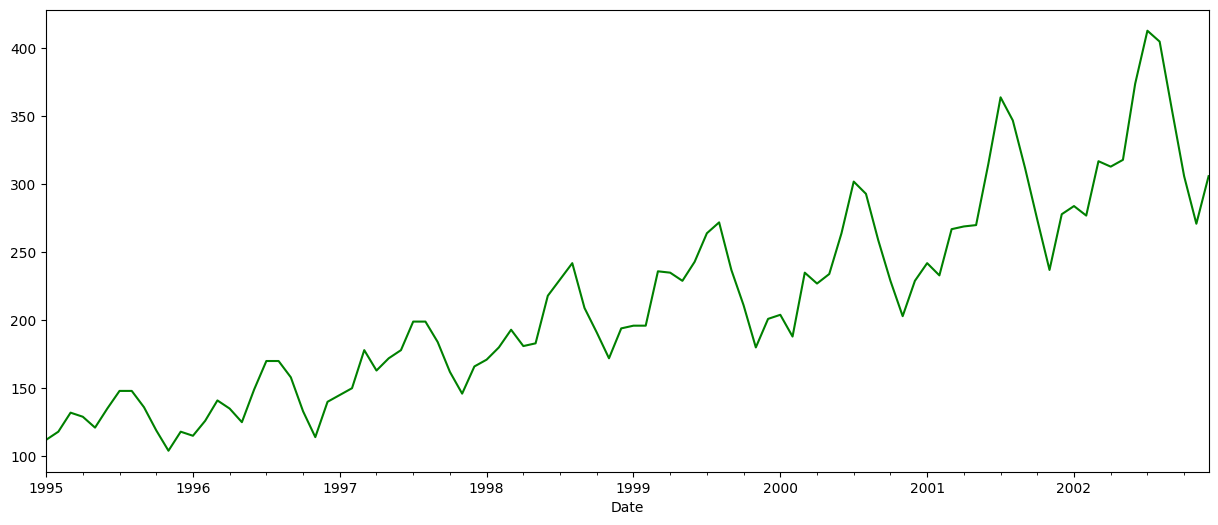

In [15]:
air.Passengers.plot(color='green',figsize=(15,6))

In [16]:
air.columns

Index(['Passengers'], dtype='object')

**Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data**

In [17]:
df["Date"]  = pd.to_datetime(df.Date, format="%b-%y")

In [18]:
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"]  = df.Date.dt.strftime("%Y") # year extraction
df

Date  Passengers month  year
0  1995-01-01         112   Jan  1995
1  1995-02-01         118   Feb  1995
2  1995-03-01         132   Mar  1995
3  1995-04-01         129   Apr  1995
4  1995-05-01         121   May  1995
..        ...         ...   ...   ...
91 2002-08-01         405   Aug  2002
92 2002-09-01         355   Sep  2002
93 2002-10-01         306   Oct  2002
94 2002-11-01         271   Nov  2002
95 2002-12-01         306   Dec  2002

[96 rows x 4 columns]

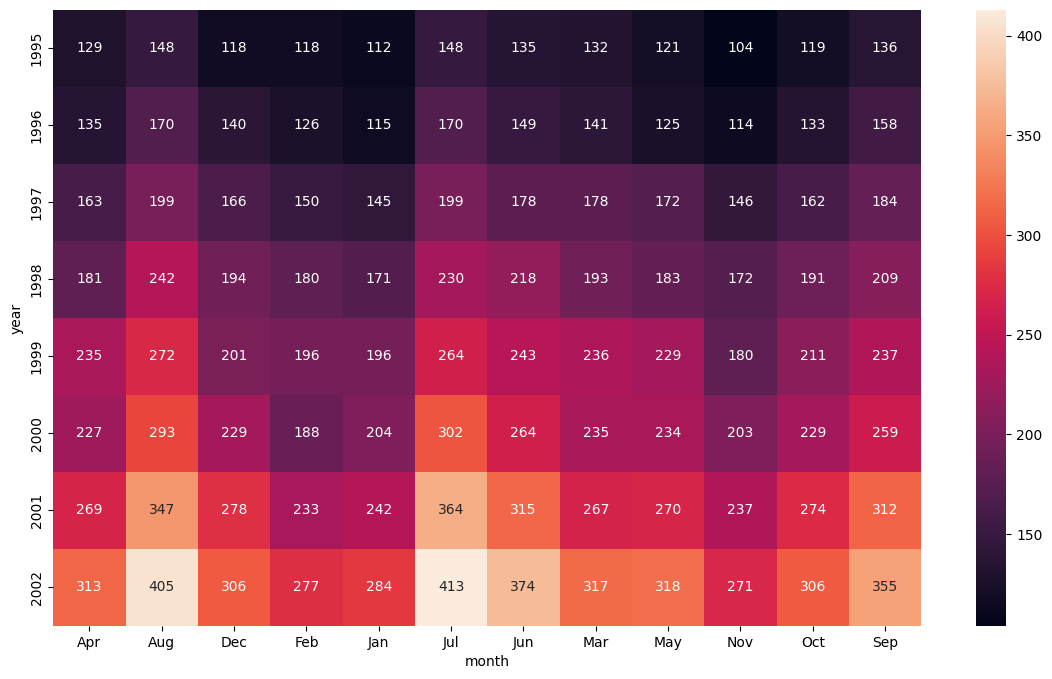

In [19]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

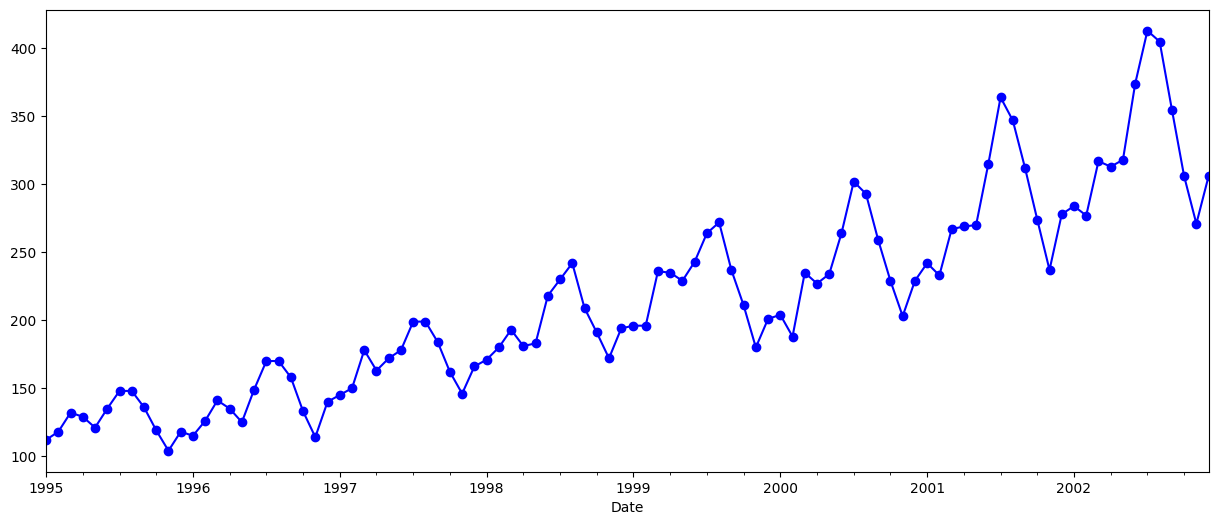

In [20]:
air['Passengers'].plot(figsize=(15,6),color='blue',marker='o')
plt.show()

Observation
we can say that there is uptrend which is increasing and the variance of the plot is not constant

so we can say that the plot is not stationary

**Yearly Passengers**

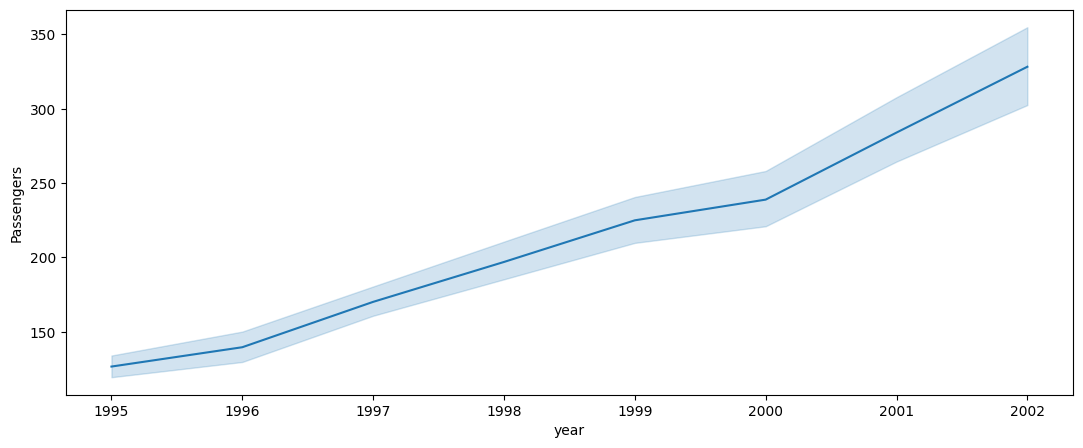

In [21]:
plt.figure(figsize=(13,5))
sns.lineplot(x='year',y='Passengers',data=df)

def fxn():
  warnings.warn('deprecated',DeprecationWarning)

with warnings.catch_warnings():
  warnings.simplefilter('ignore')
  fxn()

Box Plot Of Each Year By Monthly Intervals

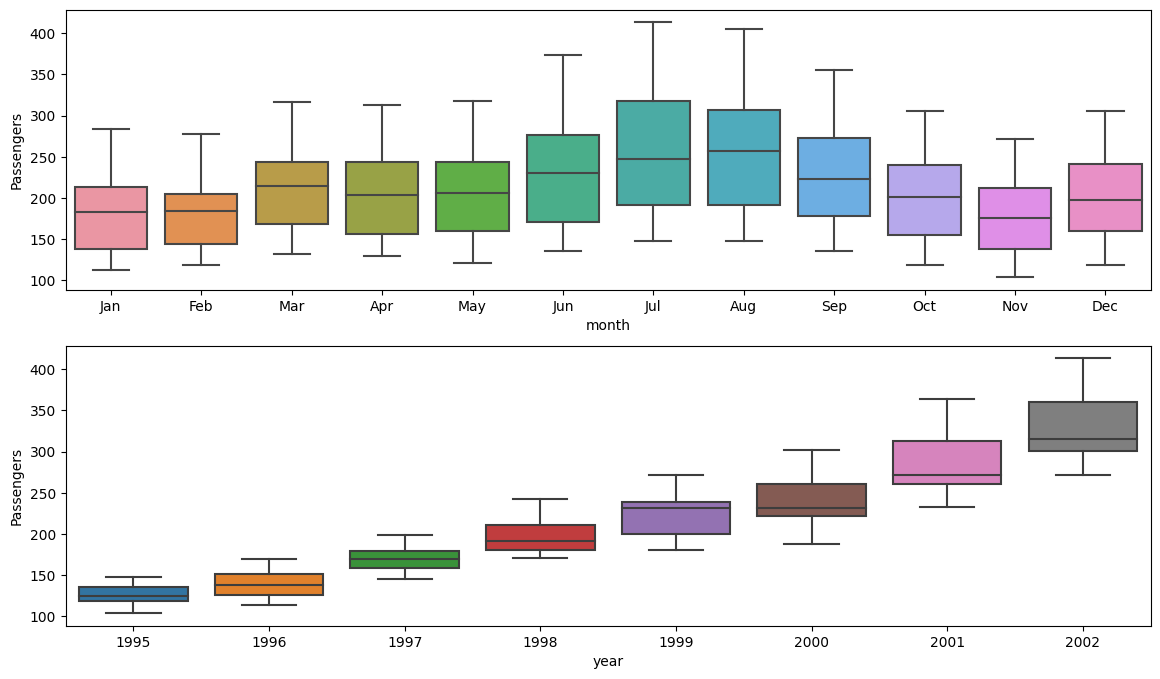

In [22]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month", y="Passengers", data=df)
plt.subplot(212)
sns.boxplot(x="year", y="Passengers", data=df)
plt.show()

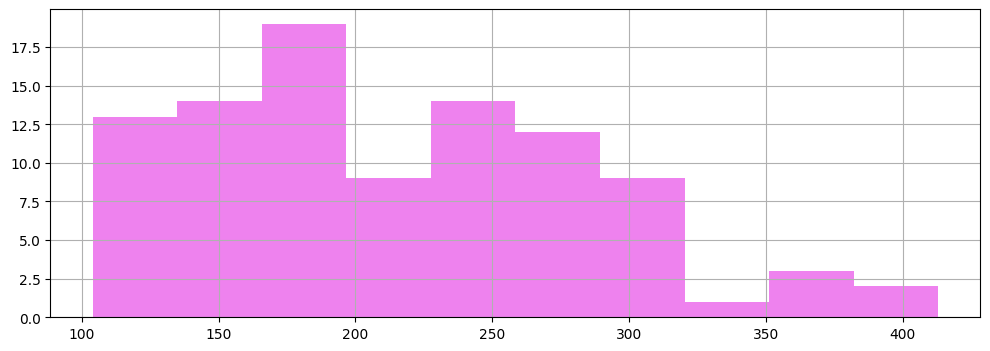

In [23]:
df.Passengers.hist(figsize=(12,4),color='violet')
plt.show()

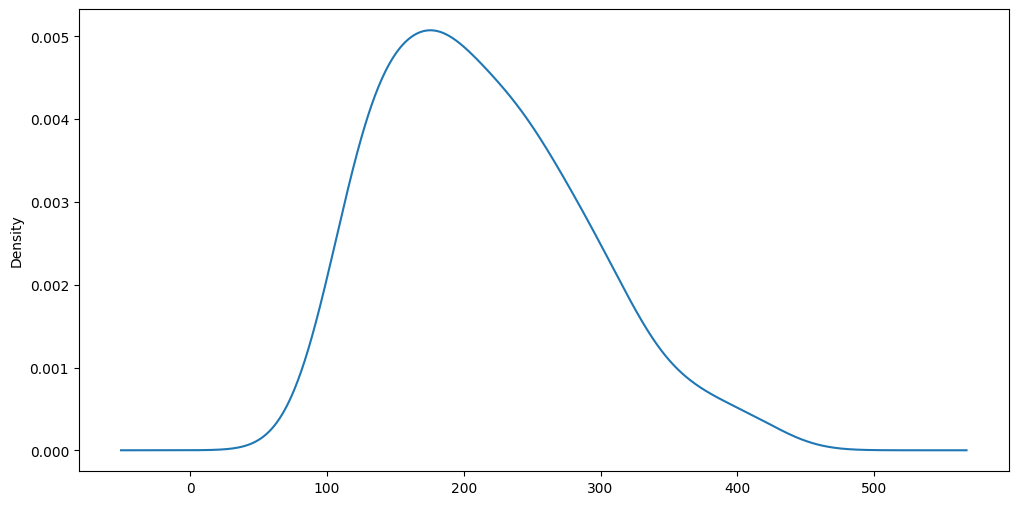

In [24]:
df.Passengers.plot(kind='kde', figsize=(12,6))
plt.show()

Lag plot

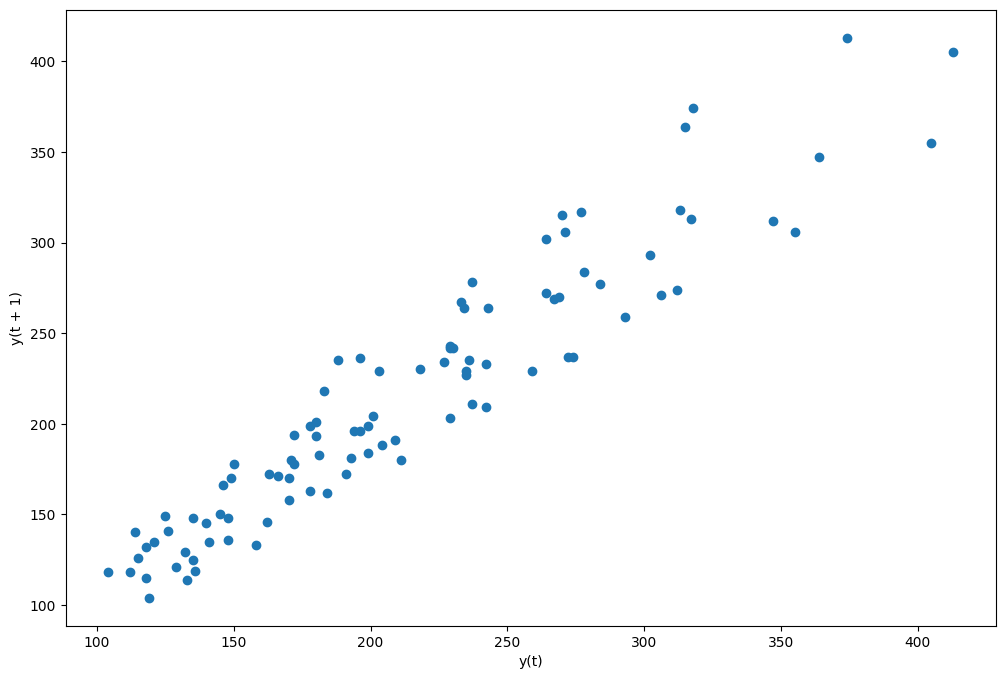

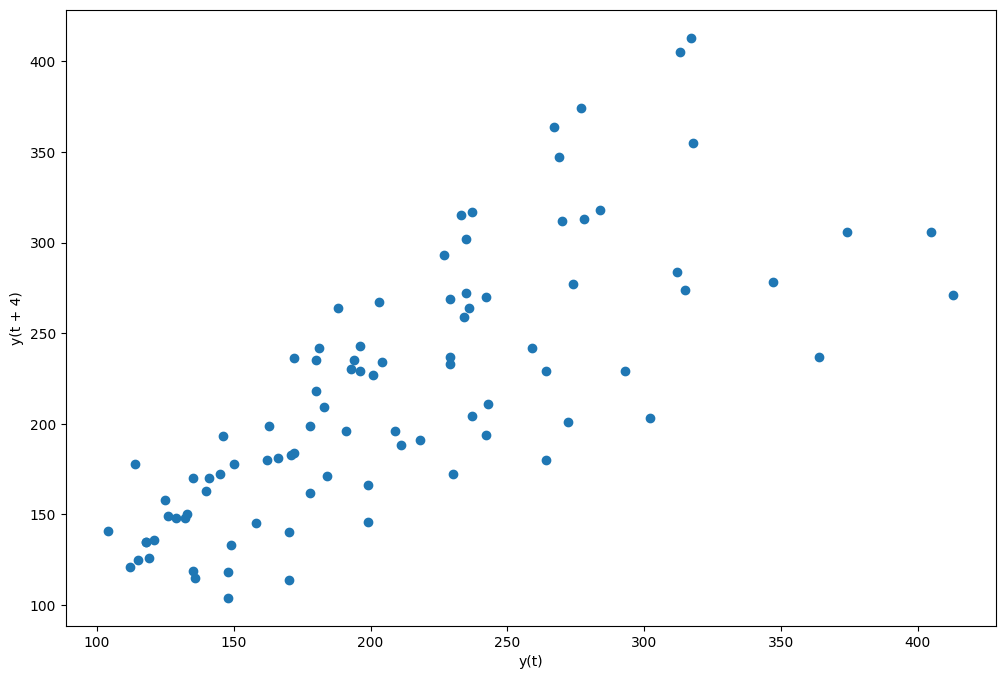

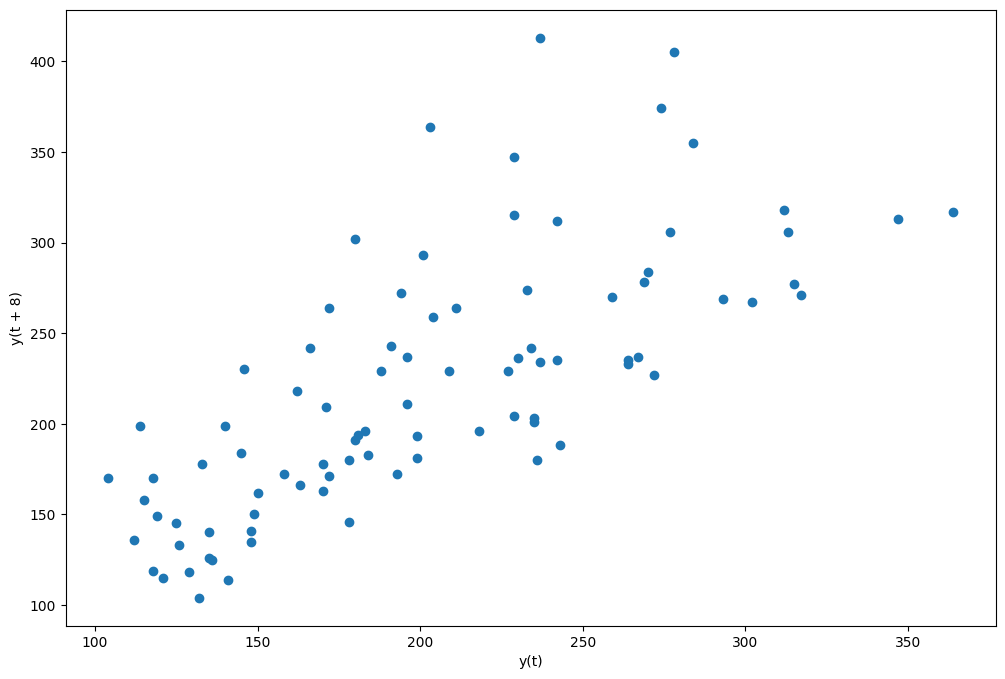

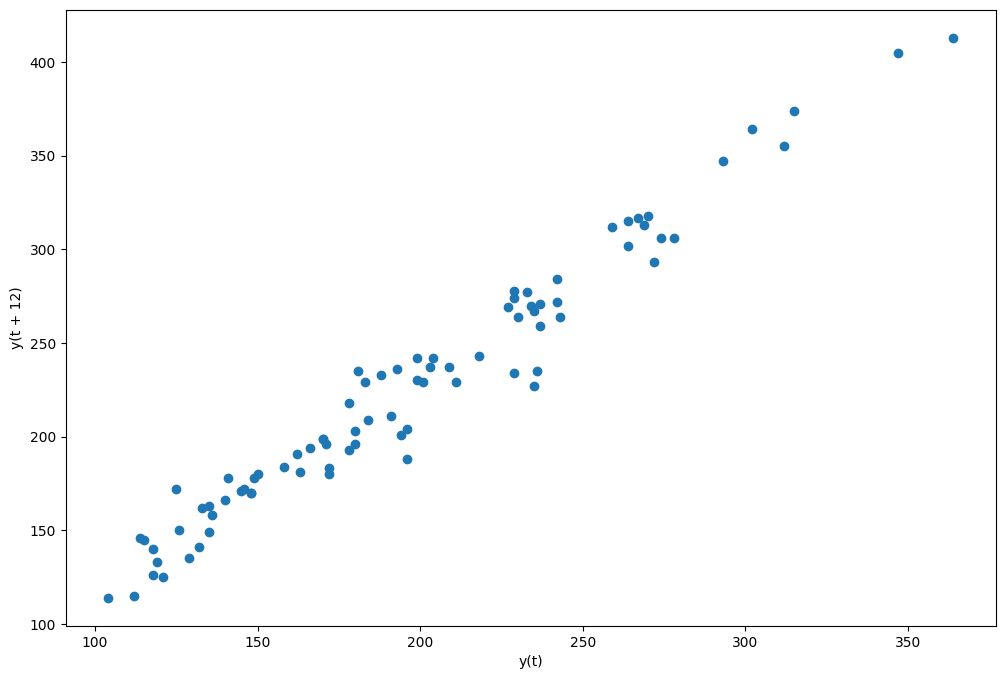

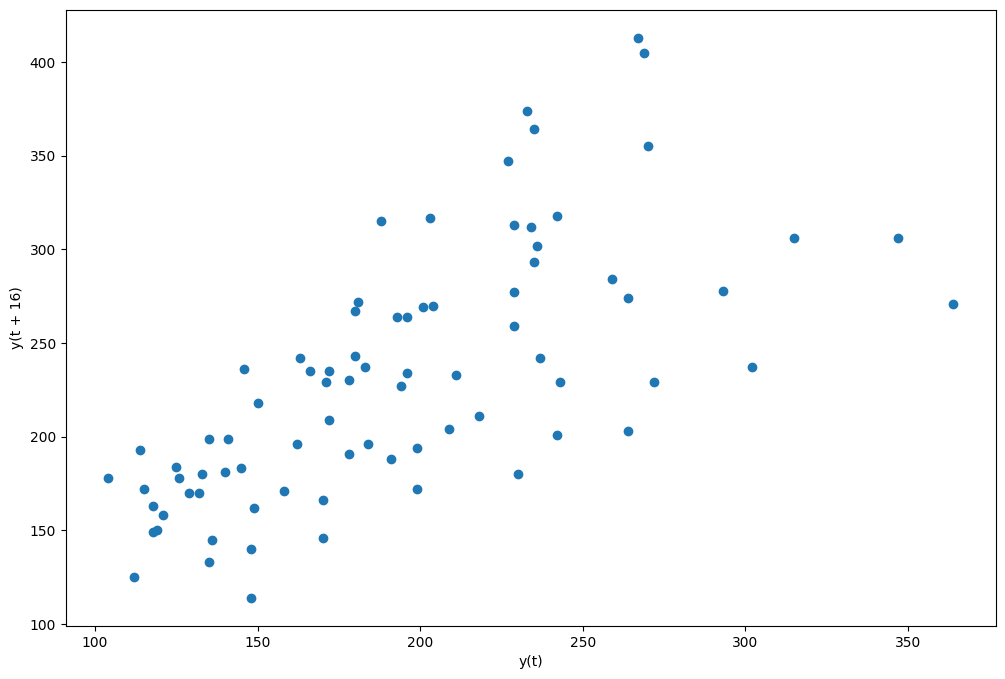

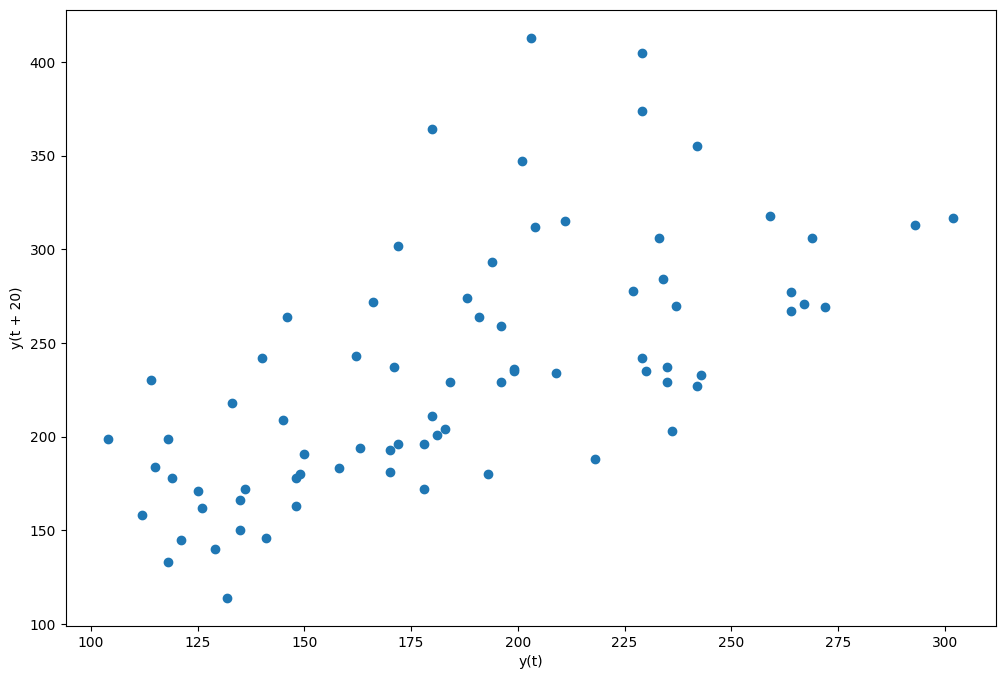

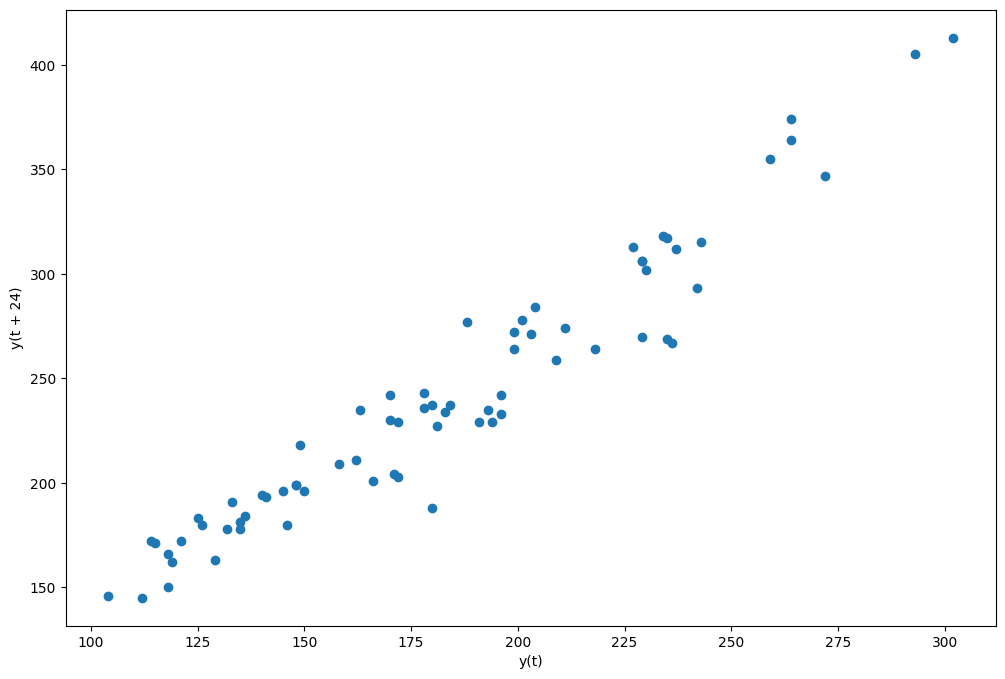

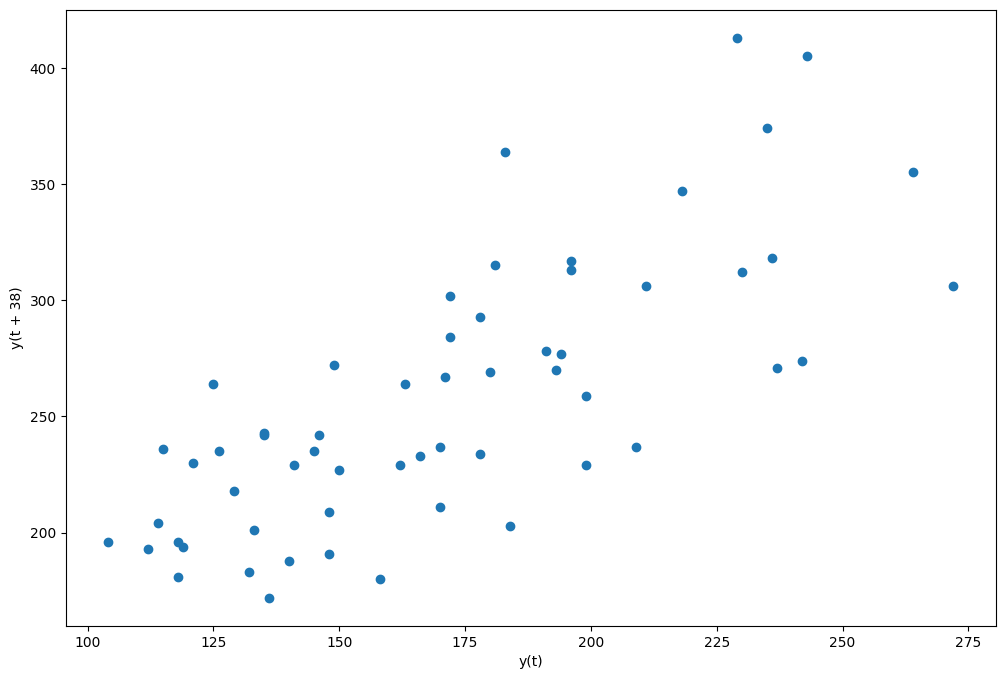

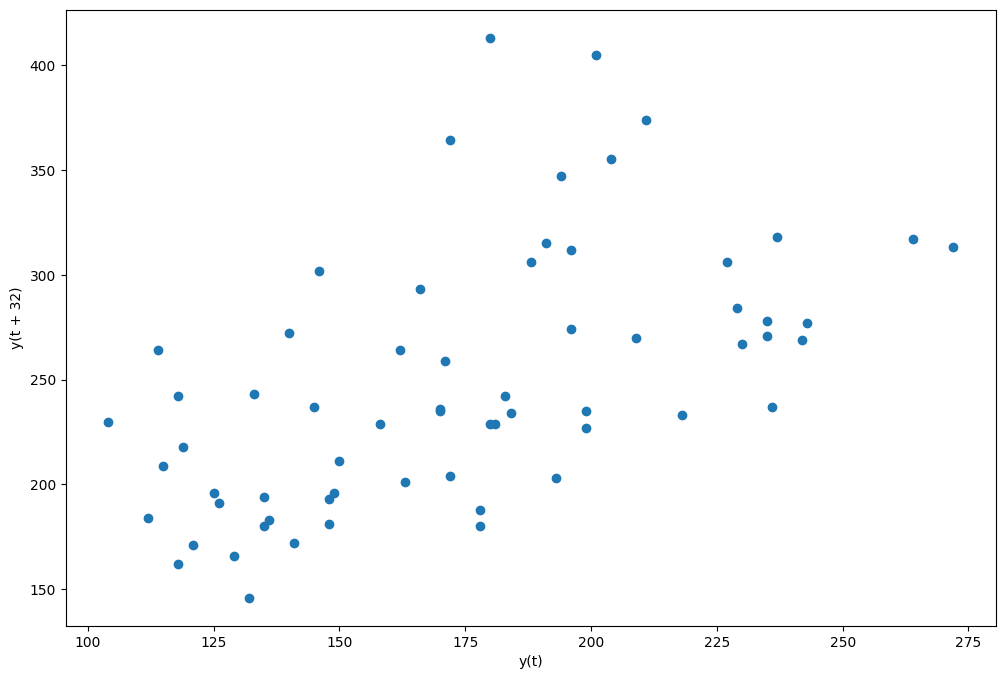

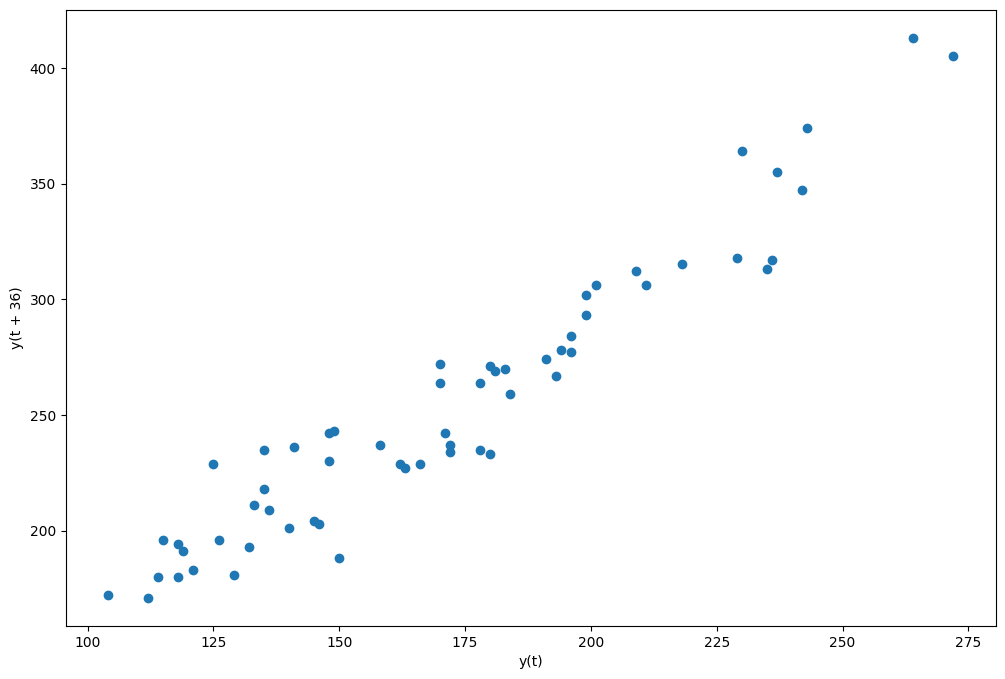

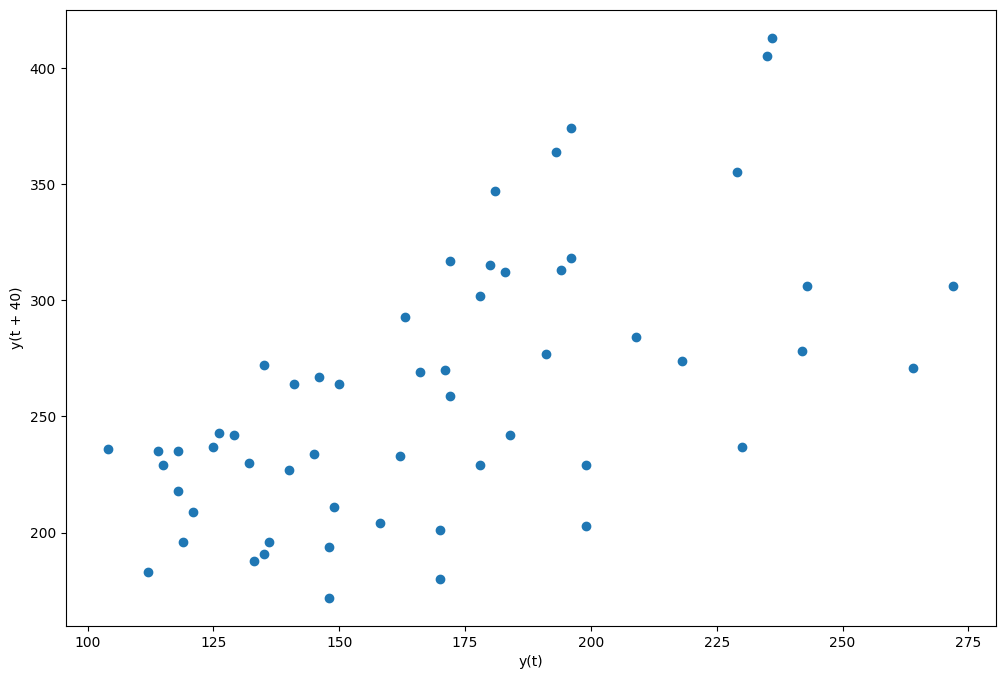

In [25]:
#Creating a Scatter Plot 
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    plt.figure(figsize=(12,8))
    lag_plot(df.Passengers, lag=i)
    plt.show()

 Moving Average

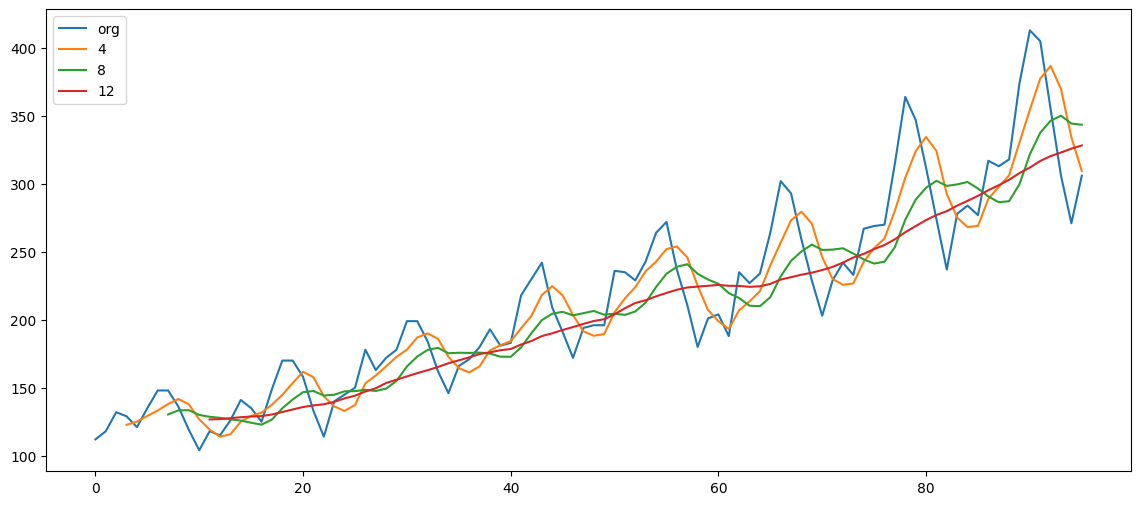

In [26]:
plt.figure(figsize=(14,6))
df.Passengers.plot(label="org")
for i in range(4,13,4):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

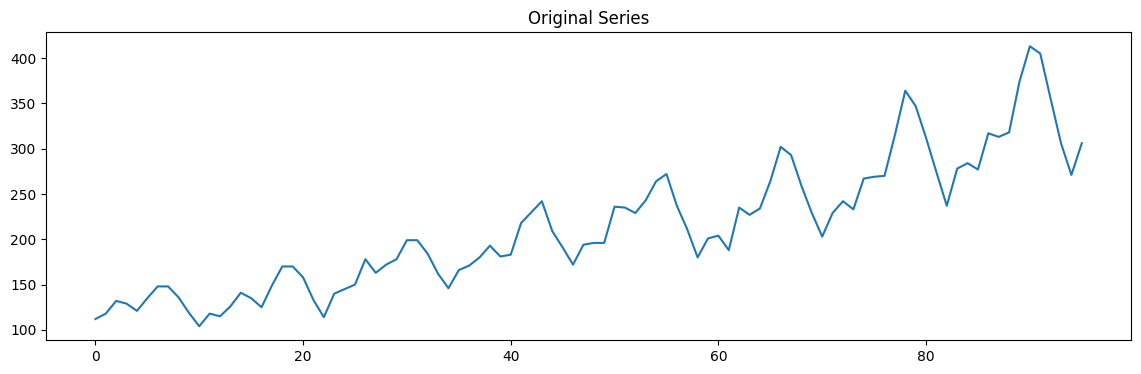

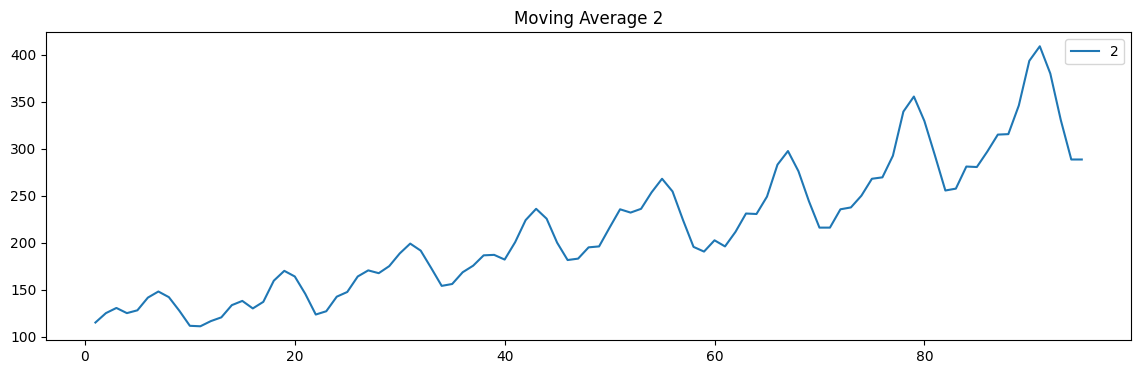

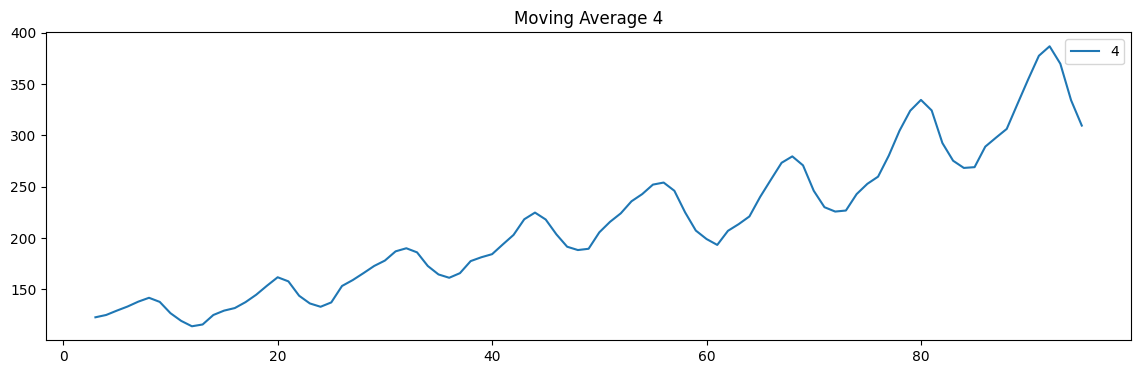

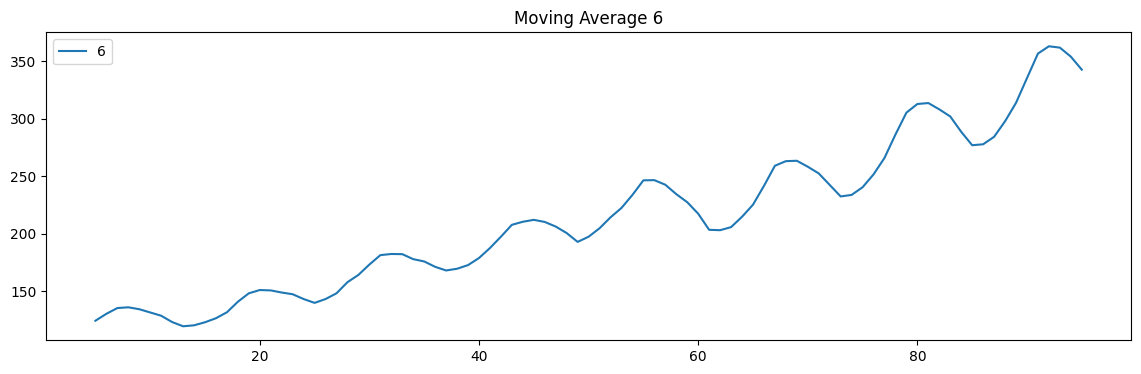

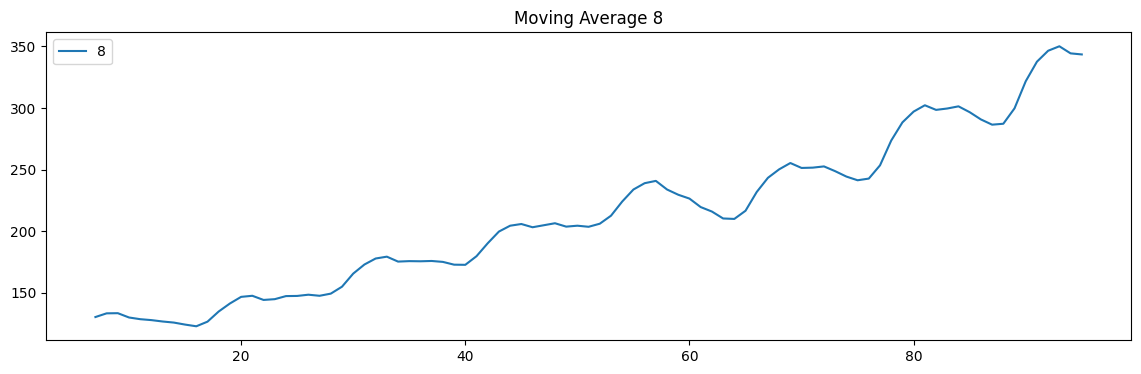

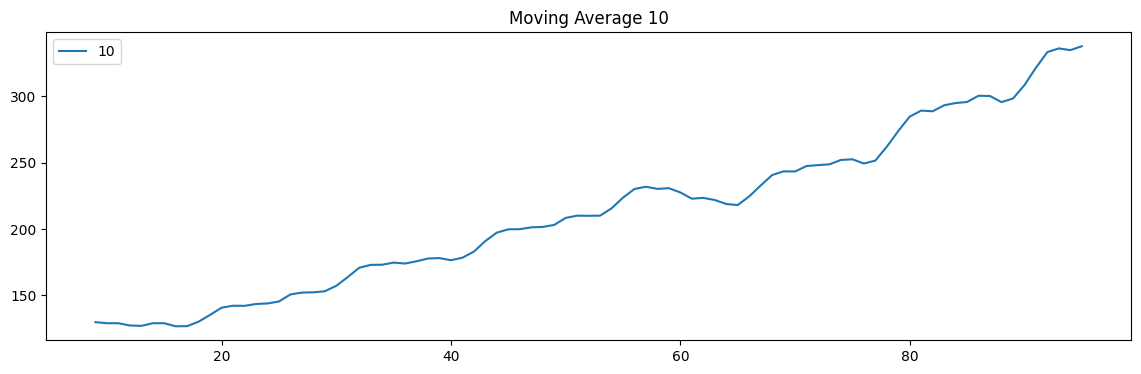

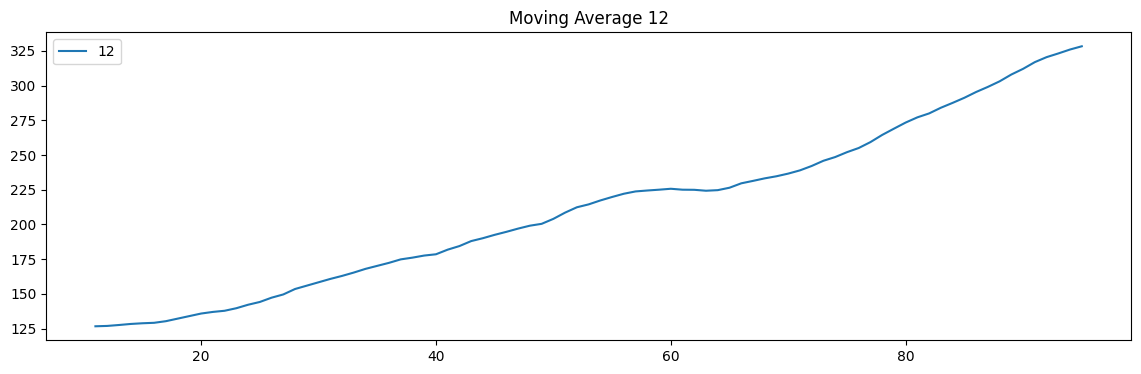

In [27]:
plt.figure(figsize=(14,4))
df.Passengers.plot(label="org")
plt.title("Original Series")
for i in range(2,13,2):
    plt.figure(figsize=(14,4))
    df["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

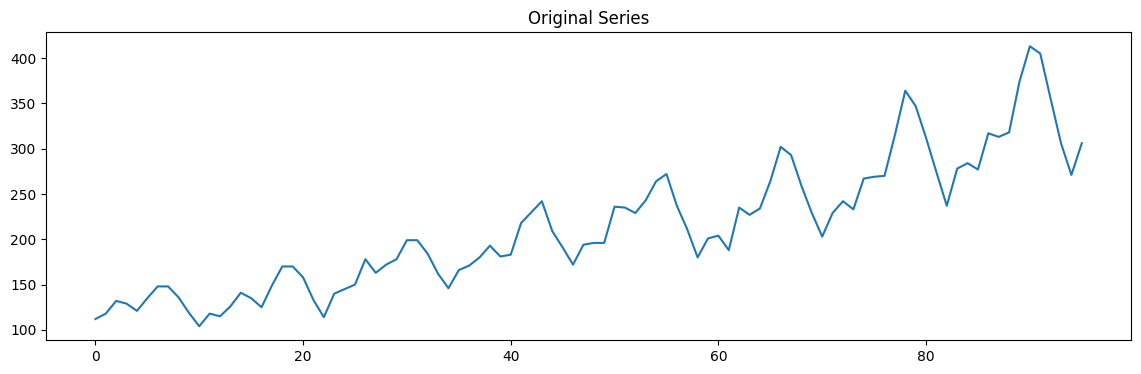

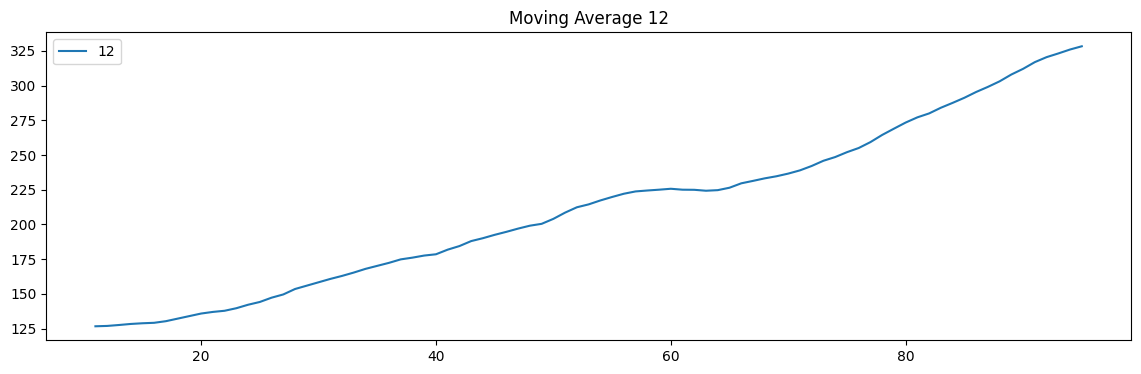

In [28]:
plt.figure(figsize=(14,4))
df.Passengers.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(14,4))
df["Passengers"].rolling(12).mean().plot(label=str(12))
plt.title("Moving Average "+str(12))
plt.legend(loc='best')
plt.show()

Decomposition Plot 

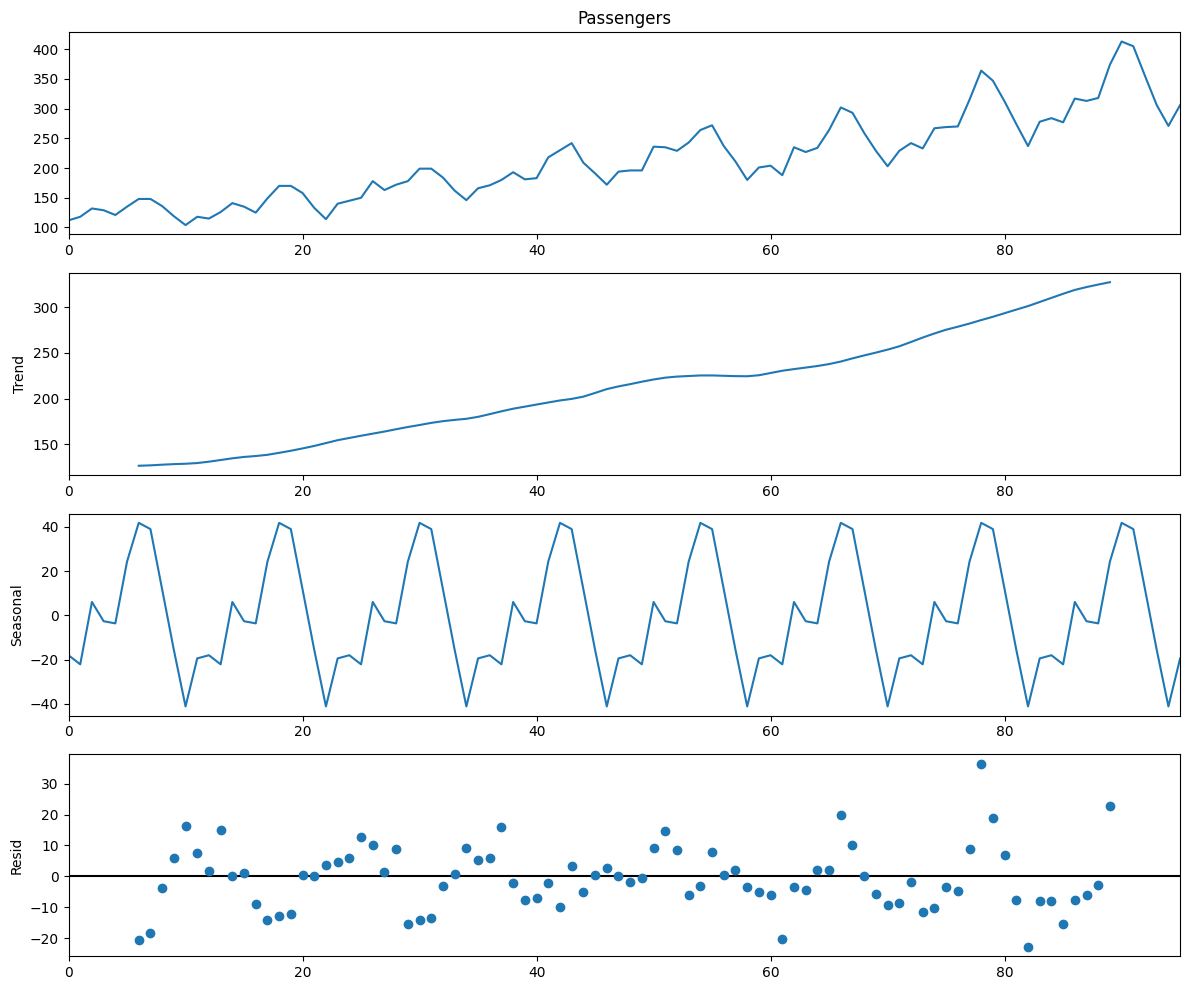

In [29]:
decompose_ts_add = seasonal_decompose(df.Passengers, period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

ACF-AutoCorrelationFactor

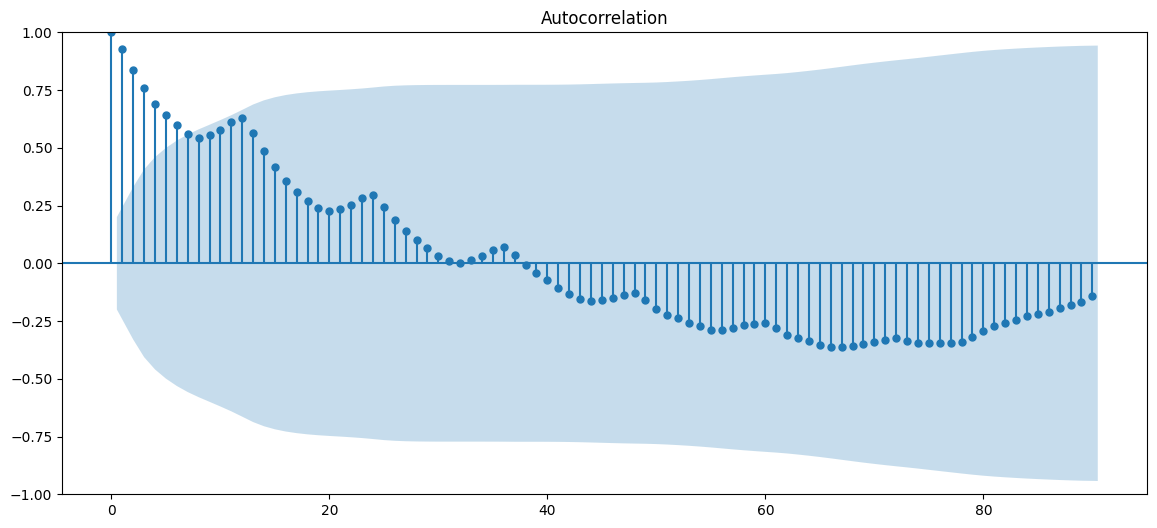

In [30]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_acf(df.Passengers, lags=90)
    plt.show()

Partial AutoCorrelation Function(PACF)

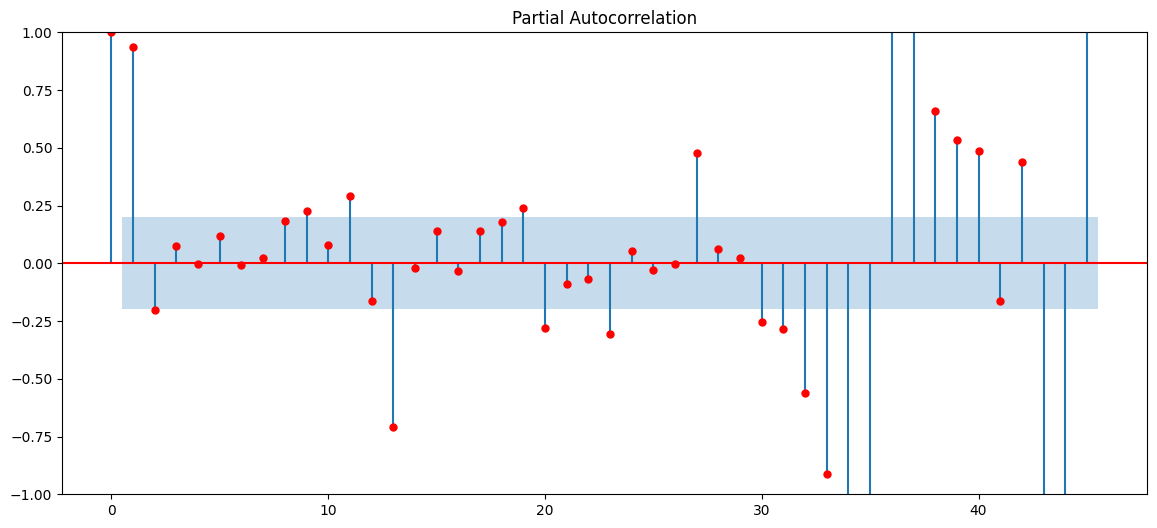

In [31]:
with plt.rc_context():
  plt.rc('figure',figsize=(14,6))
  tsa_plots.plot_pacf(df.Passengers,lags=45,color='red')
  plt.show()

A partial autocorrelation function captures a “direct” correlation between time series and a lagged version of itself.

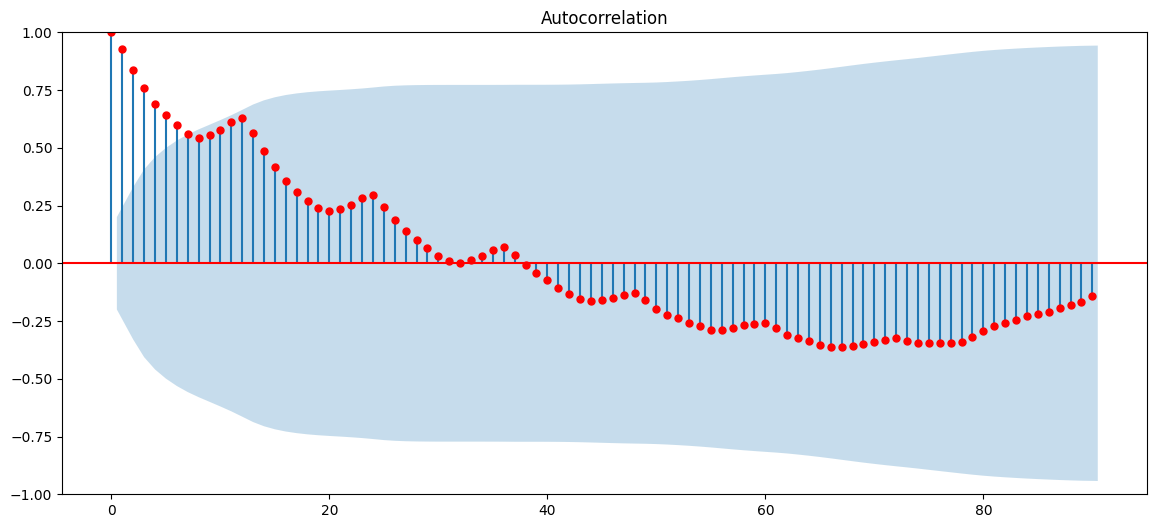

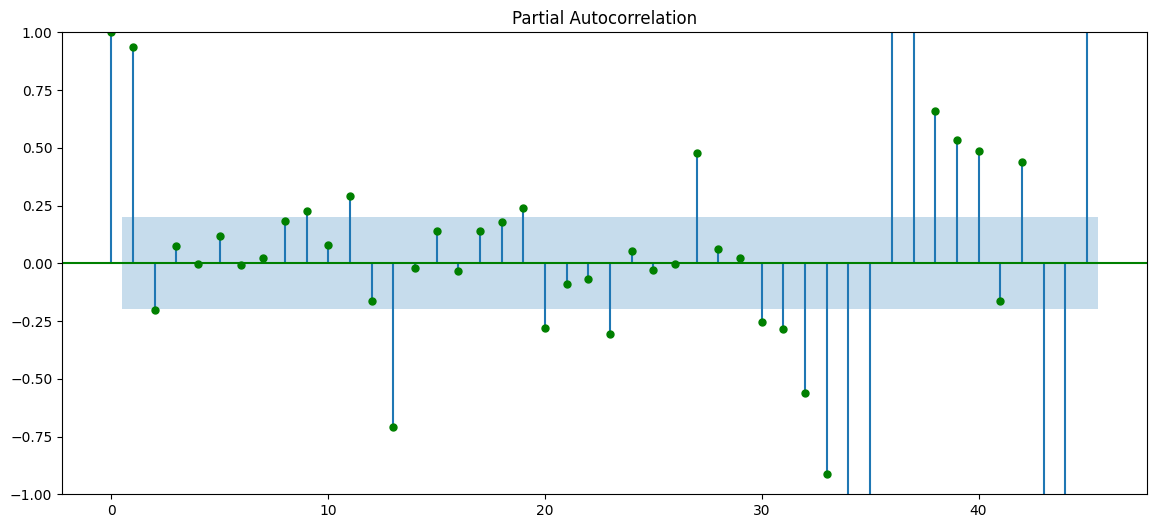

In [32]:
with plt.rc_context():
  plt.rc('figure',figsize=(14,6))
  tsa_plots.plot_acf(df.Passengers,lags=90,color='red')
  tsa_plots.plot_pacf(df.Passengers,lags=45,color='green')
  plt.show()

In [33]:
visual=air.copy()
visual.reset_index(inplace=True)
visual['date']=pd.to_datetime(visual['Date'])
visual['year'] = visual['Date'].dt.year
visual['month'] = visual['Date'].dt.month
visual['week'] = visual['Date'].dt.isocalendar().week
visual['quarter'] = visual['Date'].dt.quarter
visual['day_of_week'] = visual['Date'].dt.day_name()
visual.drop('Date', axis =1 , inplace= True)
visual

Passengers       date  year  month  week  quarter day_of_week
0          112 1995-01-01  1995      1    52        1      Sunday
1          118 1995-02-01  1995      2     5        1   Wednesday
2          132 1995-03-01  1995      3     9        1   Wednesday
3          129 1995-04-01  1995      4    13        2    Saturday
4          121 1995-05-01  1995      5    18        2      Monday
..         ...        ...   ...    ...   ...      ...         ...
91         405 2002-08-01  2002      8    31        3    Thursday
92         355 2002-09-01  2002      9    35        3      Sunday
93         306 2002-10-01  2002     10    40        4     Tuesday
94         271 2002-11-01  2002     11    44        4      Friday
95         306 2002-12-01  2002     12    48        4      Sunday

[96 rows x 7 columns]

In [34]:
visual.year.unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002])

 **Additive Seasonal Decomposition**

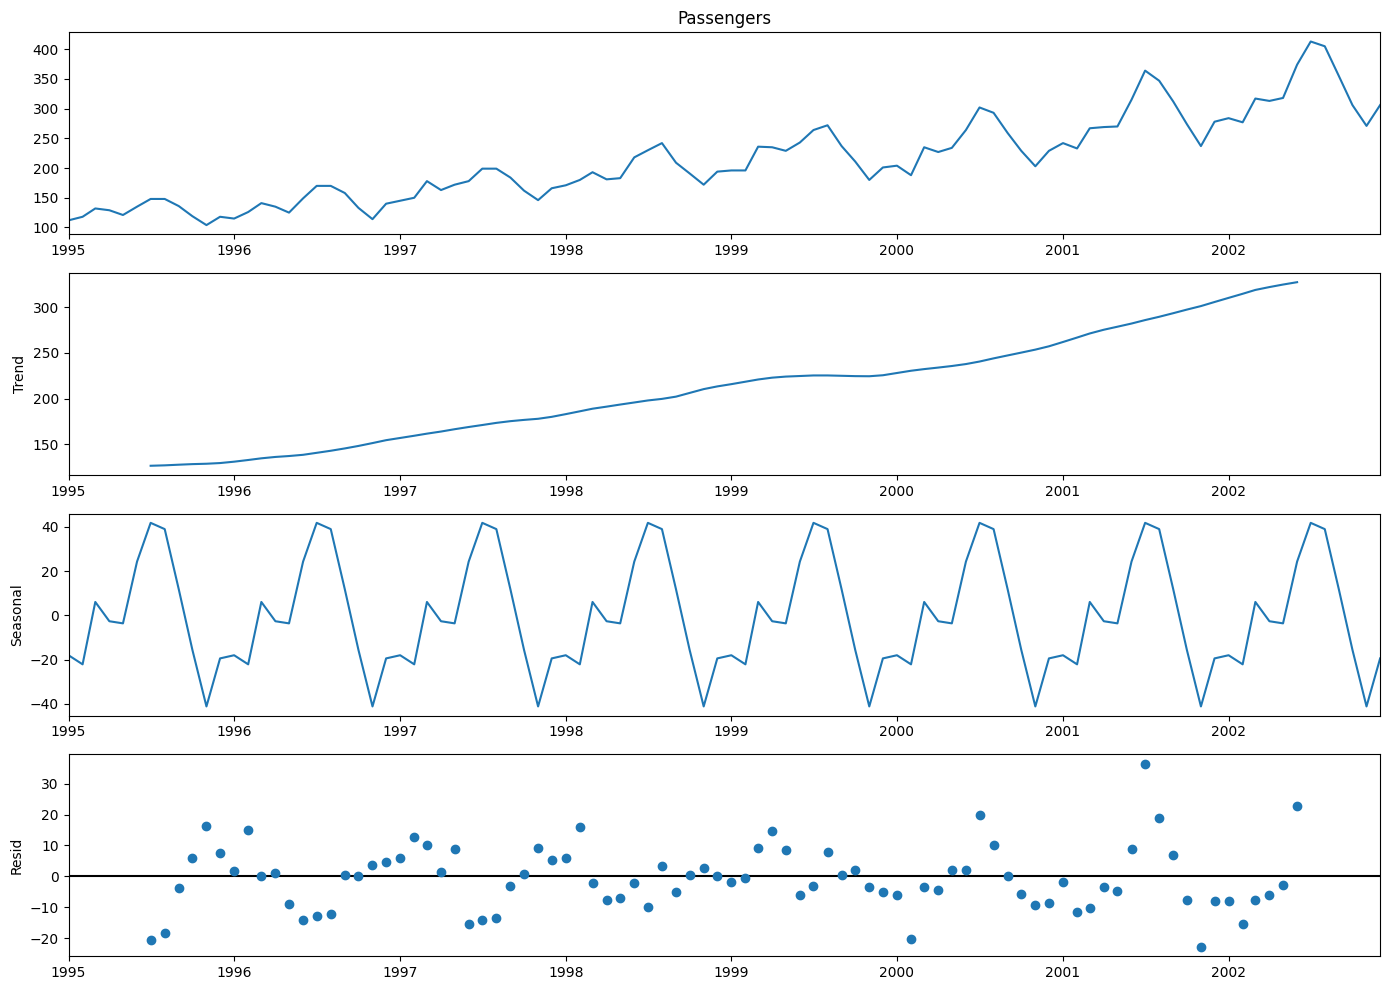

In [35]:
decompose_ts_add=seasonal_decompose(air.Passengers,period=12,model='additive')
with plt.rc_context():
  plt.rc('figure',figsize=(14,10))
  decompose_ts_add.plot()
  plt.show()

**Observation:-**


Trend - Increasing or decreasing trend.

**Seasonal** -

Varies from +50 to -50 with the mean 0.

Each cycle represents each year trend.

The value in the Y-axis has to be added to the Trend plot value to get the actual value of that year. E.g.:- For the year 1950 Nov, the seasonal value is +50 and the trend value is 100. Hence, teh actual value(passengers number) will (seasonal+Trend) value = 50+100 = 150.

**Residual** - It is the noise pattern of the time series data for each year, which was not captured by the two components - Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)

**Multiplicative Seasonal Decomposition**

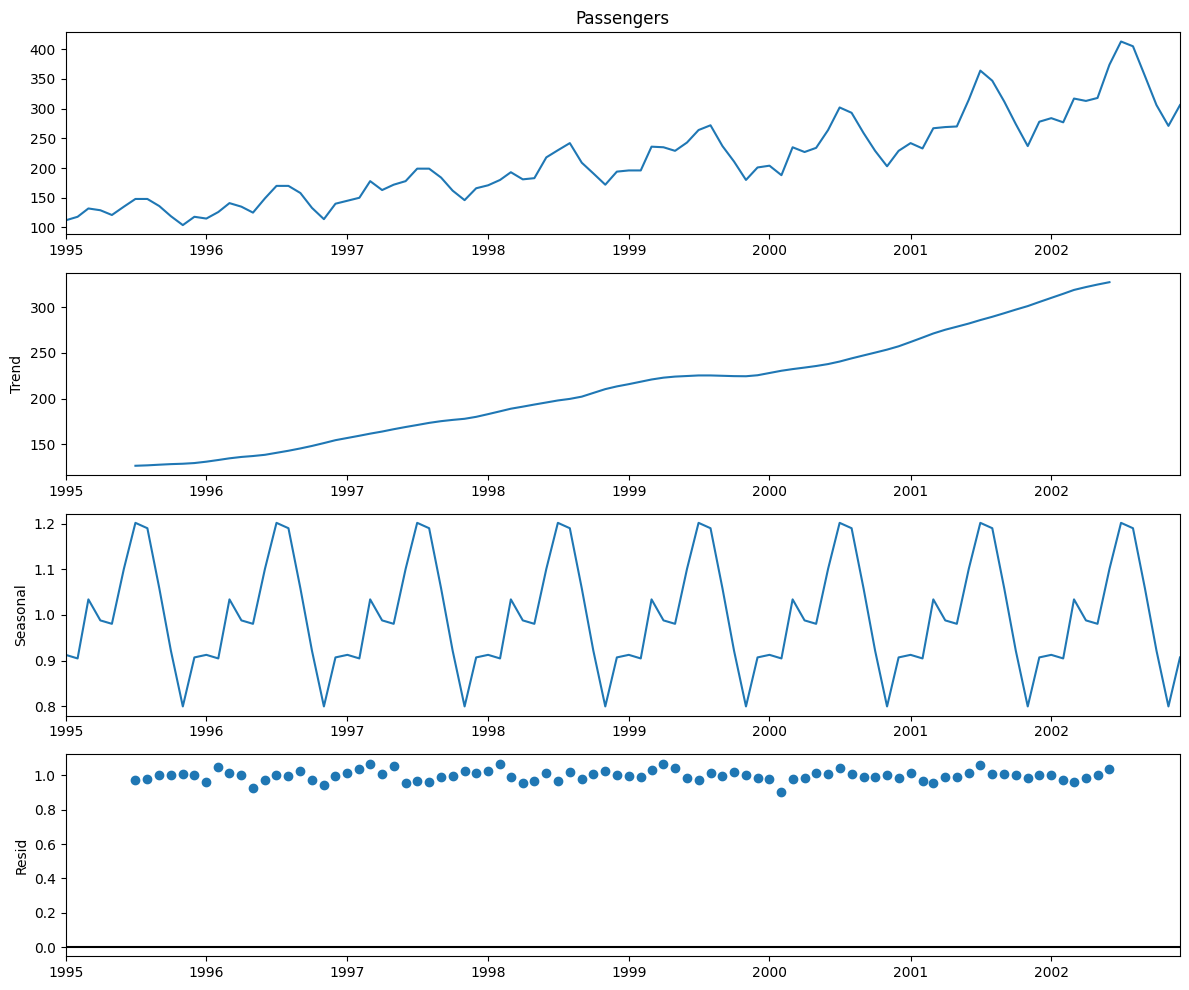

In [36]:
decompose_ts_add = seasonal_decompose(air.Passengers,period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

**Observation**:-

**Seasonal** -


Varies from 0.8 to 1.2

The value in the Y-axis has to be multiplied to the Trend plot value to get the actual value of that year. E.g.:- For the year 1950 Nov, the seasonal value is 1.2 and the trend value is 100. Hence, the actual value(passengers number) will (seasonal X Trend) value = 1.2 X 100 = 120.

**Splitting Train and Test Data**

In [37]:
#Leaving Test Data with 2 Years of Time Series
size = 72
train_data = air[:size]
test_data = air[size:]
print('Train:',train_data.index.min(),train_data.index.max(),'\n',
'Test:',test_data.index.min(),test_data.index.max())

Train: 1995-01-01 00:00:00 2000-12-01 00:00:00 
 Test: 2001-01-01 00:00:00 2002-12-01 00:00:00


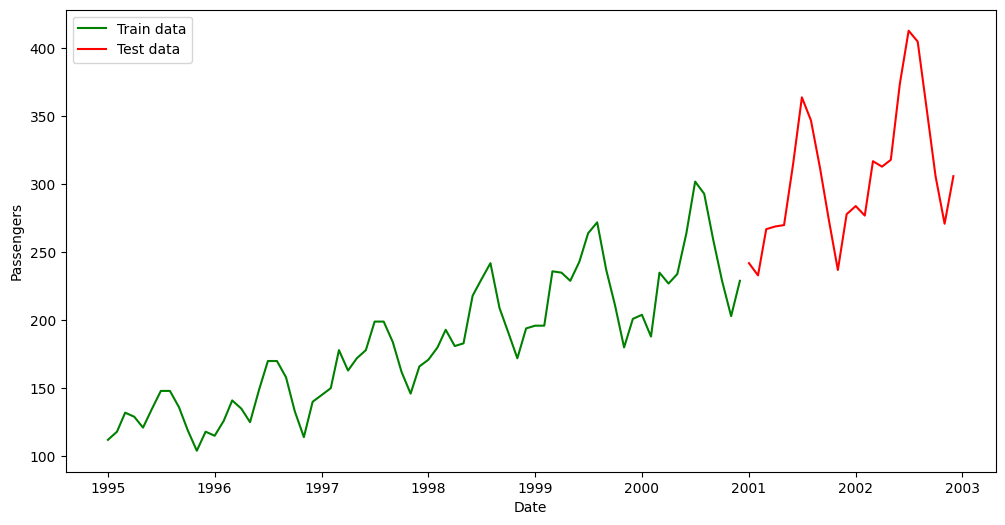

In [38]:
#Leaving Test Data with 2 Years of Time Series
#LAst 24 records contain from 2001 to 2002 data
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()
plt.show()

Evaluation Metric MAPE

In [39]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

**Exponential Methods**

Simple Exponential Method

Using Forecast Attribute


In [40]:
ses_model = SimpleExpSmoothing(train_data['Passengers']).fit(optimized=True)
test_pred_ses = ses_model.forecast(24)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.Passengers))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.Passengers)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 23.382283350045057 
 Train Root Mean Squared Error = 19.03177173091111 
 Test Root Mean Squared Error  = 91.11325402904487


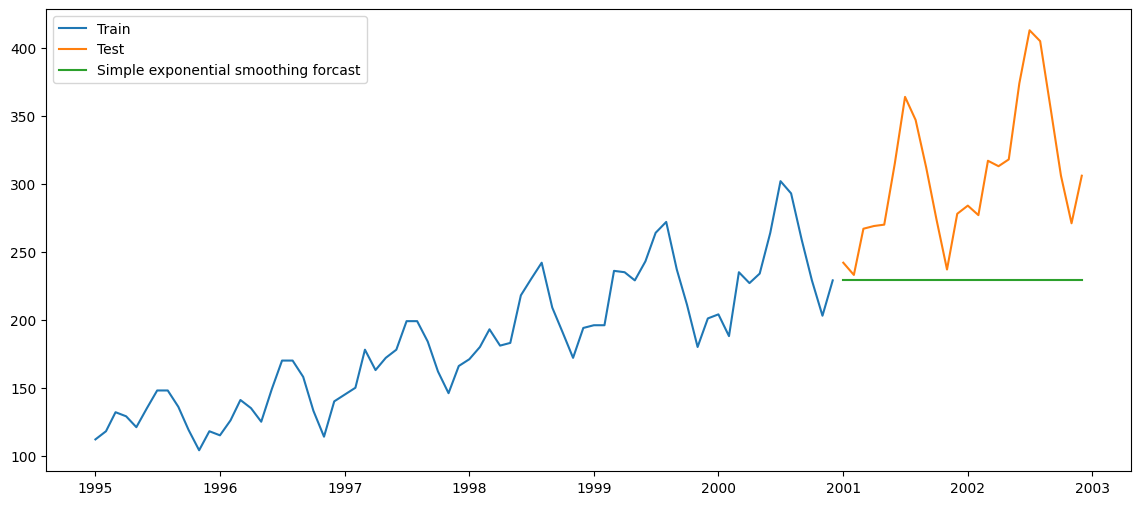

In [41]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

Holt Method(Double Exponential)

Capturing level and trend

In [42]:
dexp_model  = Holt(train_data).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(24)
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test_data.Passengers))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train_data))
mape_dexp = MAPE(test_pred_dexp,test_data.Passengers)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_dexp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_dexp))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 17.12220875270047 
 Train Root Mean Squared Error = 18.9612923452262 
 Test Root Mean Squared Error  = 71.55255166207006


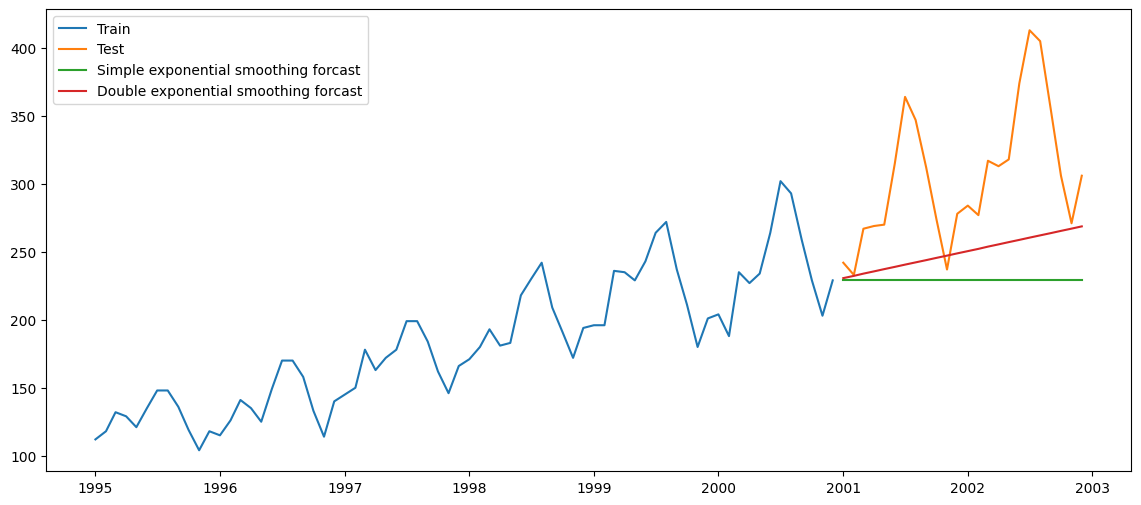

In [43]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)

Captures Level, Trend and Seasonality.

In [44]:
texp_add_model  = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(24)
train_pred_ad_texp = texp_add_model.fittedvalues
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp,test_data.Passengers))
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp,train_data))
mape_ad_texp = MAPE(test_pred_ad_texp,test_data.Passengers)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_texp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ad_texp))

Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error   = 12.084813658780355 
 Train Root Mean Squared Error = 7.751303513604031 
 Test Root Mean Squared Error  = 47.570269203462864


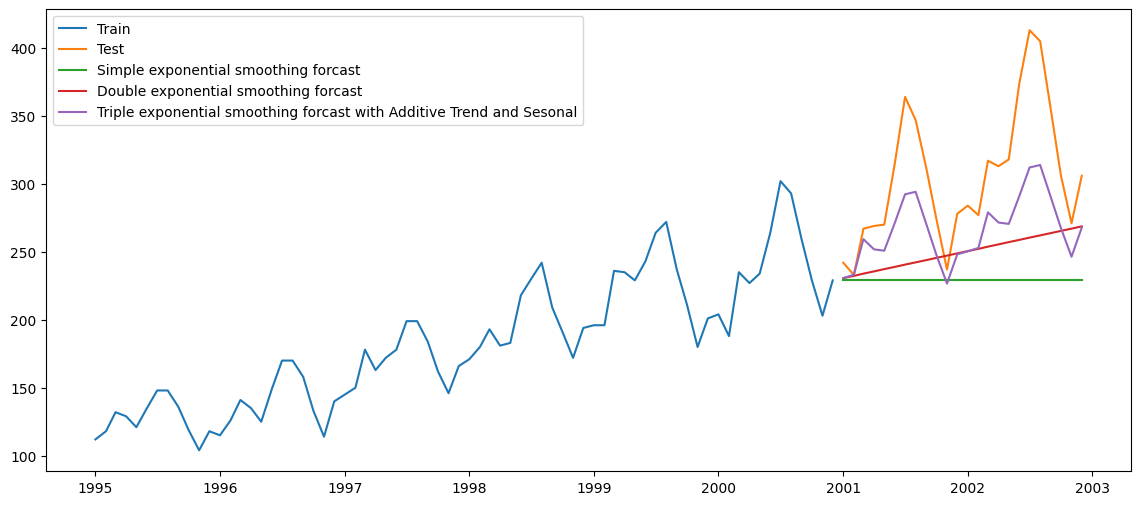

In [45]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

**Observation**:

It captures the trend, which we can see that the forecasted values are lower level than the test level.

It also captures the seasonality.

The peak of the forecasted value is lower than the actual.

Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)

In [46]:
texp_mul_ad_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(24)
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,test_data.Passengers))
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,train_data))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,test_data.Passengers)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mul_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_texp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mul_ad_texp))

Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error   = 9.368409298996491 
 Train Root Mean Squared Error = 6.386634437268093 
 Test Root Mean Squared Error  = 34.98955392874329


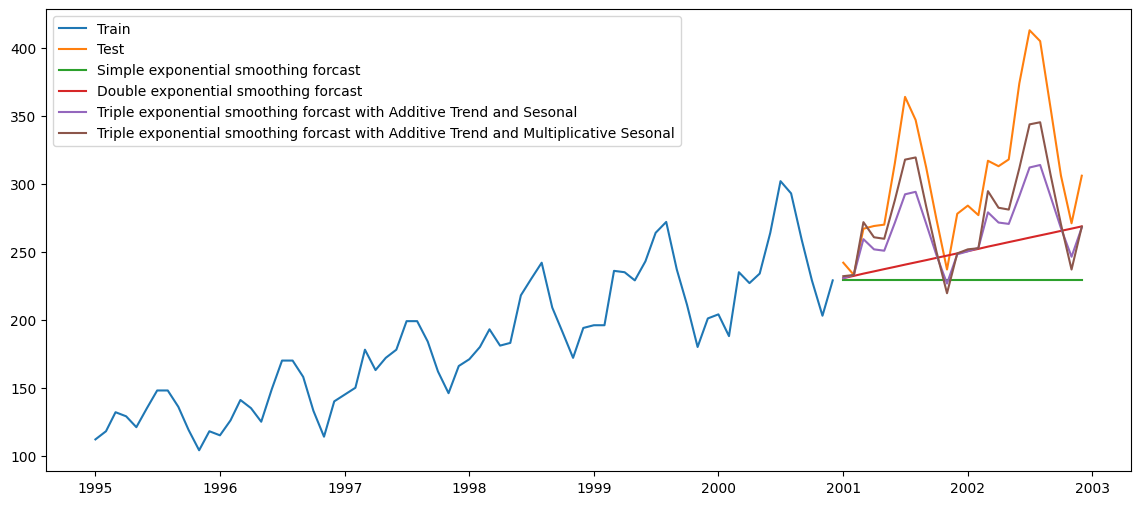

In [47]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()

Observation:

We can see that the errors have reduced drastically once we are able to capture the level, trend and seasonality altogether.

In [48]:
texp_ad_mul_model = ExponentialSmoothing(train_data,seasonal="add",trend="mul",
                    seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(24)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_data.Passengers))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_data))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_data.Passengers)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error   = 13.341866948862238 
 Train Root Mean Squared Error = 12.755539751240624 
 Test Root Mean Squared Error  = 48.34208410593296


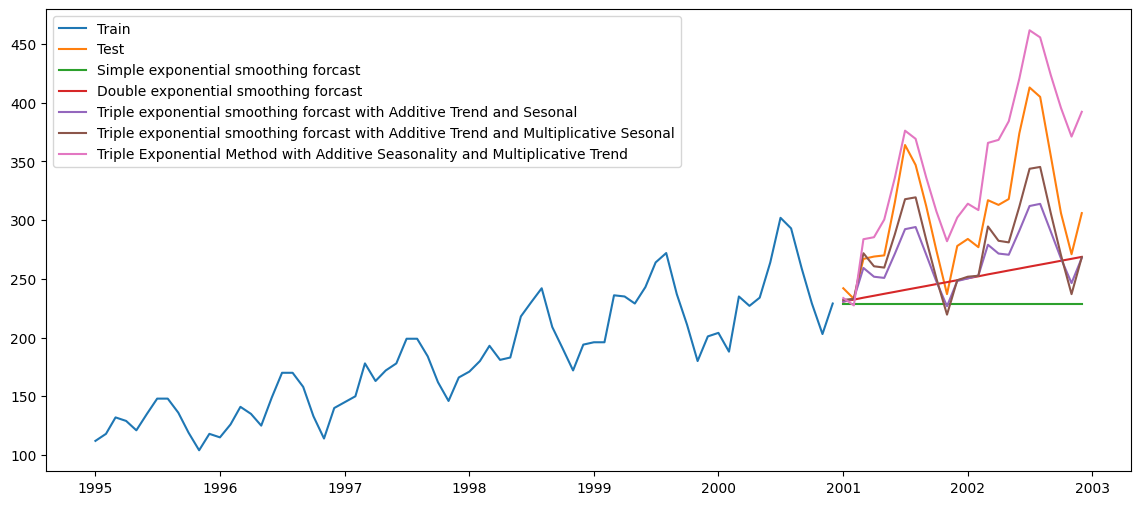

In [49]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()

Observation:

It captures the trend, which we can see that the forecasted values are higher level than the test level.

It also captures the seasonality.

The peak of the forecasted value is higher than the actual.


Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)

In [50]:
texp_mul_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(24)
train_pred_mul_texp  = texp_mul_model.fittedvalues
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test_data.Passengers))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train_data))
mape_mul_texp  = MAPE(test_pred_mul_texp,test_data.Passengers)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mul_texp ))


Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error   = 6.035078693970935 
 Train Root Mean Squared Error = 6.396749786818969 
 Test Root Mean Squared Error  = 23.058842144878668


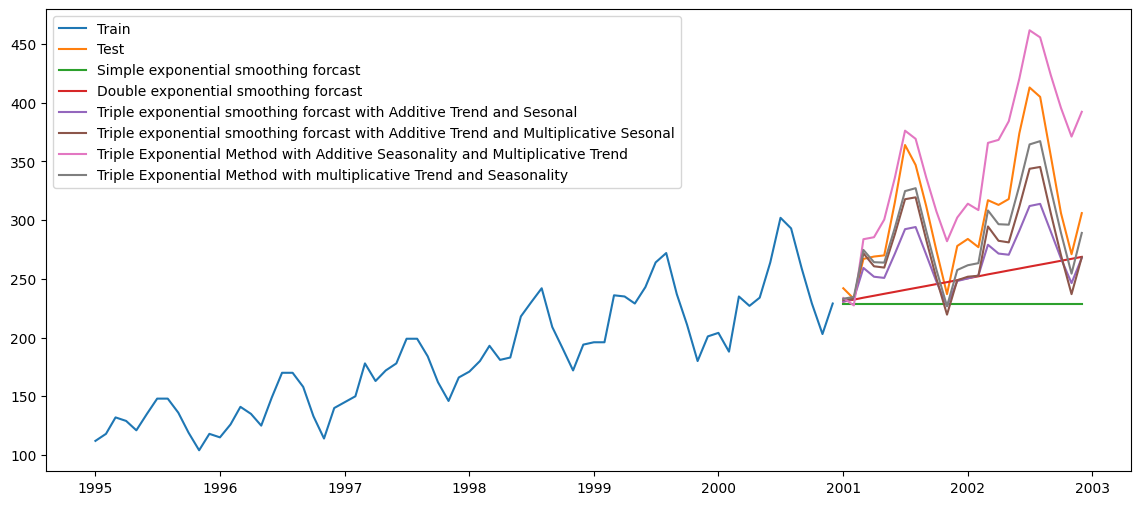

In [51]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_texp, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

Comparing the result


In [52]:
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_Add","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Mul"]),
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_dexp,train_rmse_ad_texp,train_rmse_mul_ad_texp,train_rmse_ad_mul_texp,train_rmse_mul_texp]),
        "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp]),
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp])}
table_evaluation = pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

Models  Train_RMSE  Test_MAPE(%)  Test_RMSE_Values
0      Triple_Exp_Mul    6.396750      6.035079         23.058842
1  Triple_Exp_Mul_Add    6.386634      9.368409         34.989554
2      Triple_Exp_Add    7.751304     12.084814         47.570269
3  Triple_Exp_Add_Mul   12.755540     13.341867         48.342084
4          Double_Exp   18.961292     17.122209         71.552552
5          Simple_Exp   19.031772     23.382283         91.113254

**Visualisation Models Performance**

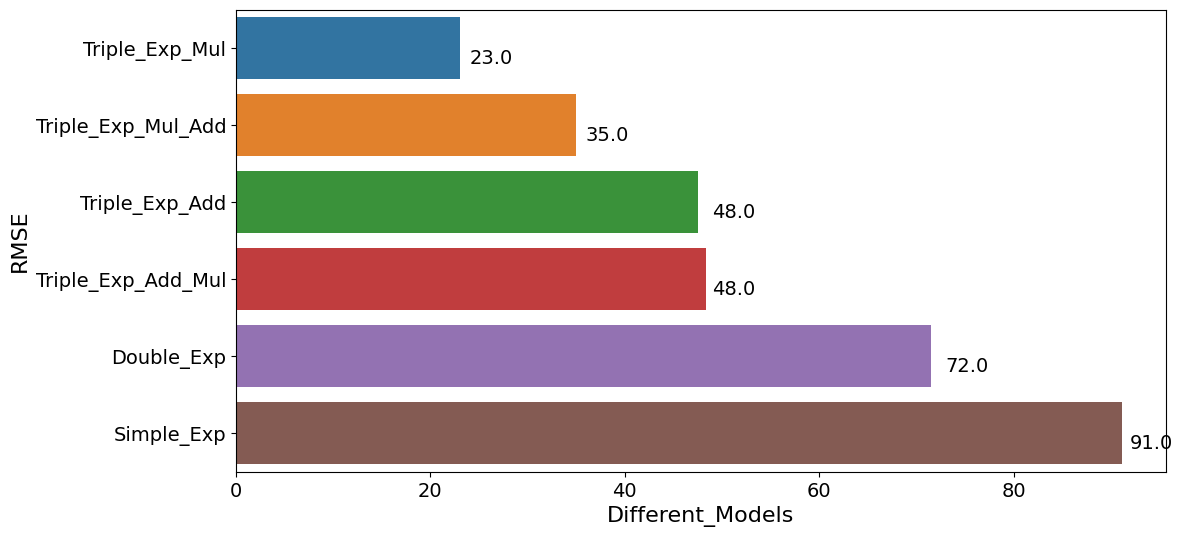

In [53]:
f, axe = plt.subplots(1,1, figsize=(12,6))
sns.barplot(x= 'Test_RMSE_Values', y= 'Models', data= table_evaluation, ax= axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize= 14)
plt.xticks(fontsize= 14)

for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    axe.text(v + 1, i + .20, str(v),
            color = 'black', fontsize= 14)
plt.show()

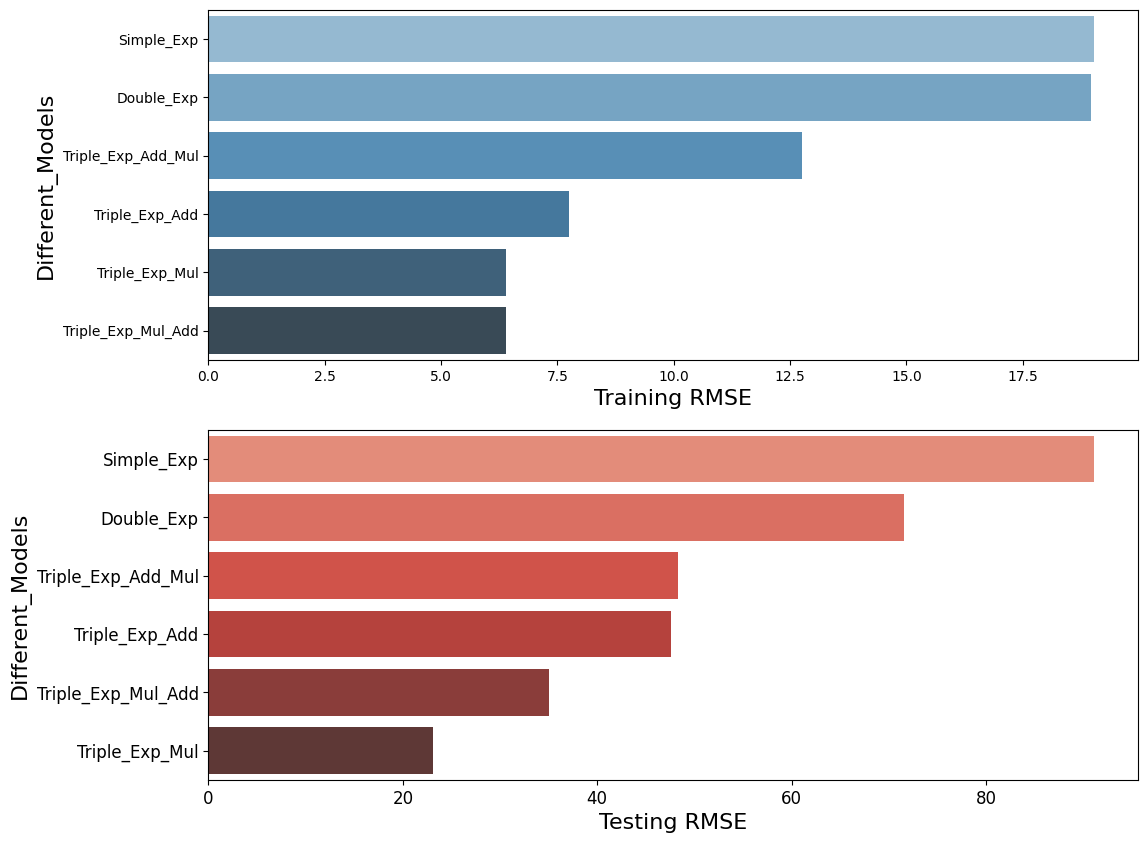

In [54]:
f, axes = plt.subplots(2,1, figsize=(12,10))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

train_rmse = table_evaluation.sort_values(by=['Train_RMSE'], ascending=False)

sns.barplot(x='Train_RMSE', y='Models', data = train_rmse, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training RMSE', size=16)
axes[0].set_ylabel('Different_Models', size=16)

test_rmse = table_evaluation.sort_values(by=['Test_RMSE_Values'], ascending=False)

sns.barplot(x='Test_RMSE_Values', y='Models', data = test_rmse, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Testing RMSE', size=16)
axes[1].set_ylabel('Different_Models', size=16)

plt.show()

**Autoregressive Integrated Moving Averages (ARIMA)**

Stationary vs Non-stationary Time Series

Test of Stationarity

In [55]:
def test_stationarity(timeseries):
    
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

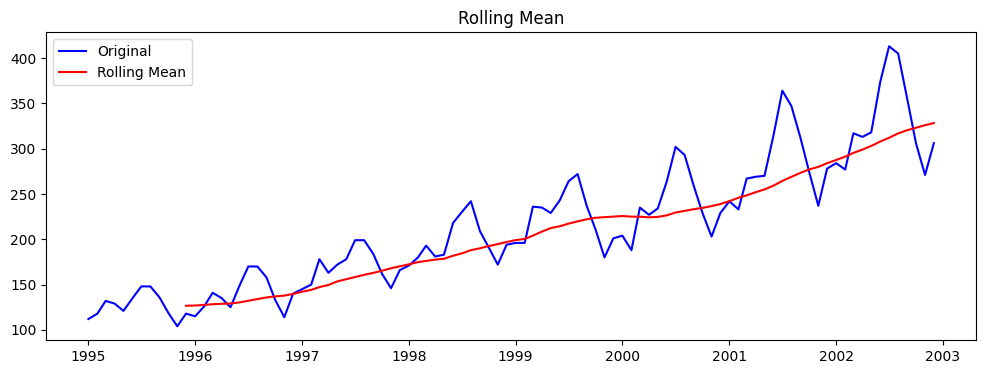

Results of Dickey Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [56]:
plt.figure(figsize=(12,4))
sales= pd.DataFrame()
sales['Passengers'] = air[['Passengers']]
test_stationarity(sales)

In [57]:
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [58]:
adf_test(sales)

Fail to reject the null hypothesis
Data is non-stationary


**Feature Scaling (Transformations):**

1. Square Root Transform

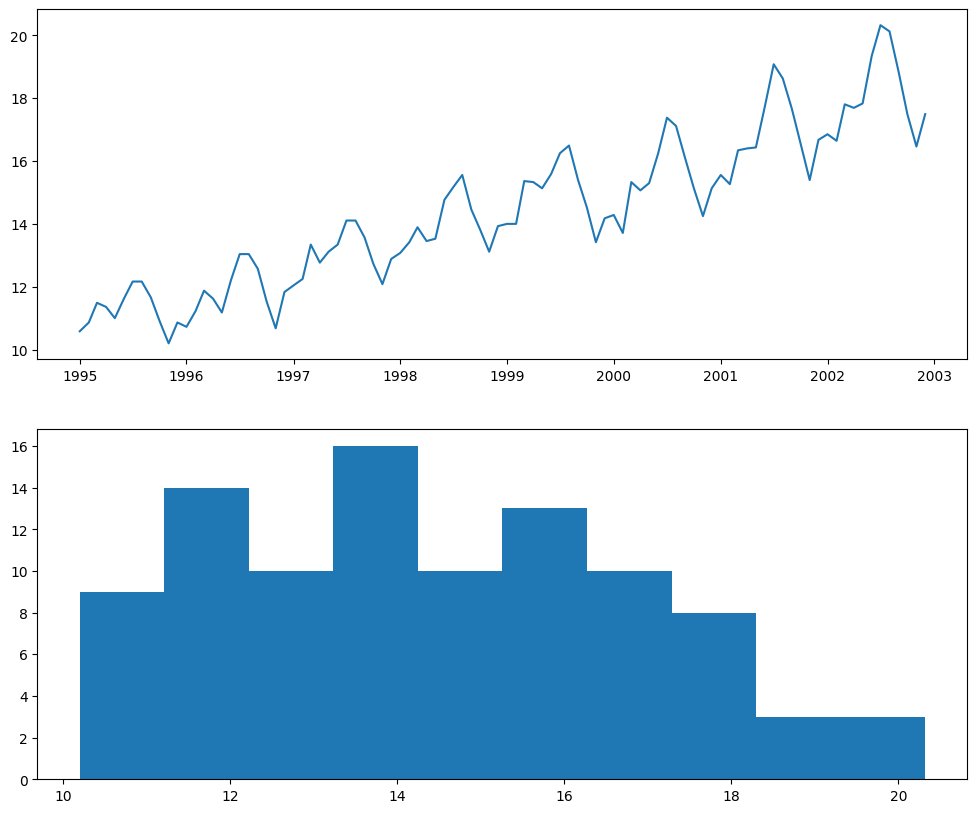

In [59]:
square_root= pd.DataFrame()
square_root = air[['Passengers']]
square_root['Passengers'] = np.sqrt(square_root.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(square_root['Passengers'])
plt.show()

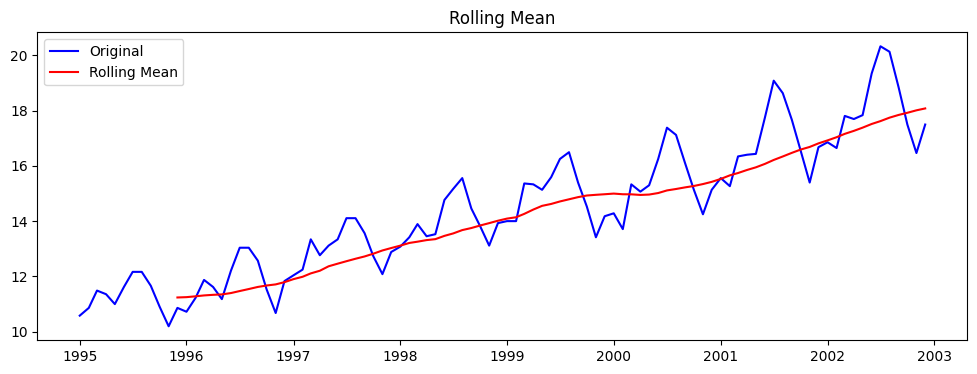

Results of Dickey Fuller Test:
Test Statistic                  0.451435
p-value                         0.983320
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [60]:
plt.figure(figsize=(12,4))
test_stationarity(square_root)

In [61]:
adf_test(square_root)

Fail to reject the null hypothesis
Data is non-stationary


2. Log Transform

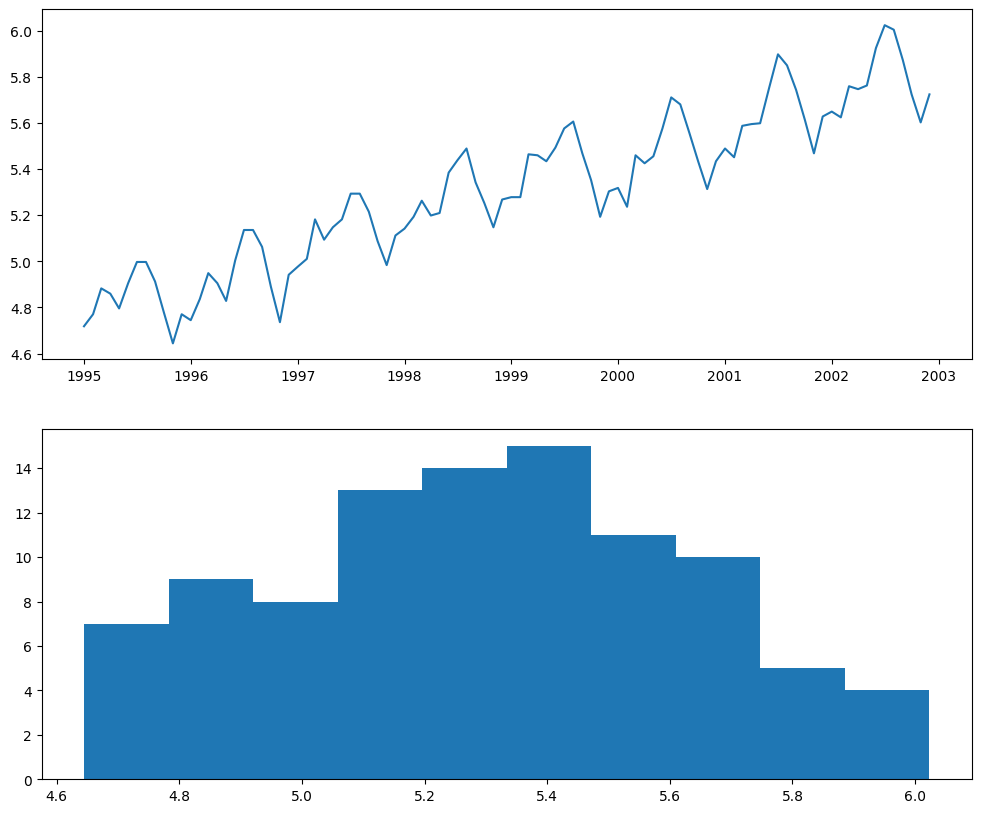

In [62]:
log = pd.DataFrame()
log = air[['Passengers']]
log['Passengers'] = np.log(log.Passengers)

# line chart
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(log['Passengers'])
plt.show()

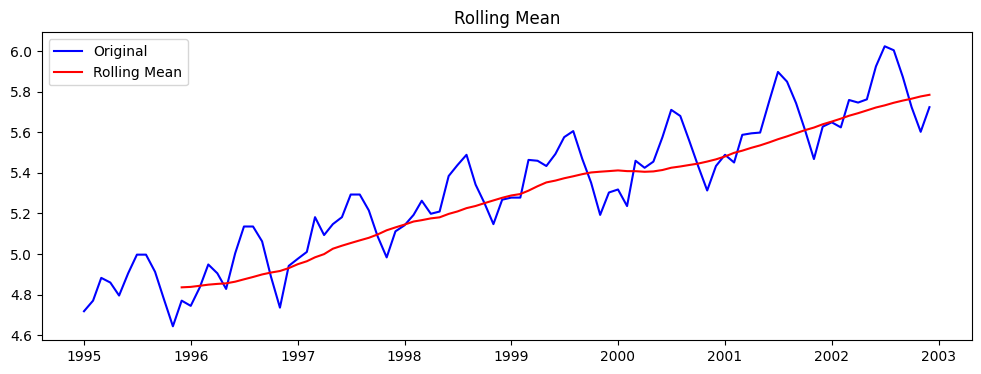

Results of Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [63]:
plt.figure(figsize=(12,4))
test_stationarity(log)

In [64]:
adf_test(log)

Fail to reject the null hypothesis
Data is non-stationary


Converting Non Stationary

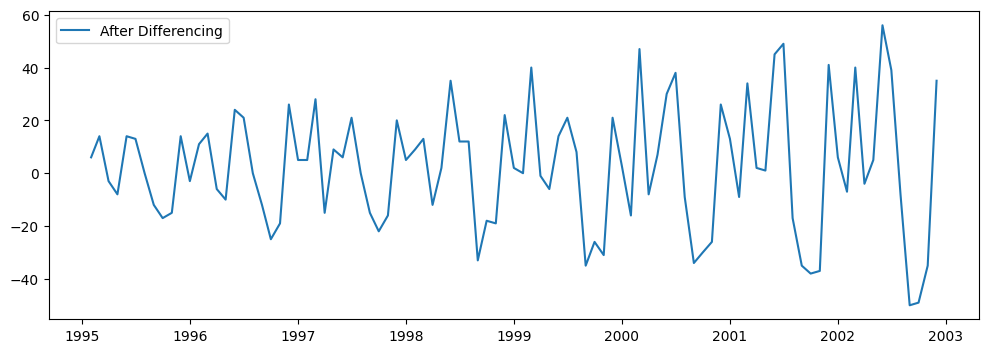

In [65]:
differencing = air - air.shift(1)
differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(differencing, label='After Differencing')
plt.legend(loc='best')
plt.show()

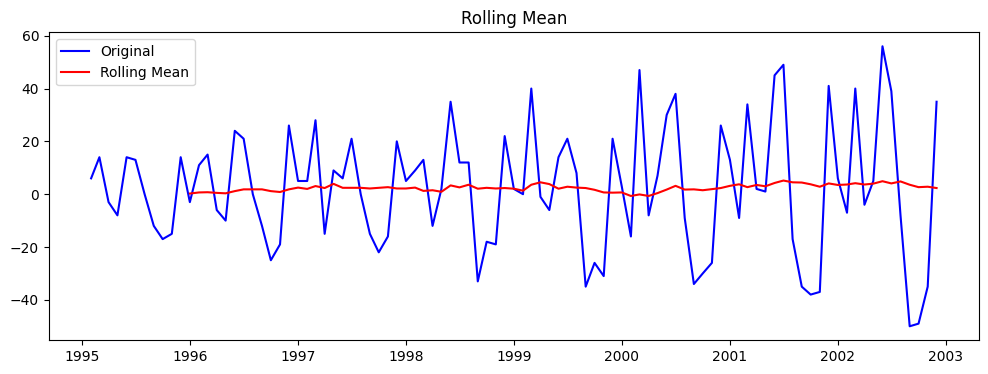

Results of Dickey Fuller Test:
Test Statistic                 -2.150002
p-value                         0.224889
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [66]:
plt.figure(figsize=(12,4))
test_stationarity(differencing)

In [67]:
adf_test(differencing)

Fail to reject the null hypothesis
Data is non-stationary


**Seasonal Differencing**

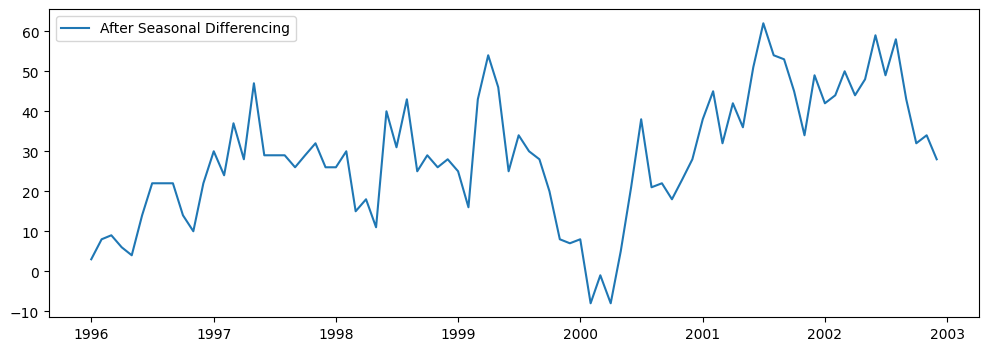

In [68]:
seasonal_differencing = air - air.shift(12)
seasonal_differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(seasonal_differencing, label='After Seasonal Differencing')
plt.legend(loc='best')
plt.show()

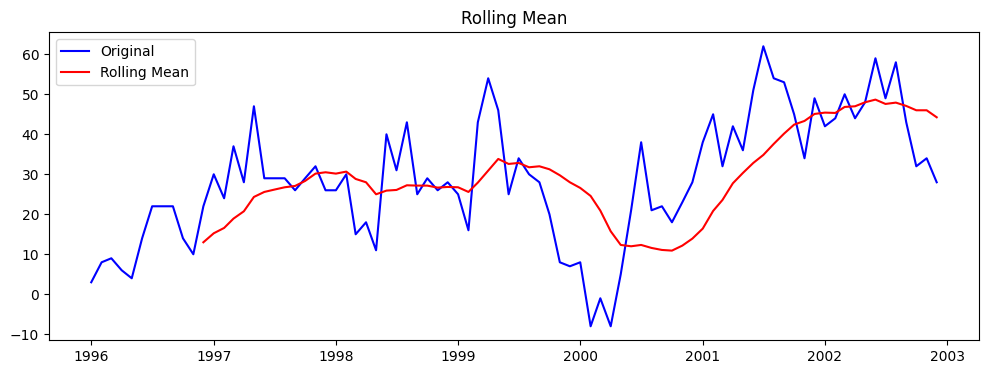

Results of Dickey Fuller Test:
Test Statistic                 -2.690004
p-value                         0.075784
#Lags Used                      1.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [69]:
plt.figure(figsize=(12,4))
test_stationarity(seasonal_differencing)

In [70]:
adf_test(seasonal_differencing)

Fail to reject the null hypothesis
Data is non-stationary


**Transformation**

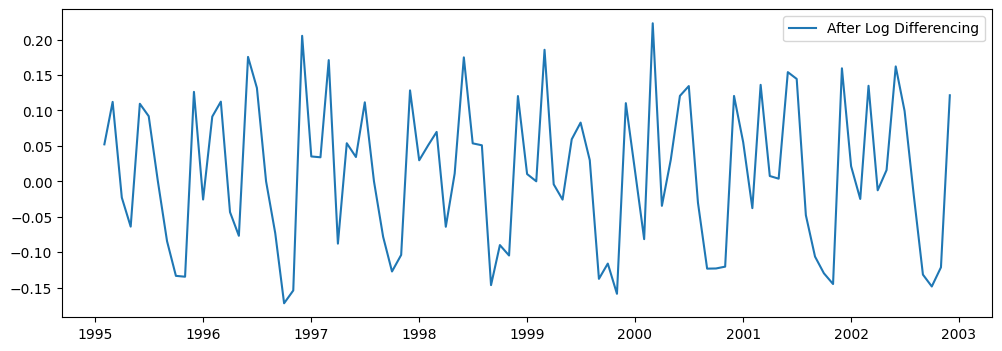

In [71]:
log_diff = log - log.shift(1)
log_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(log_diff, label='After Log Differencing')
plt.legend(loc='best')
plt.show()

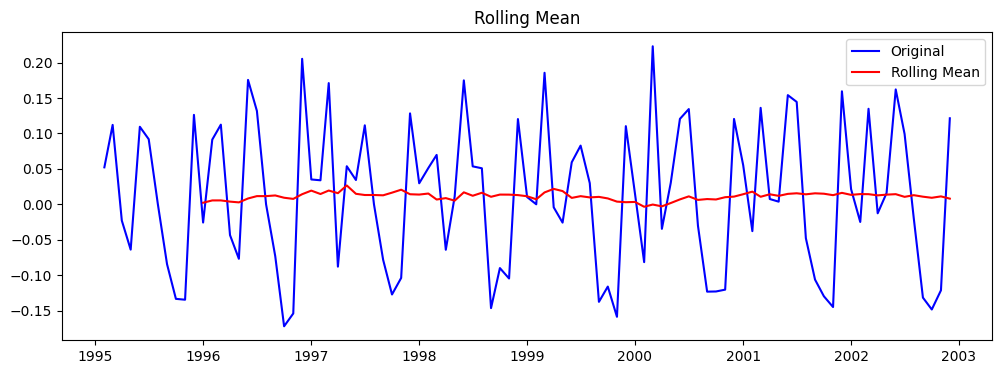

Results of Dickey Fuller Test:
Test Statistic                 -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [72]:
plt.figure(figsize=(12,4))
test_stationarity(log_diff)

In [73]:
adf_test(log_diff)

Fail to reject the null hypothesis
Data is non-stationary


**Box Cox Transformation**

Passengers
Date                  
1995-01-01    4.718499
1995-02-01    4.770685
1995-03-01    4.882802
1995-04-01    4.859812
1995-05-01    4.795791

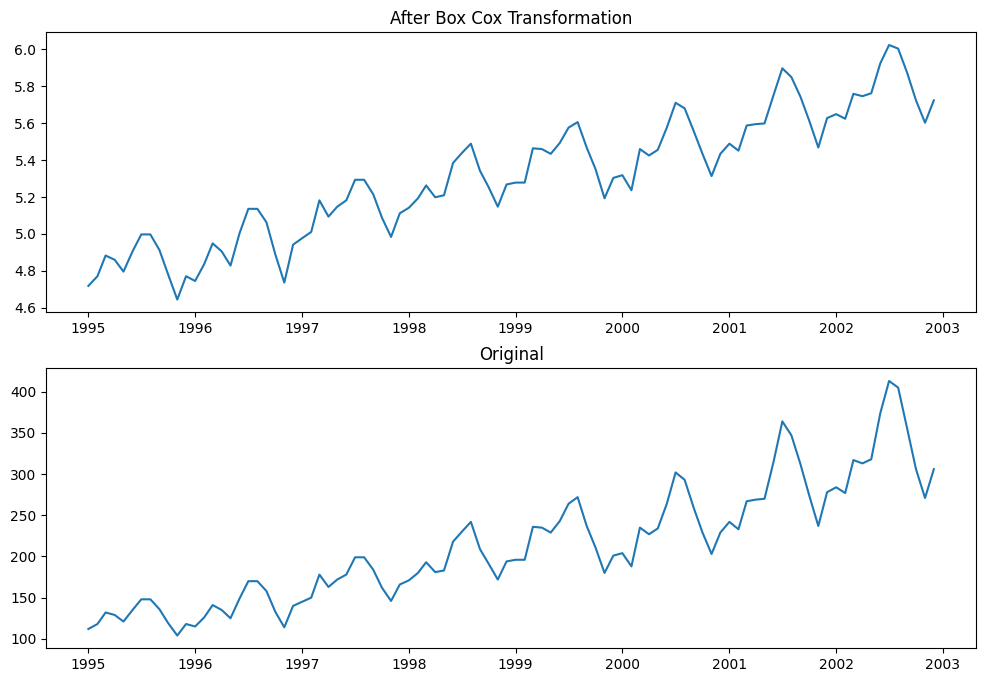

In [74]:
data_boxcox = pd.DataFrame()
data_boxcox['Passengers'] = pd.Series(boxcox(air['Passengers'], lmbda=0), air.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(12,8),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(air, label='original')
axis[1].set_title('Original')
plt.show()

Observation:

We can see the variance became almost constant after the transformation. Both in the earlier and later years the variance is almost similar.

But we can see that still the series has an upward trend. So, the mean is not constant yet. Hence, we need to do Differencing for making the mean constant.

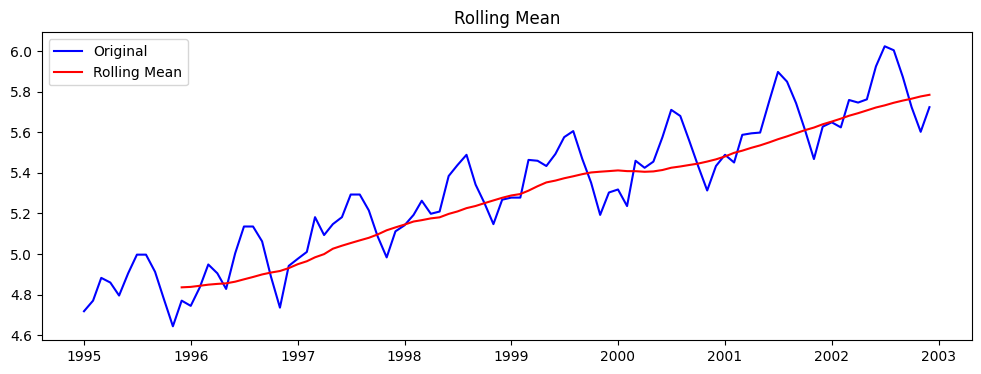

Results of Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [75]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox)

In [76]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


**Differencing of the Box-Cox Transformation**

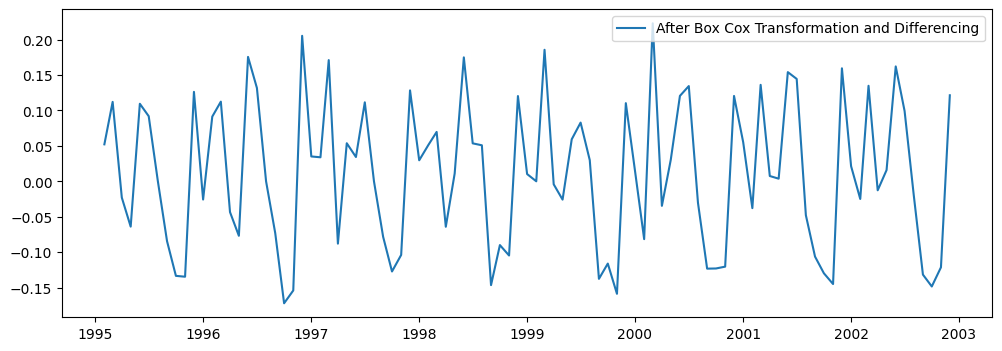

In [77]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

Observation:

We can see that there is no trend (upward or downward) after differencing on the Box Cox transformation.

It is a horizontal trend.

The mean became constant. The mean is zero.

Also, the variance is almost constant.

**Lets test the Stationarity again.**

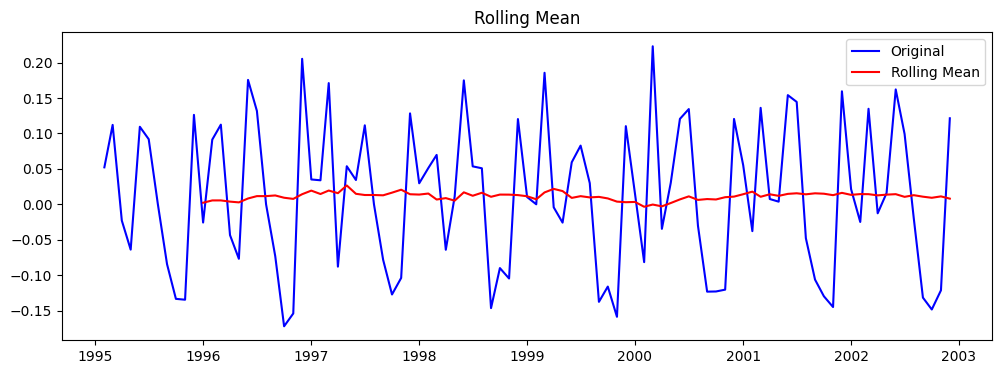

Results of Dickey Fuller Test:
Test Statistic                 -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [78]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox_diff)

In [79]:
adf_test(data_boxcox_diff)

Fail to reject the null hypothesis
Data is non-stationary


**Building The Time Series Forecasting with Optimal Value using ARIMA**

In [80]:
train_data_boxcox = data_boxcox[:size]
test_data_boxcox = data_boxcox[size:]
train_data_boxcox_diff = data_boxcox_diff[:size]
test_data_boxcox_diff = data_boxcox_diff[size:]

**Building The Time Series Forecasting with Optimal Value using ARIMA**

In [81]:
# Grid search ARIMA parameters for a time series
# Evaluate an ARIMA model for a given order (p,d,q) and return RMSE

def evaluate_arima_model(X, arima_order):

# Prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

# Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
# Calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [82]:
# Evaluate parameters
p_values = range(0,5)
d_values = range(0,5)
q_values = range(0,5)
evaluate_models(train_data_boxcox_diff.Passengers, p_values, d_values, q_values)

Best ARIMA(4, 1, 4) RMSE=0.090


**Inverse transformation of the Box-Cox Differencing**

In [83]:
model = ARIMA(train_data_boxcox_diff, order=(4, 1, 4))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()

# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.Passengers[0])

# Now doing the reverse transformation 
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

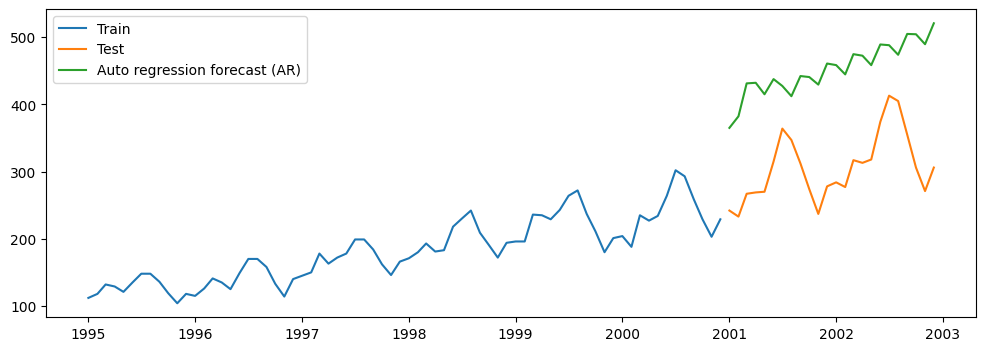

In [84]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

Observation:

We can see that we have done moderately well.

No Seasonality captured. Only Trend has been captured

**Model Evaluation**

RMSE (Root Mean Squared Error)

In [85]:
rmse_arima = np.sqrt(mean_squared_error(test_data, y_hat_ar['arima_forecast'][test_data.index.min():])).round(2)
rmse_arima

152.57

MAPE (Mean Absolute Percent Error)

In [86]:
mape_arima = round(np.mean(np.abs((test_data.Passengers - y_hat_ar['arima_forecast'][test_data.index.min():])/test_data.Passengers)*100),2)
mape_arima

50.27

Observation

We can see that AR model result is good job but not better than Holt's method. We can compare  both because the Holt's method includes seasonality in it.

**Analysing Residuals**



In [87]:
model_residual = model_fit.resid
model_residual.mean()

-0.005710683617502512

In [88]:
adf_test(model_residual)

Fail to reject the null hypothesis
Data is non-stationary


No Auto Correlation Between Residuals

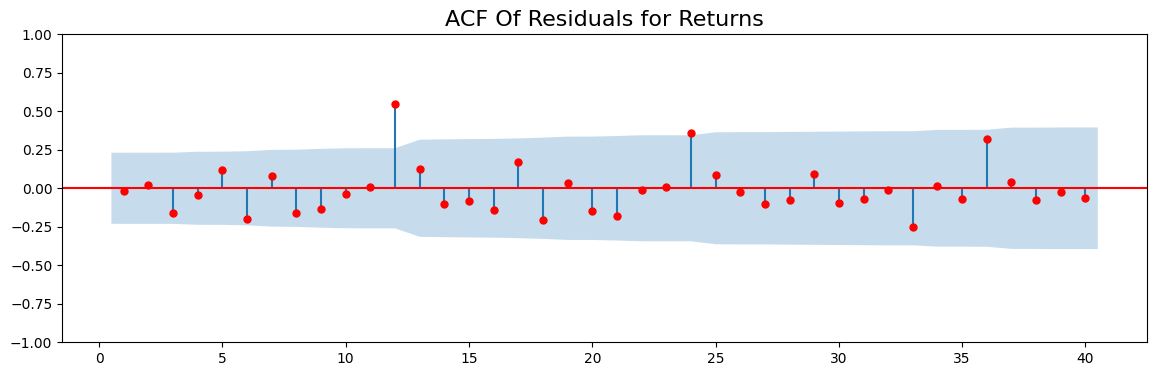

In [89]:
plt.rcParams['figure.figsize']=(14,4)
plot_acf(model_residual, zero = False, lags = 40,color='red')
plt.title("ACF Of Residuals for Returns",size= 16)
plt.show()

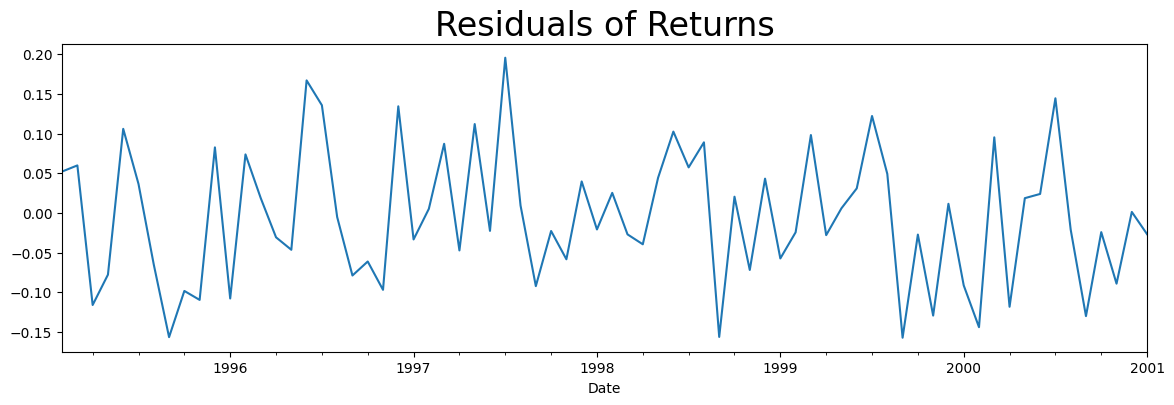

In [90]:
model_residual.plot(figsize=(14,4))
plt.title("Residuals of Returns", size=24)
plt.show()

**Seasonal Auto Regressive Integrated Moving Average (SARIMA)**

We are only passing the Box Cox because the ARIMAX will perform the differencing internally

seasonal_order P=1, Q=1, D=1 and m=12 || m=12 . Because the seasonality is monthly.

In [91]:
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
y_hat_sarima = data_boxcox_diff.copy()

Inverse Transformation of the Differencing Box-Cox Transformation

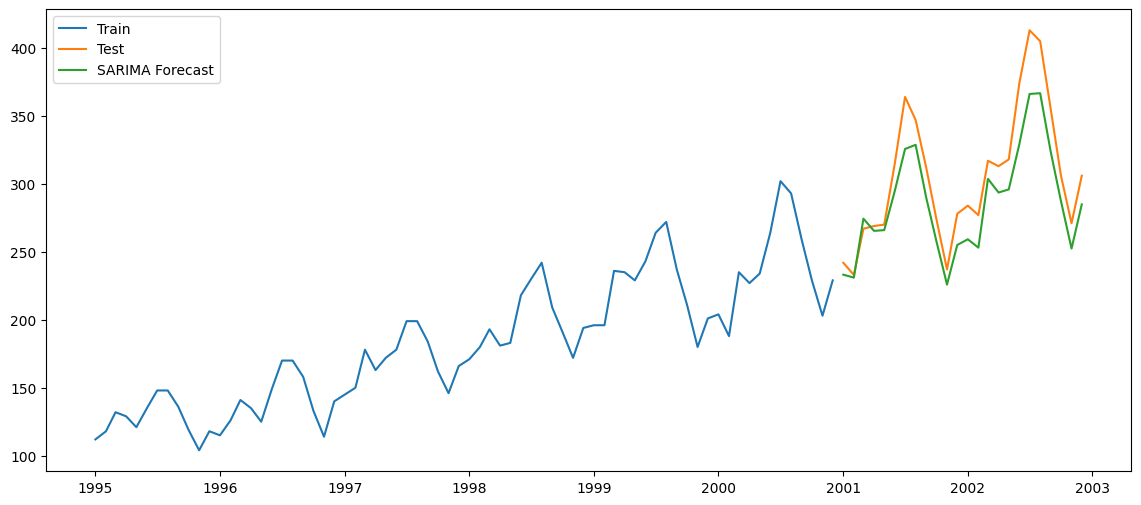

In [92]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
plt.figure(figsize=(14,6))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

Model Evaluation

RMSE (Root Mean Squared Error)

In [93]:
rmse_sarima = np.sqrt(mean_squared_error(test_data, y_hat_sarima['sarima_forecast'][test_data.index.min():])).round(2)
rmse_sarima

23.98

MAPE (Mean Absolute Percent Error)

In [94]:
mape_sarima = round(np.mean(np.abs((test_data.Passengers - y_hat_sarima['sarima_forecast'][test_data.index.min():])/test_data.Passengers)*100),2)
mape_sarima

6.43

**Observation:**

SARIMA method has done reasonably well as it captures seasonality.

The performance is comparable with the other methods such as Holt's Winter additive/multiplicative, whcich also captures seasonality.

**Analysing the Residuals**

In [95]:
model_residual = model_fit.resid
model_residual.mean()

0.035874155035889616

In [96]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


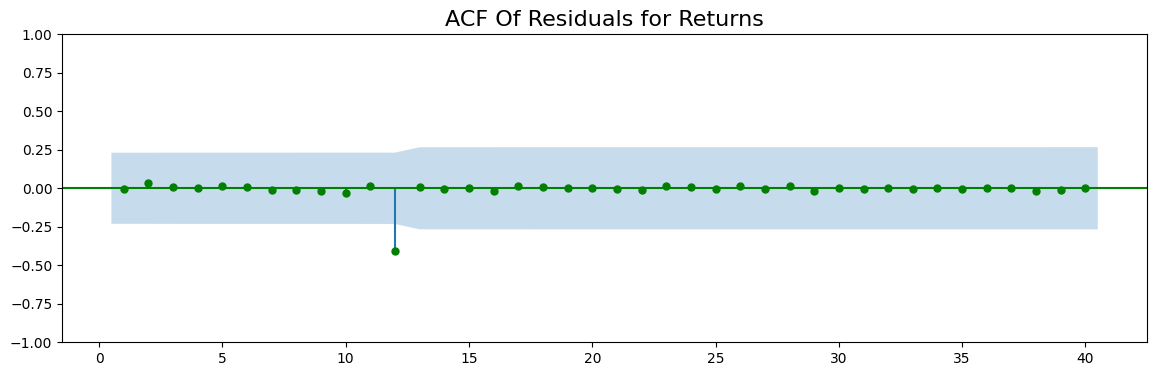

In [97]:
plt.rcParams["figure.figsize"] = (14,4)
plot_acf(model_residual, zero = False, lags = 40,color='green')
plt.title("ACF Of Residuals for Returns",size= 16)
plt.show()

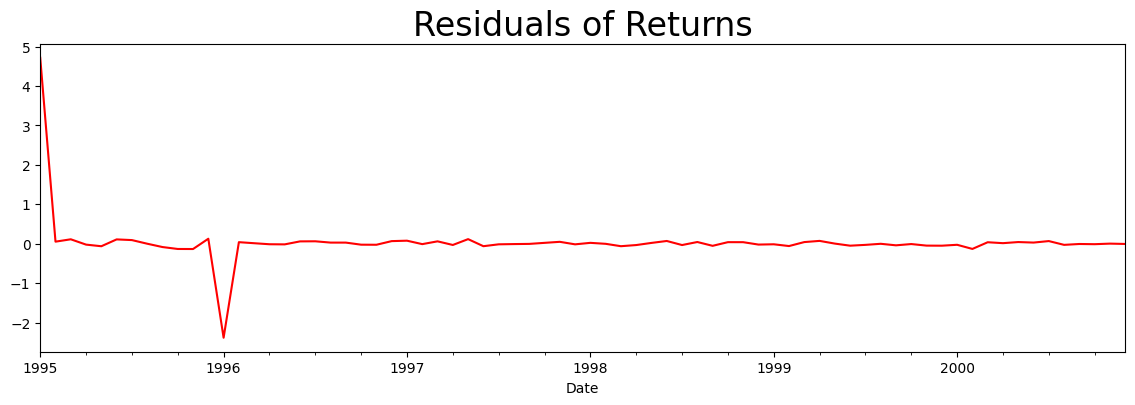

In [98]:
model_residual.plot(figsize=(14,4),color='red')
plt.title("Residuals of Returns", size=24)
plt.show()

**Creating model with differente Transformation Technique**

***Comparing the results***

In [99]:
Evaluation = {"Models":pd.Series(["Simple_Exponential","Double_Exponential","Triple_Exp_Additive","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Multiplicative","ARIMA","SARIMA"]),
        "MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp,mape_arima,mape_sarima]),
        "RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp,rmse_arima,rmse_sarima])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
table_evaluation


Models    MAPE(%)  RMSE_Values
0  Triple_Exp_Multiplicative   6.035079    23.058842
1                     SARIMA   6.430000    23.980000
2         Triple_Exp_Mul_Add   9.368409    34.989554
3        Triple_Exp_Additive  12.084814    47.570269
4         Triple_Exp_Add_Mul  13.341867    48.342084
5         Double_Exponential  17.122209    71.552552
6         Simple_Exponential  23.382283    91.113254
7                      ARIMA  50.270000   152.570000

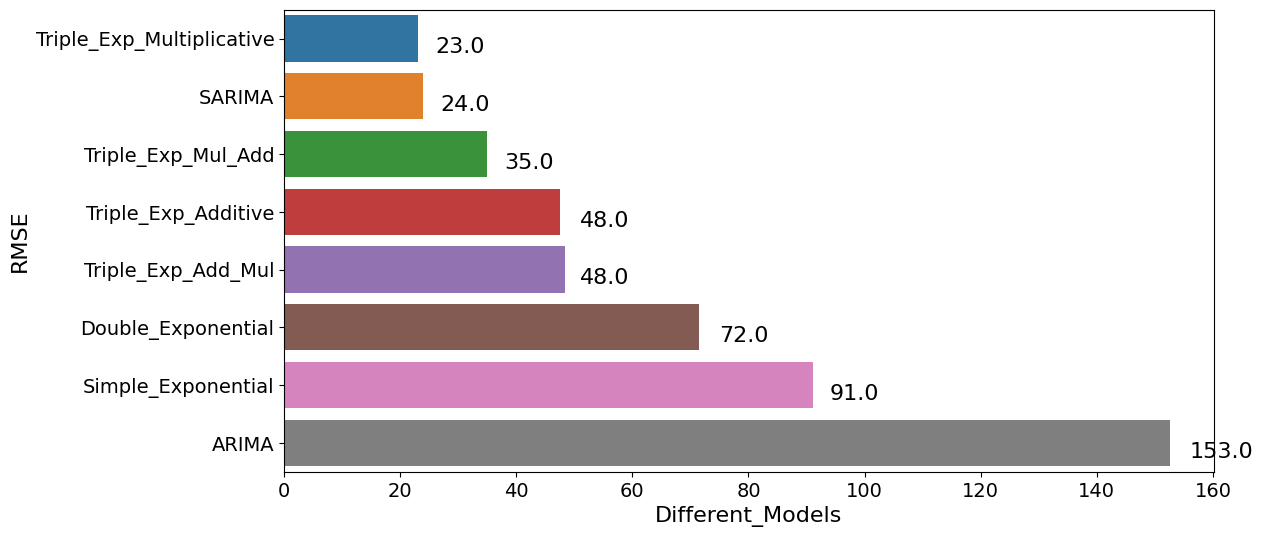

In [100]:
f, axe = plt.subplots(1,1, figsize=(12,6))
sns.barplot(x='RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 16)

plt.show()

**Observation:**

The Sarima Model did very well results as compared to other Models but Holts-Winter Method did slightly better than Sarima

Note: Sarima with Hyperparameter tuning may get better results

Even in methods such as Triple Exponential Smoothing (Holts-Winters Method) taking Seasonality and Trend as Multiplicative gave the best restult in this case

**Data Pre-processing for Model Driven Techniques**

Creating Dummy Variables of the Categorical Feature Month of Date Time feature

In [101]:
cocacola = air.copy()
cocacola.reset_index(inplace=True)
cocacola['t'] = np.arange(1,len(cocacola)+1)
cocacola['t_squared'] = np.square(cocacola.t)
cocacola["month"] = cocacola.Date.dt.strftime("%b") # month extraction
cocacola["year"] = cocacola.Date.dt.strftime("%Y")  # year extraction
months = pd.get_dummies(cocacola['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
cocacola = pd.concat([cocacola,months],axis=1)
cocacola['log_passengers'] = np.log(cocacola['Passengers'])
cocacola

Date  Passengers   t  t_squared month  year  Jan  Feb  Mar  Apr  May  \
0  1995-01-01         112   1          1   Jan  1995    1    0    0    0    0   
1  1995-02-01         118   2          4   Feb  1995    0    1    0    0    0   
2  1995-03-01         132   3          9   Mar  1995    0    0    1    0    0   
3  1995-04-01         129   4         16   Apr  1995    0    0    0    1    0   
4  1995-05-01         121   5         25   May  1995    0    0    0    0    1   
..        ...         ...  ..        ...   ...   ...  ...  ...  ...  ...  ...   
91 2002-08-01         405  92       8464   Aug  2002    0    0    0    0    0   
92 2002-09-01         355  93       8649   Sep  2002    0    0    0    0    0   
93 2002-10-01         306  94       8836   Oct  2002    0    0    0    0    0   
94 2002-11-01         271  95       9025   Nov  2002    0    0    0    0    0   
95 2002-12-01         306  96       9216   Dec  2002    0    0    0    0    0   

    Jun  Jul  Aug  Sep  Oct  Nov  Dec  log_passengers  
0     0    0    0    0    0    0    0        4.718499  
1     0    0    0    0    0    0    0        4.770685  
2     0    0    0    0    0    0    0        4.882802  
3     0    0    0    0    0    0    0        4.859812  
4     0    0    0    0    0    0    0        4.795791  
..  ...  ...  ...  ...  ...  ...  ...             ...  
91    0    0    1    0    0    0    0        6.003887  
92    0    0    0    1    0    0    0        5.872118  
93    0    0    0    0    1    0    0        5.723585  
94    0    0    0    0    0    1    0        5.602119  
95    0    0    0    0    0    0    1        5.723585  

[96 rows x 19 columns]

Splitting data into Train and Test

In [102]:
train_data = cocacola.iloc[:size]
test_data = cocacola.iloc[size:]

In [103]:
train_data

Date  Passengers   t  t_squared month  year  Jan  Feb  Mar  Apr  May  \
0  1995-01-01         112   1          1   Jan  1995    1    0    0    0    0   
1  1995-02-01         118   2          4   Feb  1995    0    1    0    0    0   
2  1995-03-01         132   3          9   Mar  1995    0    0    1    0    0   
3  1995-04-01         129   4         16   Apr  1995    0    0    0    1    0   
4  1995-05-01         121   5         25   May  1995    0    0    0    0    1   
..        ...         ...  ..        ...   ...   ...  ...  ...  ...  ...  ...   
67 2000-08-01         293  68       4624   Aug  2000    0    0    0    0    0   
68 2000-09-01         259  69       4761   Sep  2000    0    0    0    0    0   
69 2000-10-01         229  70       4900   Oct  2000    0    0    0    0    0   
70 2000-11-01         203  71       5041   Nov  2000    0    0    0    0    0   
71 2000-12-01         229  72       5184   Dec  2000    0    0    0    0    0   

    Jun  Jul  Aug  Sep  Oct  Nov  Dec  log_passengers  
0     0    0    0    0    0    0    0        4.718499  
1     0    0    0    0    0    0    0        4.770685  
2     0    0    0    0    0    0    0        4.882802  
3     0    0    0    0    0    0    0        4.859812  
4     0    0    0    0    0    0    0        4.795791  
..  ...  ...  ...  ...  ...  ...  ...             ...  
67    0    0    1    0    0    0    0        5.680173  
68    0    0    0    1    0    0    0        5.556828  
69    0    0    0    0    1    0    0        5.433722  
70    0    0    0    0    0    1    0        5.313206  
71    0    0    0    0    0    0    1        5.433722  

[72 rows x 19 columns]

In [104]:
test_data

Date  Passengers   t  t_squared month  year  Jan  Feb  Mar  Apr  May  \
72 2001-01-01         242  73       5329   Jan  2001    1    0    0    0    0   
73 2001-02-01         233  74       5476   Feb  2001    0    1    0    0    0   
74 2001-03-01         267  75       5625   Mar  2001    0    0    1    0    0   
75 2001-04-01         269  76       5776   Apr  2001    0    0    0    1    0   
76 2001-05-01         270  77       5929   May  2001    0    0    0    0    1   
77 2001-06-01         315  78       6084   Jun  2001    0    0    0    0    0   
78 2001-07-01         364  79       6241   Jul  2001    0    0    0    0    0   
79 2001-08-01         347  80       6400   Aug  2001    0    0    0    0    0   
80 2001-09-01         312  81       6561   Sep  2001    0    0    0    0    0   
81 2001-10-01         274  82       6724   Oct  2001    0    0    0    0    0   
82 2001-11-01         237  83       6889   Nov  2001    0    0    0    0    0   
83 2001-12-01         278  84       7056   Dec  2001    0    0    0    0    0   
84 2002-01-01         284  85       7225   Jan  2002    1    0    0    0    0   
85 2002-02-01         277  86       7396   Feb  2002    0    1    0    0    0   
86 2002-03-01         317  87       7569   Mar  2002    0    0    1    0    0   
87 2002-04-01         313  88       7744   Apr  2002    0    0    0    1    0   
88 2002-05-01         318  89       7921   May  2002    0    0    0    0    1   
89 2002-06-01         374  90       8100   Jun  2002    0    0    0    0    0   
90 2002-07-01         413  91       8281   Jul  2002    0    0    0    0    0   
91 2002-08-01         405  92       8464   Aug  2002    0    0    0    0    0   
92 2002-09-01         355  93       8649   Sep  2002    0    0    0    0    0   
93 2002-10-01         306  94       8836   Oct  2002    0    0    0    0    0   
94 2002-11-01         271  95       9025   Nov  2002    0    0    0    0    0   
95 2002-12-01         306  96       9216   Dec  2002    0    0    0    0    0   

    Jun  Jul  Aug  Sep  Oct  Nov  Dec  log_passengers  
72    0    0    0    0    0    0    0        5.488938  
73    0    0    0    0    0    0    0        5.451038  
74    0    0    0    0    0    0    0        5.587249  
75    0    0    0    0    0    0    0        5.594711  
76    0    0    0    0    0    0    0        5.598422  
77    1    0    0    0    0    0    0        5.752573  
78    0    1    0    0    0    0    0        5.897154  
79    0    0    1    0    0    0    0        5.849325  
80    0    0    0    1    0    0    0        5.743003  
81    0    0    0    0    1    0    0        5.613128  
82    0    0    0    0    0    1    0        5.468060  
83    0    0    0    0    0    0    1        5.627621  
84    0    0    0    0    0    0    0        5.648974  
85    0    0    0    0    0    0    0        5.624018  
86    0    0    0    0    0    0    0        5.758902  
87    0    0    0    0    0    0    0        5.746203  
88    0    0    0    0    0    0    0        5.762051  
89    1    0    0    0    0    0    0        5.924256  
90    0    1    0    0    0    0    0        6.023448  
91    0    0    1    0    0    0    0        6.003887  
92    0    0    0    1    0    0    0        5.872118  
93    0    0    0    0    1    0    0        5.723585  
94    0    0    0    0    0    1    0        5.602119  
95    0    0    0    0    0    0    1        5.723585

Building Ordinary Square Model

1. Linear Model

In [105]:
linear_model = smf.ols('Passengers~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_linear))**2))
rmse_linear

51.667792995646266

2. Exponential Model

In [106]:
exp = smf.ols('log_passengers~t',data=train_data).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test_data['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

42.55232894600461

3. Quadratic Model

In [107]:
quad = smf.ols('Passengers~t+t_squared',data=train_data).fit()
pred_quad = pd.Series(quad.predict(test_data[["t","t_squared"]]))
rmse_quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_quad))**2))
rmse_quad

51.99073640155397

4. Additive seasonality

In [108]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

127.2645156532034

5. Additive Seasonality Quadratic

In [109]:
add_sea_quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

35.241608485927266

6. Multiplicative Seasonality

In [110]:
mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_mult_sea = pd.Series(mul_sea.predict(test_data))
rmse_mult_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

132.18762800263443

7. Multiplicative Additive Seasonality

In [111]:
mul_add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test_data))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

11.714670246780516

In [112]:
np.exp(pred_mult_add_sea)

72    245.378110
73    251.466317
74    290.915247
75    278.690401
76    275.377947
77    308.136092
78    340.898573
79    343.777446
80    308.799188
81    271.947832
82    238.912819
83    273.505888
84    280.894281
85    287.863698
86    333.022490
87    319.028212
88    315.236312
89    352.735890
90    390.240432
91    393.535995
92    353.494963
93    311.309720
94    273.493201
95    313.093291
dtype: float64

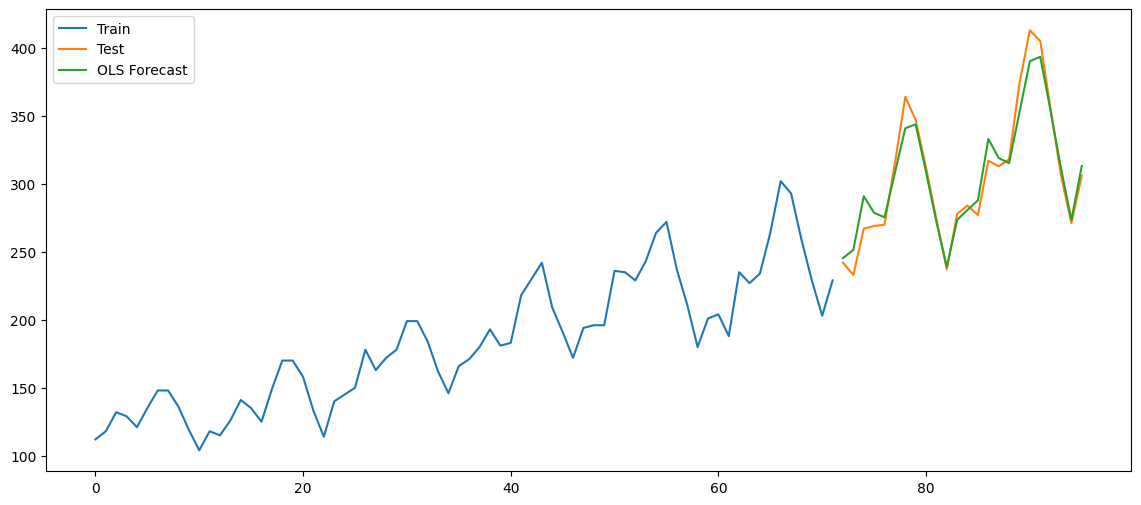

In [113]:
plt.figure(figsize=(14,6))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data['Passengers'], label='Test')
plt.plot(np.exp(pred_mult_add_sea), label='OLS Forecast')
plt.legend(loc='best')
plt.show()

Comparing Result

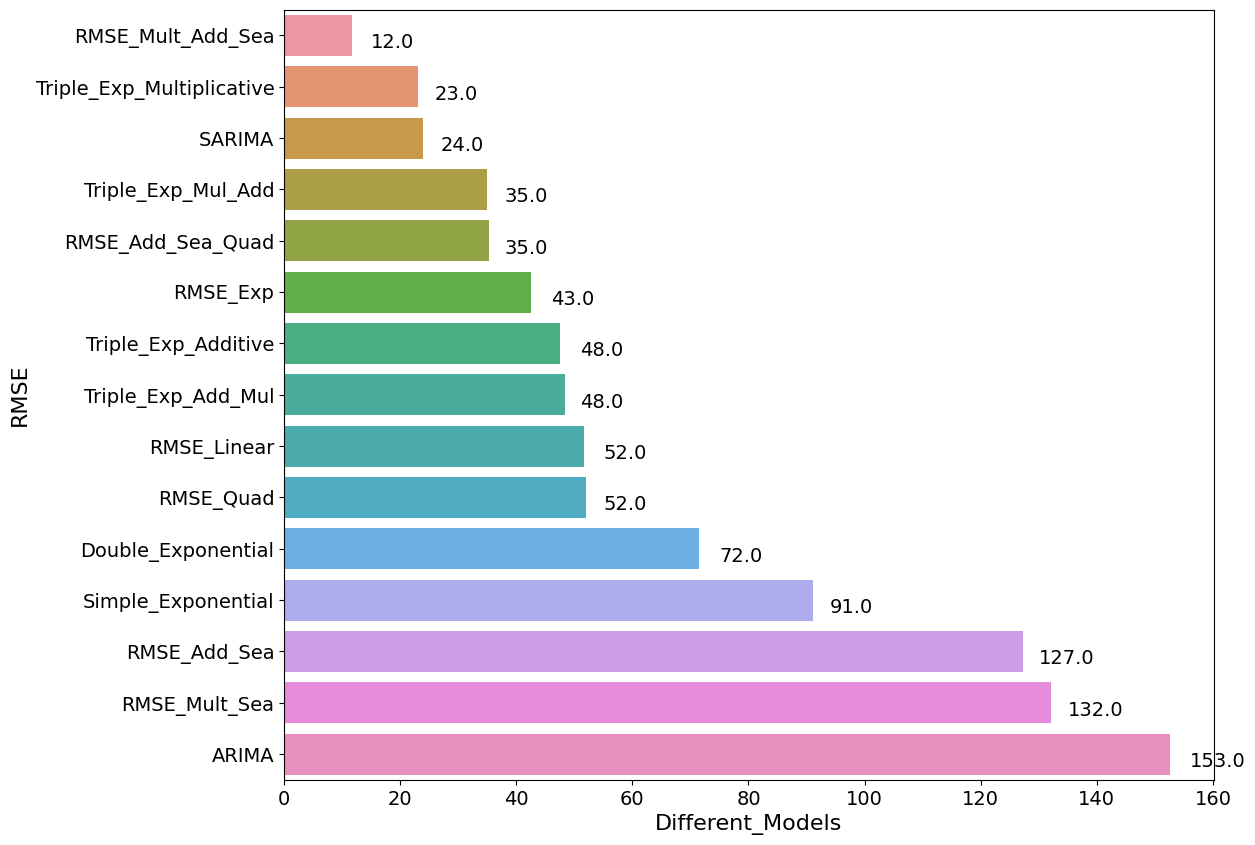

In [114]:
data = {"Models":pd.Series(["RMSE_Linear","RMSE_Exp","RMSE_Quad","RMSE_Add_Sea","RMSE_Add_Sea_Quad","RMSE_Mult_Sea","RMSE_Mult_Add_Sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
e = table_rmse.append(table_evaluation)
e.drop('MAPE(%)', axis=1, inplace=True)
e.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
f, axe = plt.subplots(1,1, figsize=(12,10))
sns.barplot(x='RMSE_Values', y='Models', data=e, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(e.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 14)

plt.show()

**Conclusions**

Ordinary Least Sqaured with Multiplicative Additive Seasonality are
The best model we have got so far with the lowest RMSE and lowest MAPE.

#Q.No 2 COCOLA Problem

In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import calendar
from math import sqrt
from pandas import datetime
import plotly.express as px
from scipy.stats import boxcox
import plotly.graph_objects as go
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf 
from plotly.subplots import make_subplots
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [116]:
from google.colab import files
uploaded=files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [117]:
data=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [118]:
data

Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q4_95  4333.000000
40   Q1_96  4194.000000
41   Q2_96  5253.000000

In [119]:
data.shape

(42, 2)

In [120]:
data.describe()

Sales
count    42.000000
mean   2994.353308
std     977.930896
min    1547.818996
25%    2159.714247
50%    2782.376999
75%    3609.250000
max    5253.000000

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [122]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [123]:
data.nunique()

Quarter    42
Sales      42
dtype: int64

Feature Engineering



In [124]:
#converting the quarters into years
data['Quarter_Year'] = data['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
#Clean way to convert quarterly periods to datetime in pandas
data.head(10)

Quarter        Sales Quarter_Year
0   Q1_86  1734.827000      Q1 1986
1   Q2_86  2244.960999      Q2 1986
2   Q3_86  2533.804993      Q3 1986
3   Q4_86  2154.962997      Q4 1986
4   Q1_87  1547.818996      Q1 1987
5   Q2_87  2104.411995      Q2 1987
6   Q3_87  2014.362999      Q3 1987
7   Q4_87  1991.746998      Q4 1987
8   Q1_88  1869.049999      Q1 1988
9   Q2_88  2313.631996      Q2 1988

In [125]:
#Coverting Quarter Years with Quarter Start Date Year (Date Month and Year)
# Converting into datetime formate as the index was not in correct formate.
data['Date'] = (pd.to_datetime(data['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))
data.head(10)

Quarter        Sales Quarter_Year       Date
0   Q1_86  1734.827000      Q1 1986 1986-01-01
1   Q2_86  2244.960999      Q2 1986 1986-04-01
2   Q3_86  2533.804993      Q3 1986 1986-07-01
3   Q4_86  2154.962997      Q4 1986 1986-10-01
4   Q1_87  1547.818996      Q1 1987 1987-01-01
5   Q2_87  2104.411995      Q2 1987 1987-04-01
6   Q3_87  2014.362999      Q3 1987 1987-07-01
7   Q4_87  1991.746998      Q4 1987 1987-10-01
8   Q1_88  1869.049999      Q1 1988 1988-01-01
9   Q2_88  2313.631996      Q2 1988 1988-04-01

In [126]:
#Extracting the Quarters and putting in column
data['Quarters'] = 0

for i in range(42):
    n = data['Quarter'][i]
    data['Quarters'][i] = n[0:2]
    
data.head

<bound method NDFrame.head of    Quarter        Sales Quarter_Year       Date Quarters
0    Q1_86  1734.827000      Q1 1986 1986-01-01       Q1
1    Q2_86  2244.960999      Q2 1986 1986-04-01       Q2
2    Q3_86  2533.804993      Q3 1986 1986-07-01       Q3
3    Q4_86  2154.962997      Q4 1986 1986-10-01       Q4
4    Q1_87  1547.818996      Q1 1987 1987-01-01       Q1
5    Q2_87  2104.411995      Q2 1987 1987-04-01       Q2
6    Q3_87  2014.362999      Q3 1987 1987-07-01       Q3
7    Q4_87  1991.746998      Q4 1987 1987-10-01       Q4
8    Q1_88  1869.049999      Q1 1988 1988-01-01       Q1
9    Q2_88  2313.631996      Q2 1988 1988-04-01       Q2
10   Q3_88  2128.320000      Q3 1988 1988-07-01       Q3
11   Q4_88  2026.828999      Q4 1988 1988-10-01       Q4
12   Q1_89  1910.603996      Q1 1989 1989-01-01       Q1
13   Q2_89  2331.164993      Q2 1989 1989-04-01       Q2
14   Q3_89  2206.549995      Q3 1989 1989-07-01       Q3
15   Q4_89  2173.967995      Q4 1989 1989-10-01       Q4
1

In [127]:
#Creating Dummy Variables for Quarters Variale
dummy=pd.DataFrame(pd.get_dummies(data['Quarters']))
data1=pd.concat((data,dummy),axis=1)

In [128]:
data1

Quarter        Sales Quarter_Year       Date Quarters  Q1  Q2  Q3  Q4
0    Q1_86  1734.827000      Q1 1986 1986-01-01       Q1   1   0   0   0
1    Q2_86  2244.960999      Q2 1986 1986-04-01       Q2   0   1   0   0
2    Q3_86  2533.804993      Q3 1986 1986-07-01       Q3   0   0   1   0
3    Q4_86  2154.962997      Q4 1986 1986-10-01       Q4   0   0   0   1
4    Q1_87  1547.818996      Q1 1987 1987-01-01       Q1   1   0   0   0
5    Q2_87  2104.411995      Q2 1987 1987-04-01       Q2   0   1   0   0
6    Q3_87  2014.362999      Q3 1987 1987-07-01       Q3   0   0   1   0
7    Q4_87  1991.746998      Q4 1987 1987-10-01       Q4   0   0   0   1
8    Q1_88  1869.049999      Q1 1988 1988-01-01       Q1   1   0   0   0
9    Q2_88  2313.631996      Q2 1988 1988-04-01       Q2   0   1   0   0
10   Q3_88  2128.320000      Q3 1988 1988-07-01       Q3   0   0   1   0
11   Q4_88  2026.828999      Q4 1988 1988-10-01       Q4   0   0   0   1
12   Q1_89  1910.603996      Q1 1989 1989-01-01       Q1   1   0   0   0
13   Q2_89  2331.164993      Q2 1989 1989-04-01       Q2   0   1   0   0
14   Q3_89  2206.549995      Q3 1989 1989-07-01       Q3   0   0   1   0
15   Q4_89  2173.967995      Q4 1989 1989-10-01       Q4   0   0   0   1
16   Q1_90  2148.278000      Q1 1990 1990-01-01       Q1   1   0   0   0
17   Q2_90  2739.307999      Q2 1990 1990-04-01       Q2   0   1   0   0
18   Q3_90  2792.753998      Q3 1990 1990-07-01       Q3   0   0   1   0
19   Q4_90  2556.009995      Q4 1990 1990-10-01       Q4   0   0   0   1
20   Q1_91  2480.973999      Q1 1991 1991-01-01       Q1   1   0   0   0
21   Q2_91  3039.522995      Q2 1991 1991-04-01       Q2   0   1   0   0
22   Q3_91  3172.115997      Q3 1991 1991-07-01       Q3   0   0   1   0
23   Q4_91  2879.000999      Q4 1991 1991-10-01       Q4   0   0   0   1
24   Q1_92  2772.000000      Q1 1992 1992-01-01       Q1   1   0   0   0
25   Q2_92  3550.000000      Q2 1992 1992-04-01       Q2   0   1   0   0
26   Q3_92  3508.000000      Q3 1992 1992-07-01       Q3   0   0   1   0
27   Q4_92  3243.859993      Q4 1992 1992-10-01       Q4   0   0   0   1
28   Q1_93  3056.000000      Q1 1993 1993-01-01       Q1   1   0   0   0
29   Q2_93  3899.000000      Q2 1993 1993-04-01       Q2   0   1   0   0
30   Q3_93  3629.000000      Q3 1993 1993-07-01       Q3   0   0   1   0
31   Q4_93  3373.000000      Q4 1993 1993-10-01       Q4   0   0   0   1
32   Q1_94  3352.000000      Q1 1994 1994-01-01       Q1   1   0   0   0
33   Q2_94  4342.000000      Q2 1994 1994-04-01       Q2   0   1   0   0
34   Q3_94  4461.000000      Q3 1994 1994-07-01       Q3   0   0   1   0
35   Q4_94  4017.000000      Q4 1994 1994-10-01       Q4   0   0   0   1
36   Q1_95  3854.000000      Q1 1995 1995-01-01       Q1   1   0   0   0
37   Q2_95  4936.000000      Q2 1995 1995-04-01       Q2   0   1   0   0
38   Q3_95  4895.000000      Q3 1995 1995-07-01       Q3   0   0   1   0
39   Q4_95  4333.000000      Q4 1995 1995-10-01       Q4   0   0   0   1
40   Q1_96  4194.000000      Q1 1996 1996-01-01       Q1   1   0   0   0
41   Q2_96  5253.000000      Q2 1996 1996-04-01       Q2   0   1   0   0

In [129]:
#Dropping all unnecessary column
data1.drop(['Quarter','Quarter_Year'],axis=1,inplace=True)
data1

Sales       Date Quarters  Q1  Q2  Q3  Q4
0   1734.827000 1986-01-01       Q1   1   0   0   0
1   2244.960999 1986-04-01       Q2   0   1   0   0
2   2533.804993 1986-07-01       Q3   0   0   1   0
3   2154.962997 1986-10-01       Q4   0   0   0   1
4   1547.818996 1987-01-01       Q1   1   0   0   0
5   2104.411995 1987-04-01       Q2   0   1   0   0
6   2014.362999 1987-07-01       Q3   0   0   1   0
7   1991.746998 1987-10-01       Q4   0   0   0   1
8   1869.049999 1988-01-01       Q1   1   0   0   0
9   2313.631996 1988-04-01       Q2   0   1   0   0
10  2128.320000 1988-07-01       Q3   0   0   1   0
11  2026.828999 1988-10-01       Q4   0   0   0   1
12  1910.603996 1989-01-01       Q1   1   0   0   0
13  2331.164993 1989-04-01       Q2   0   1   0   0
14  2206.549995 1989-07-01       Q3   0   0   1   0
15  2173.967995 1989-10-01       Q4   0   0   0   1
16  2148.278000 1990-01-01       Q1   1   0   0   0
17  2739.307999 1990-04-01       Q2   0   1   0   0
18  2792.753998 1990-07-01       Q3   0   0   1   0
19  2556.009995 1990-10-01       Q4   0   0   0   1
20  2480.973999 1991-01-01       Q1   1   0   0   0
21  3039.522995 1991-04-01       Q2   0   1   0   0
22  3172.115997 1991-07-01       Q3   0   0   1   0
23  2879.000999 1991-10-01       Q4   0   0   0   1
24  2772.000000 1992-01-01       Q1   1   0   0   0
25  3550.000000 1992-04-01       Q2   0   1   0   0
26  3508.000000 1992-07-01       Q3   0   0   1   0
27  3243.859993 1992-10-01       Q4   0   0   0   1
28  3056.000000 1993-01-01       Q1   1   0   0   0
29  3899.000000 1993-04-01       Q2   0   1   0   0
30  3629.000000 1993-07-01       Q3   0   0   1   0
31  3373.000000 1993-10-01       Q4   0   0   0   1
32  3352.000000 1994-01-01       Q1   1   0   0   0
33  4342.000000 1994-04-01       Q2   0   1   0   0
34  4461.000000 1994-07-01       Q3   0   0   1   0
35  4017.000000 1994-10-01       Q4   0   0   0   1
36  3854.000000 1995-01-01       Q1   1   0   0   0
37  4936.000000 1995-04-01       Q2   0   1   0   0
38  4895.000000 1995-07-01       Q3   0   0   1   0
39  4333.000000 1995-10-01       Q4   0   0   0   1
40  4194.000000 1996-01-01       Q1   1   0   0   0
41  5253.000000 1996-04-01       Q2   0   1   0   0

In [130]:
#Making the Date as DateTime index for the Dataframe
data1.set_index('Date',inplace=True)
data1.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [131]:
data1.head(10)

Sales Quarters  Q1  Q2  Q3  Q4
Date                                            
1986-01-01  1734.827000       Q1   1   0   0   0
1986-04-01  2244.960999       Q2   0   1   0   0
1986-07-01  2533.804993       Q3   0   0   1   0
1986-10-01  2154.962997       Q4   0   0   0   1
1987-01-01  1547.818996       Q1   1   0   0   0
1987-04-01  2104.411995       Q2   0   1   0   0
1987-07-01  2014.362999       Q3   0   0   1   0
1987-10-01  1991.746998       Q4   0   0   0   1
1988-01-01  1869.049999       Q1   1   0   0   0
1988-04-01  2313.631996       Q2   0   1   0   0

In [132]:
#Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data
data["Date"] = pd.to_datetime(data.Date,format="%b-%y")
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"] = data.Date.dt.strftime("%Y") # year extraction
df.head()

Date  Passengers month  year
0 1995-01-01         112   Jan  1995
1 1995-02-01         118   Feb  1995
2 1995-03-01         132   Mar  1995
3 1995-04-01         129   Apr  1995
4 1995-05-01         121   May  1995

Data Visualisation

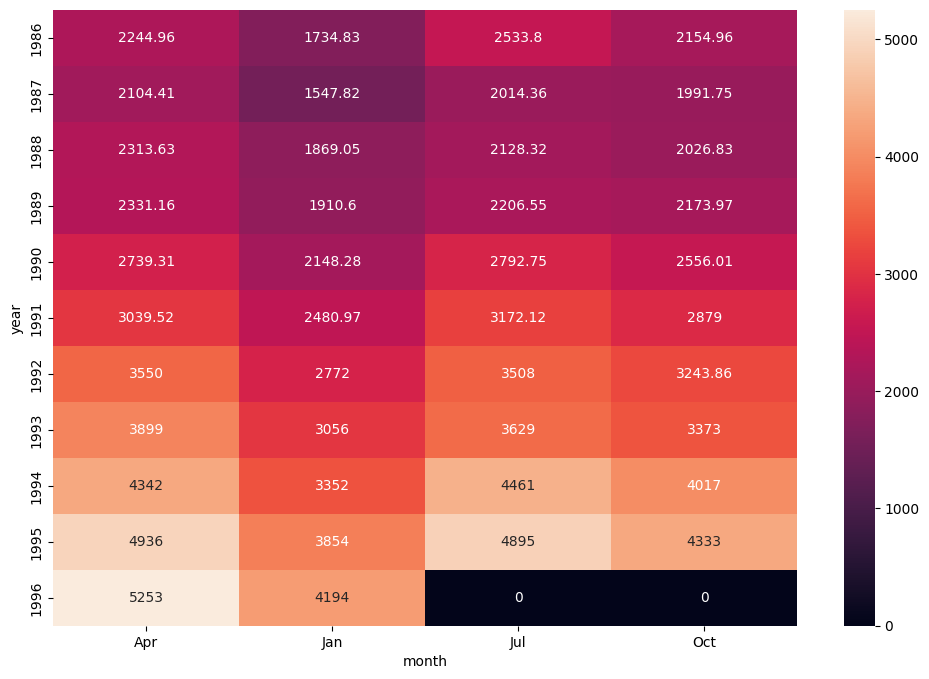

In [133]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data, values="Sales", index="year", columns="month", aggfunc="mean", fill_value=0)
sns.heatmap(heatmap_y_month, annot=True, fmt="g")
plt.show()

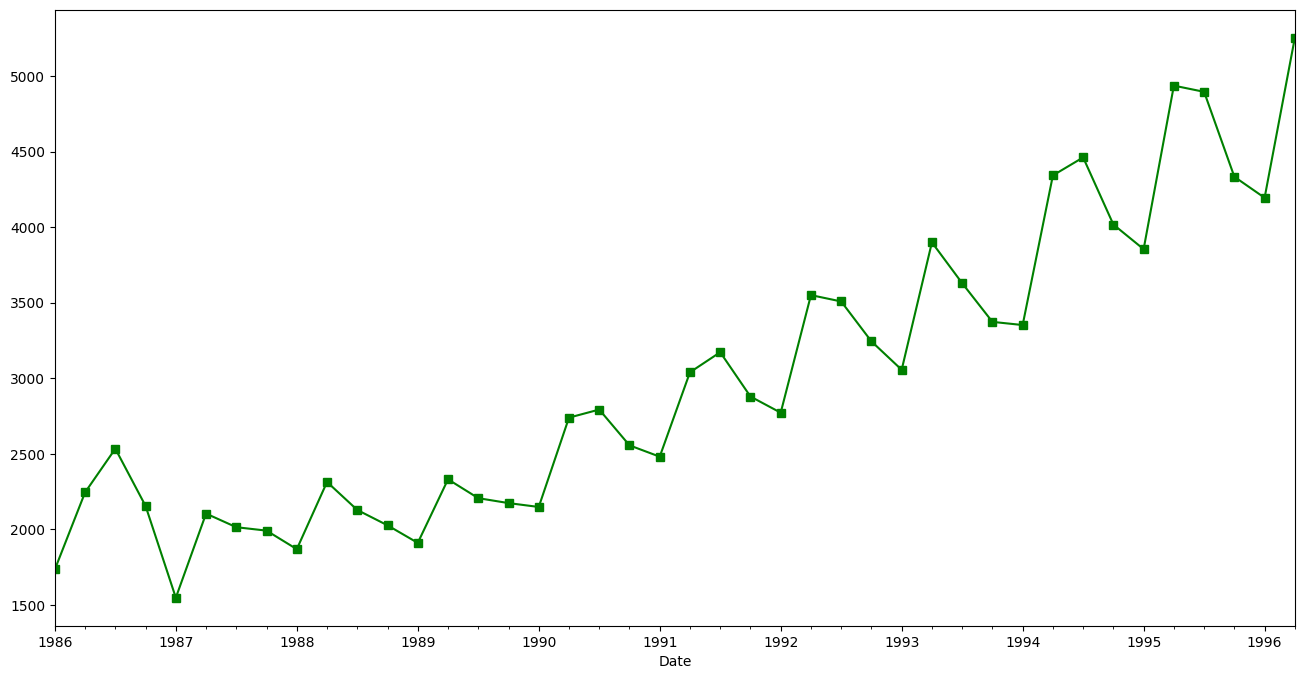

In [134]:
data1['Sales'].plot(figsize=(16,8),color='green',marker='s')
plt.show()

**Observation**

we can see that there is an increasing Trend,Both Trend and Variance are not constant

**Line Plot Using Quarters as Y axis and Sales as X axis**

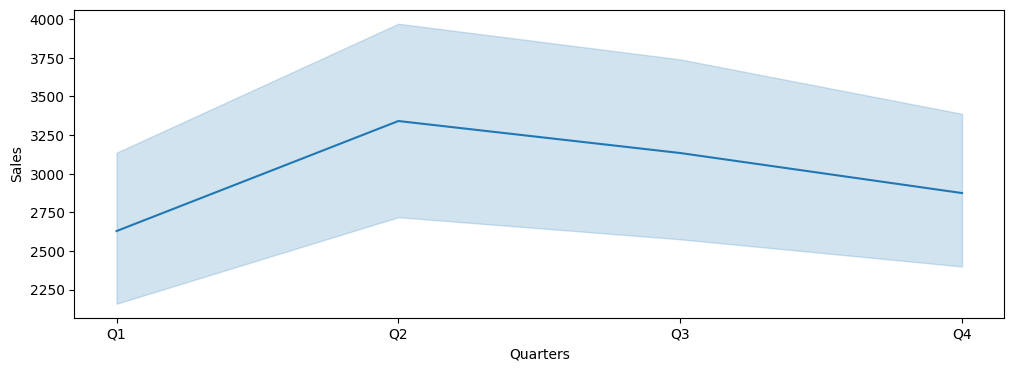

In [135]:
plt.figure(figsize=(12,4))
sns.lineplot(x="Quarters", y="Sales", data=data)
plt.show()

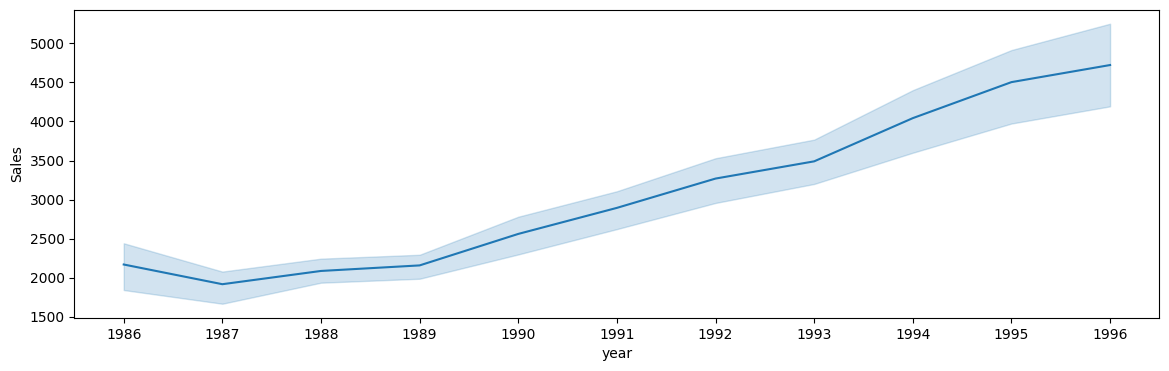

In [136]:
plt.figure(figsize=(14,4))
sns.lineplot(x="year",y="Sales",data=data)

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

**Box Plot of Each Year by Quaterly Intervals**

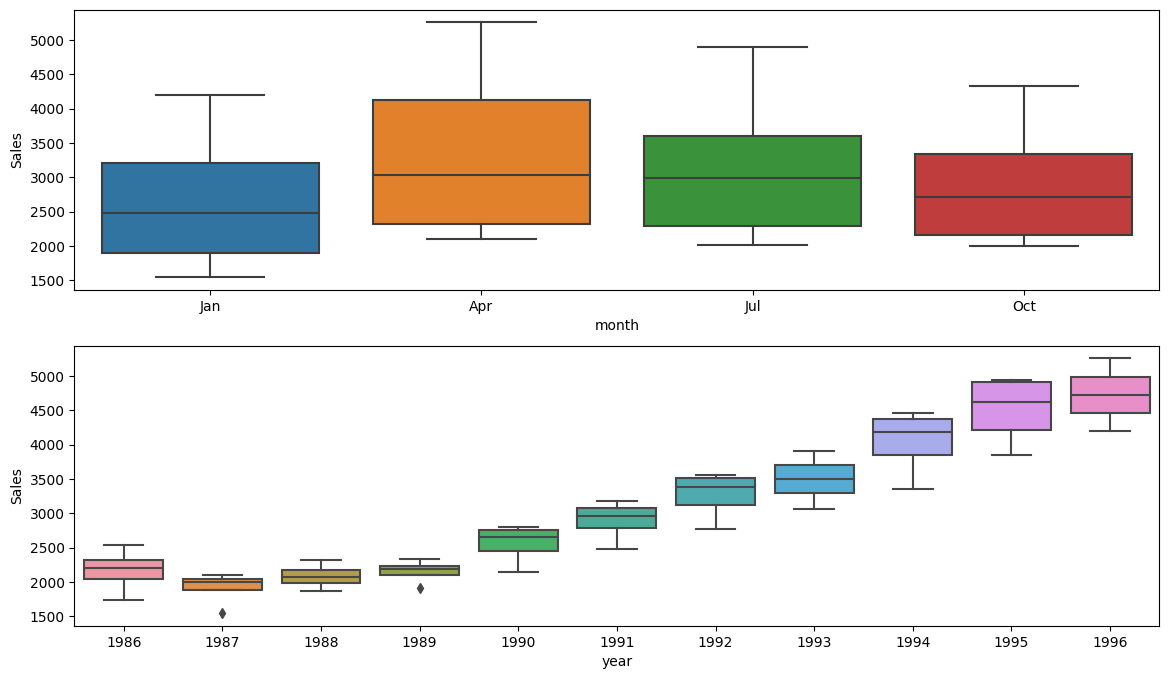

In [137]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=data)
plt.show()

**Histogram and Density Plots**

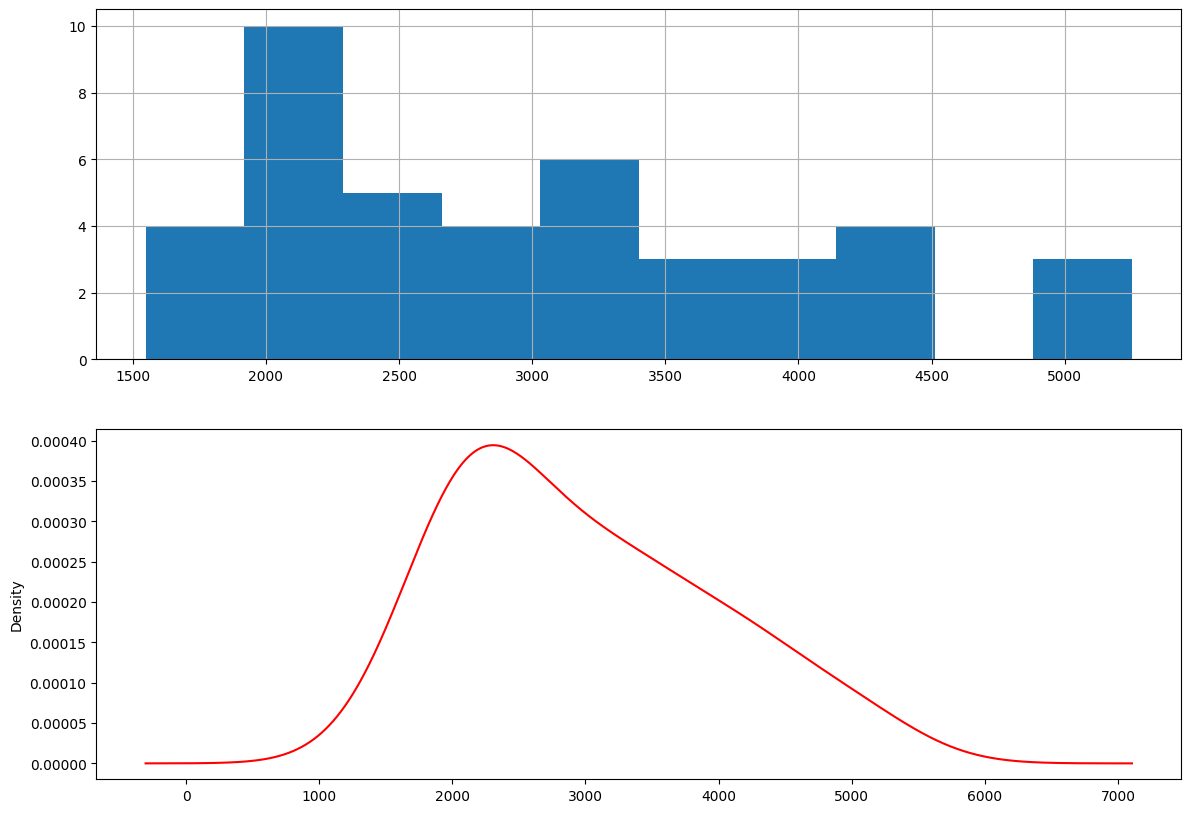

In [138]:
plt.figure(figsize=(14,10))
plt.subplot(211)
data.Sales.hist()
plt.subplot(212)
data.Sales.plot(kind='kde',color='red')
plt.show()

**Lag plot**

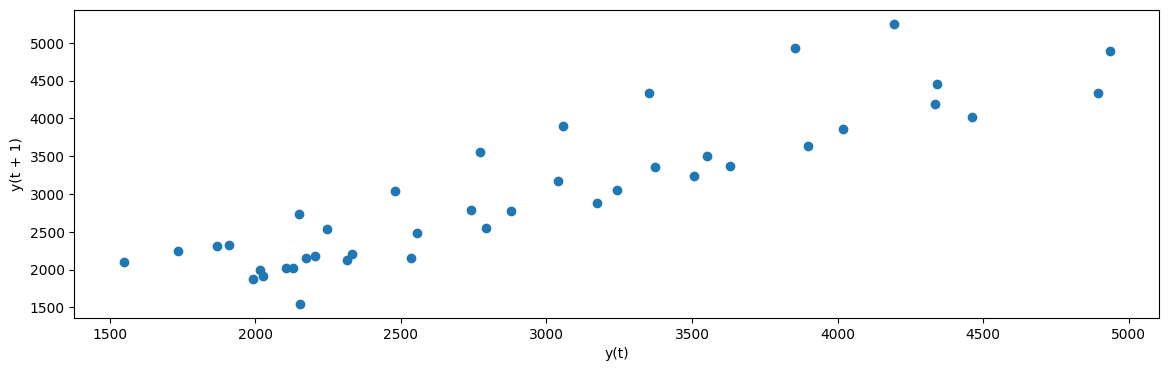

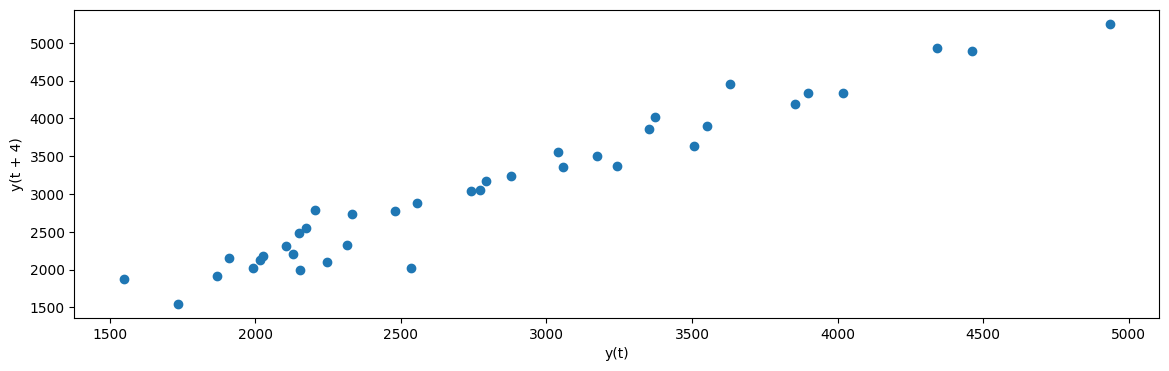

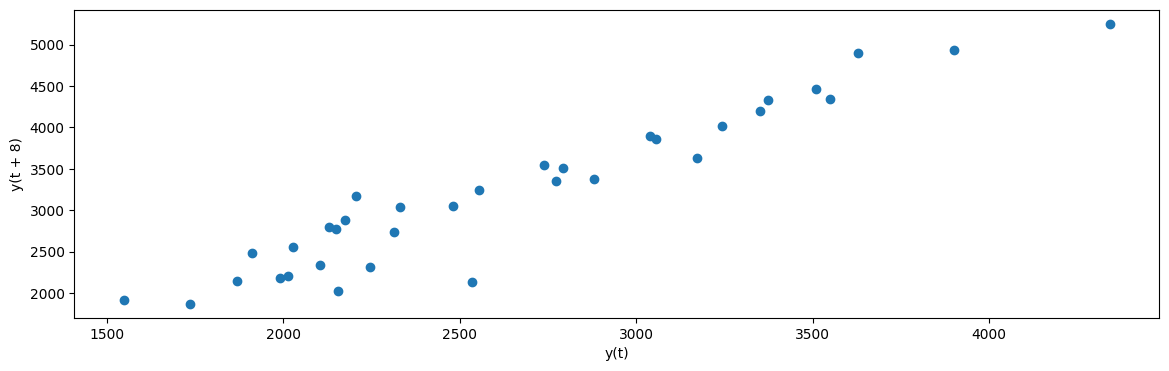

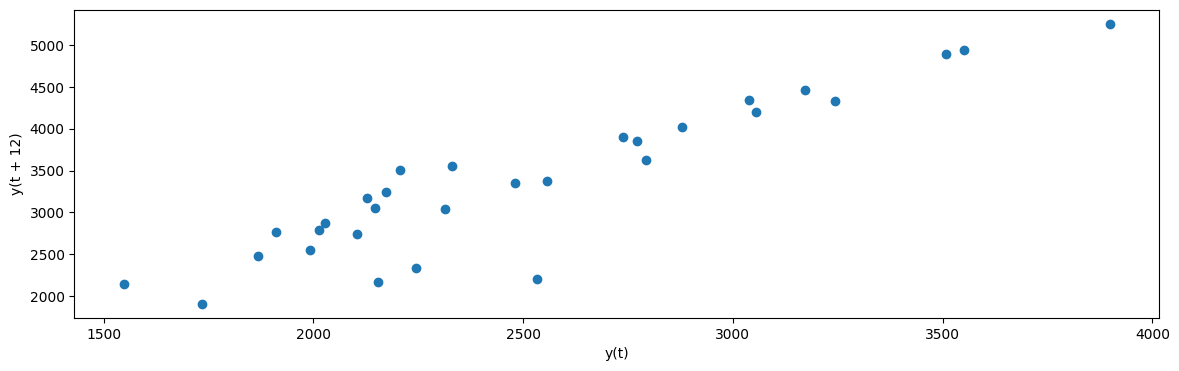

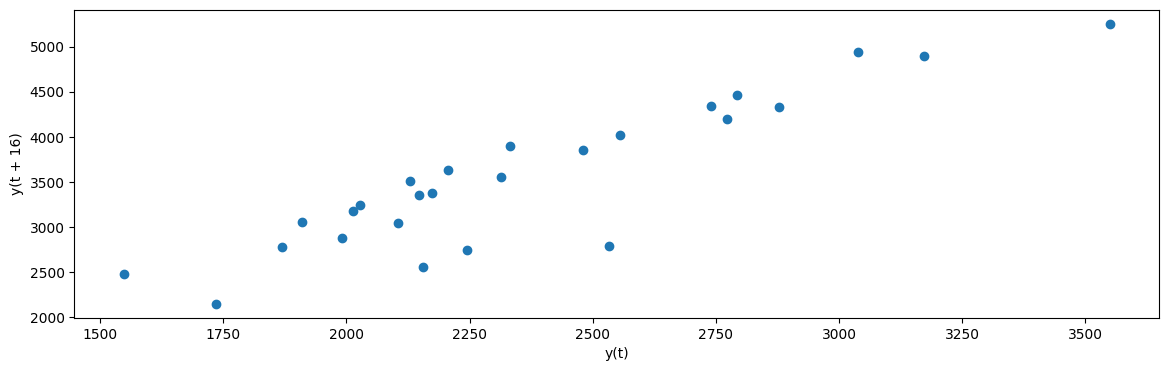

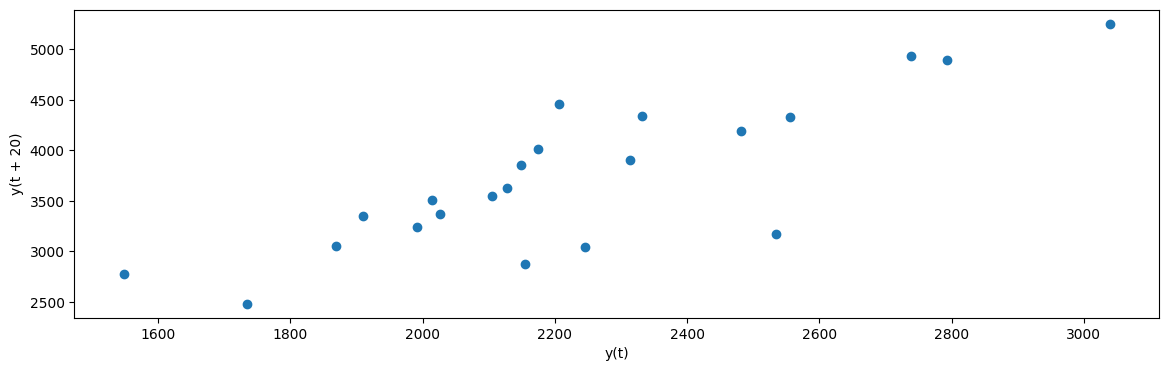

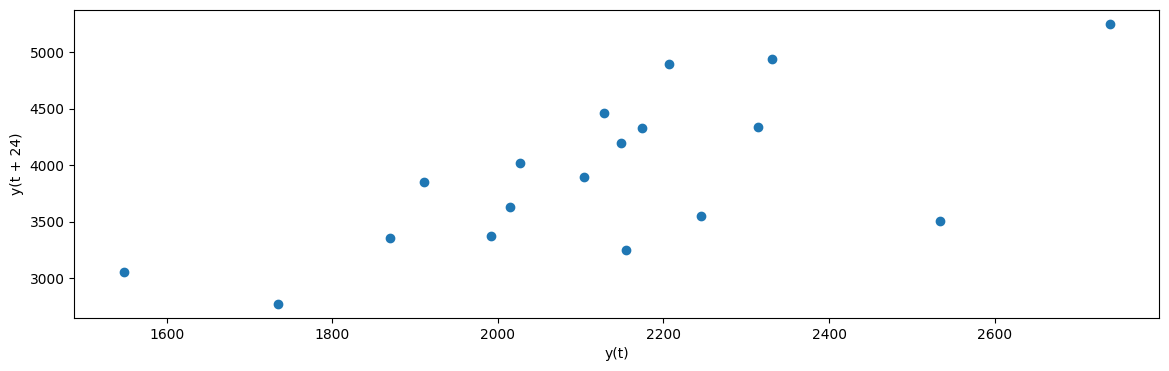

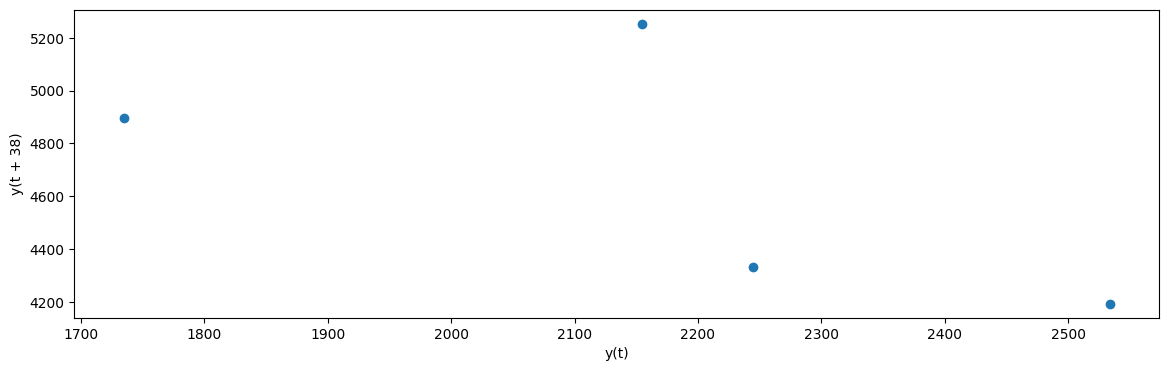

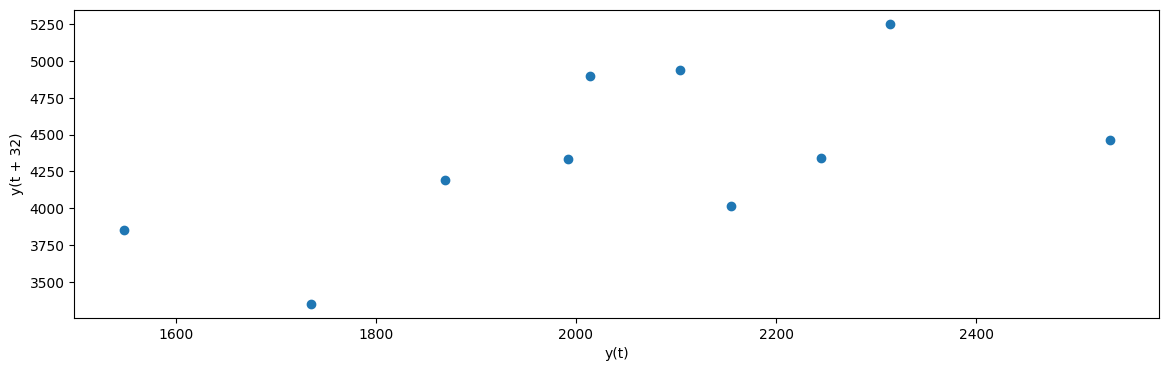

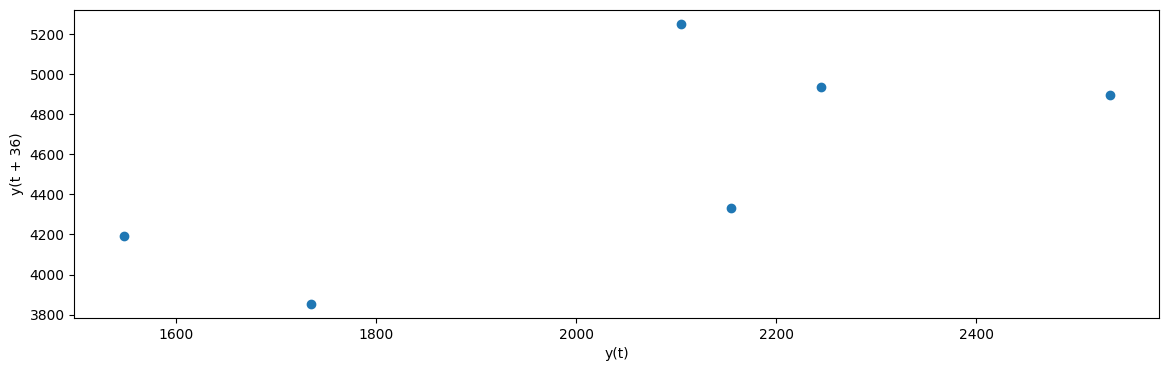

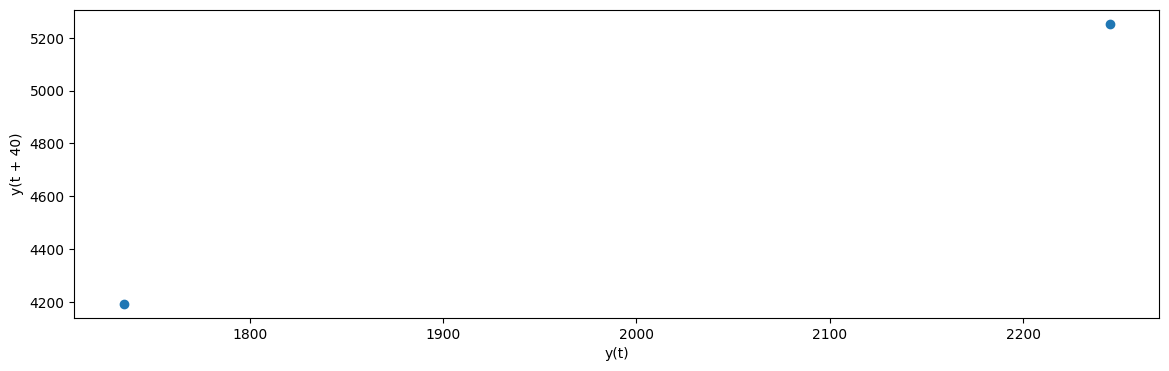

In [139]:
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    lag_plot(data.Sales, lag=i)
    plt.show()

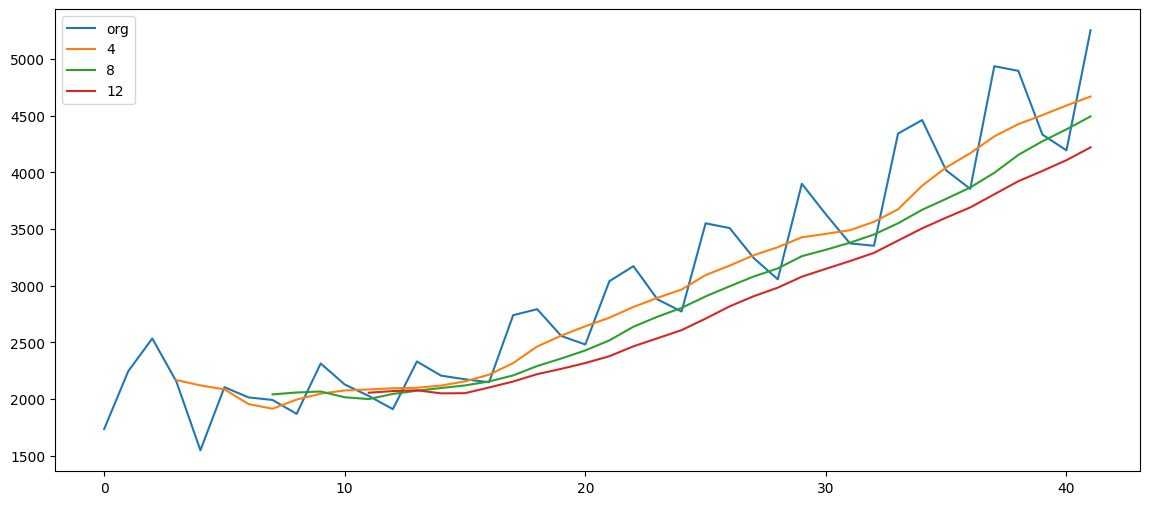

In [140]:
#Moving Average
plt.figure(figsize=(14,6))
data.Sales.plot(label="org")
for i in range(4,13,4):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

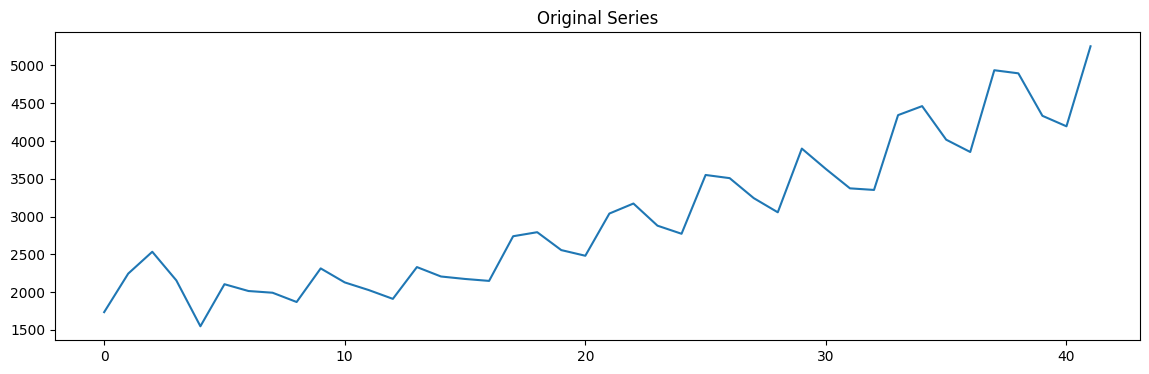

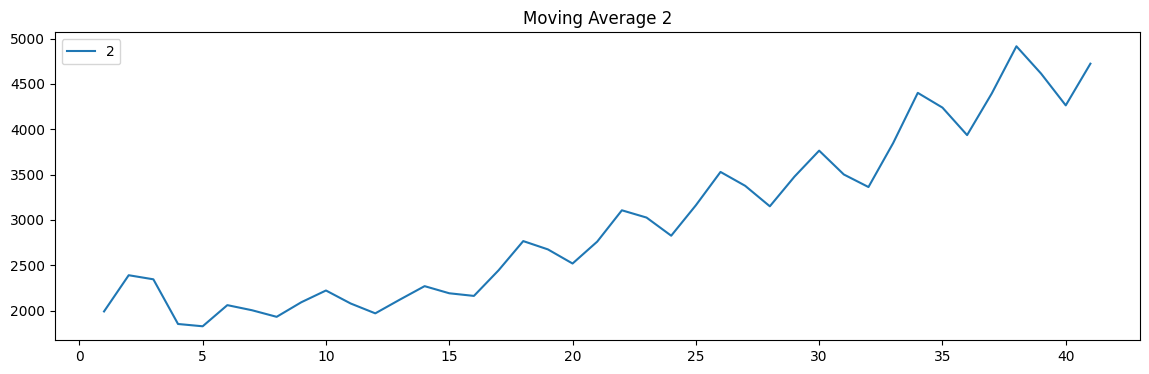

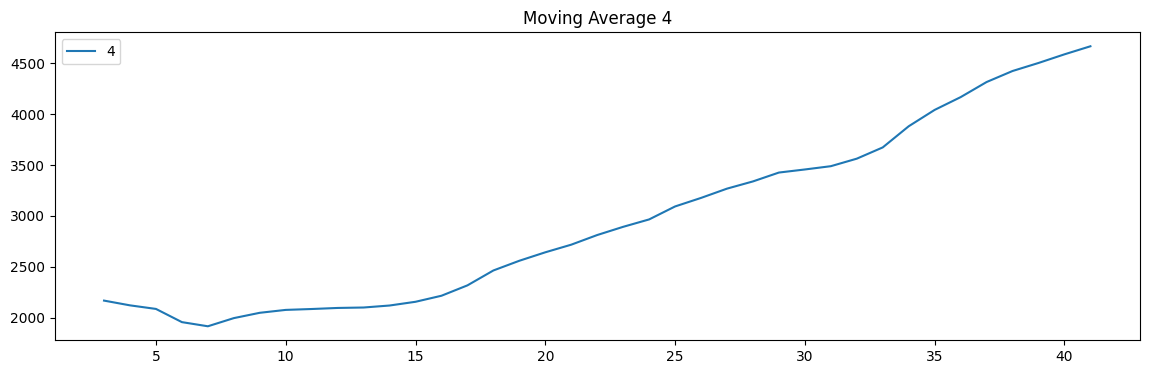

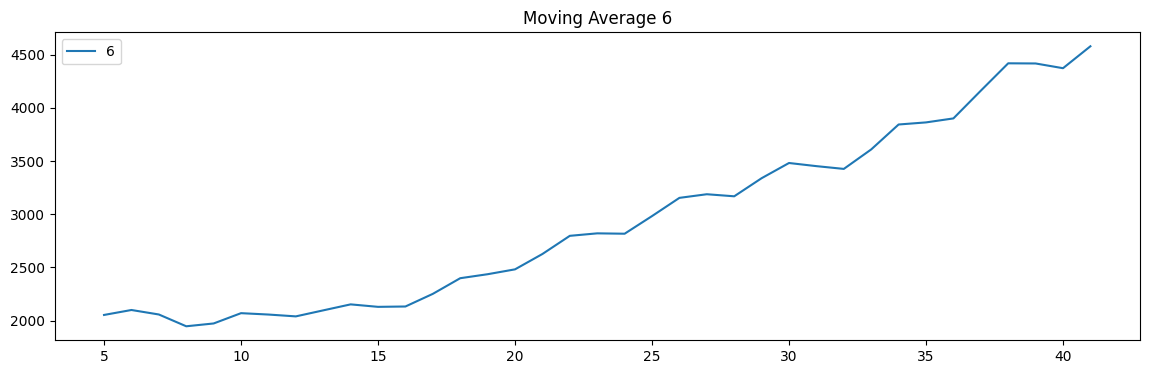

In [141]:
plt.figure(figsize=(14,4))
data.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,7,2):
    plt.figure(figsize=(14,4))
    data["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

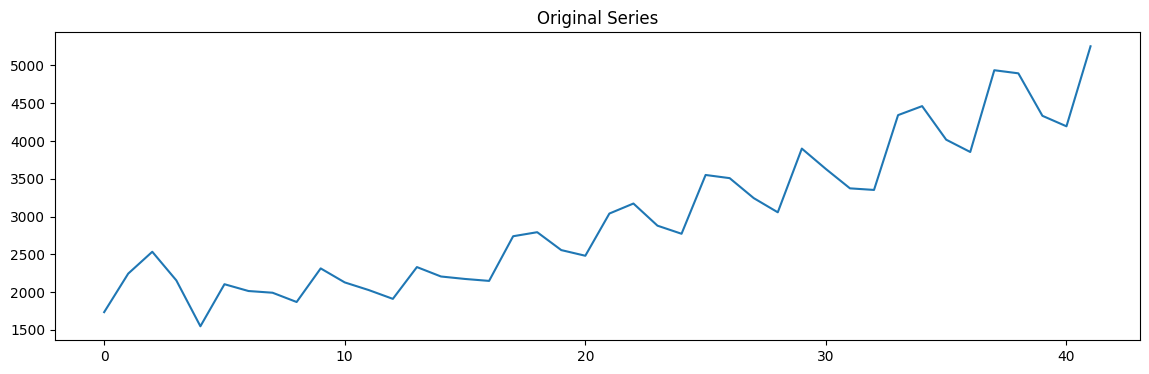

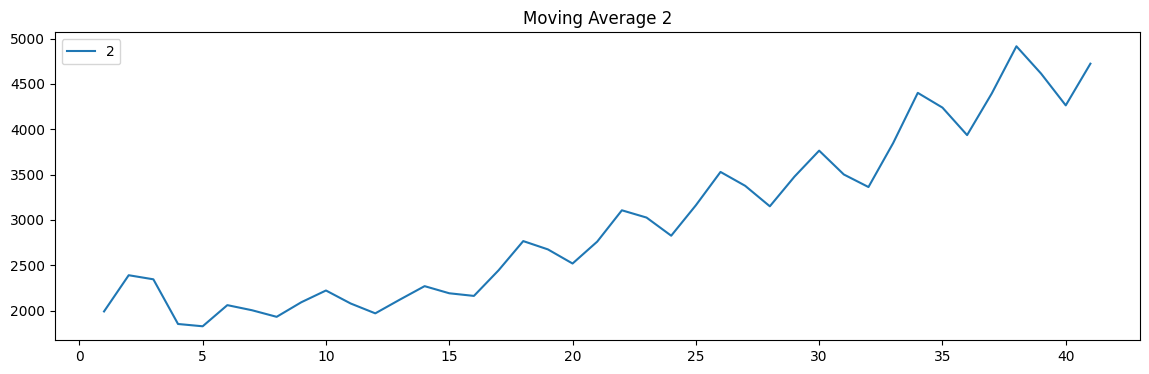

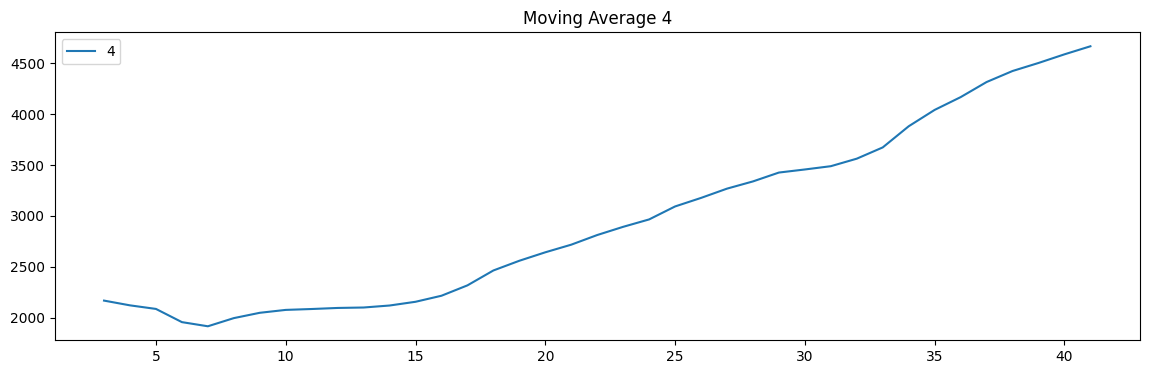

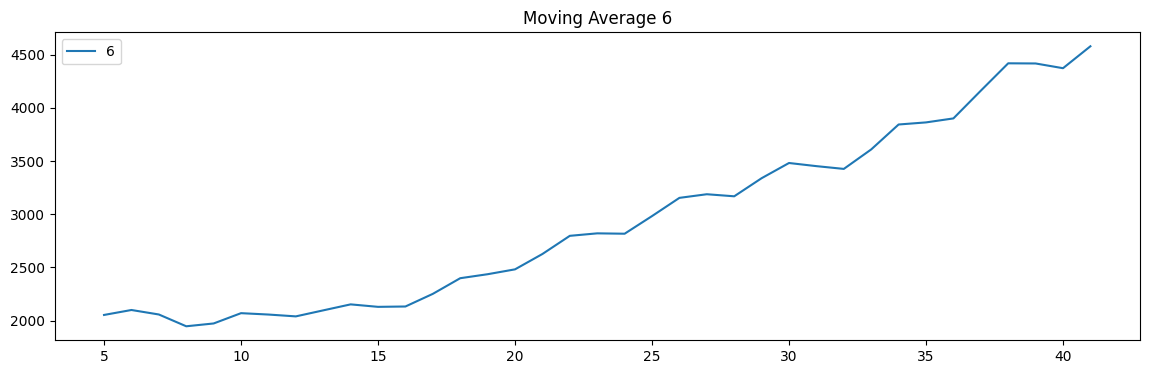

In [142]:
plt.figure(figsize=(14,4))
data.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,7,2):
    plt.figure(figsize=(14,4))
    data["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

**Time series decomposition plot**

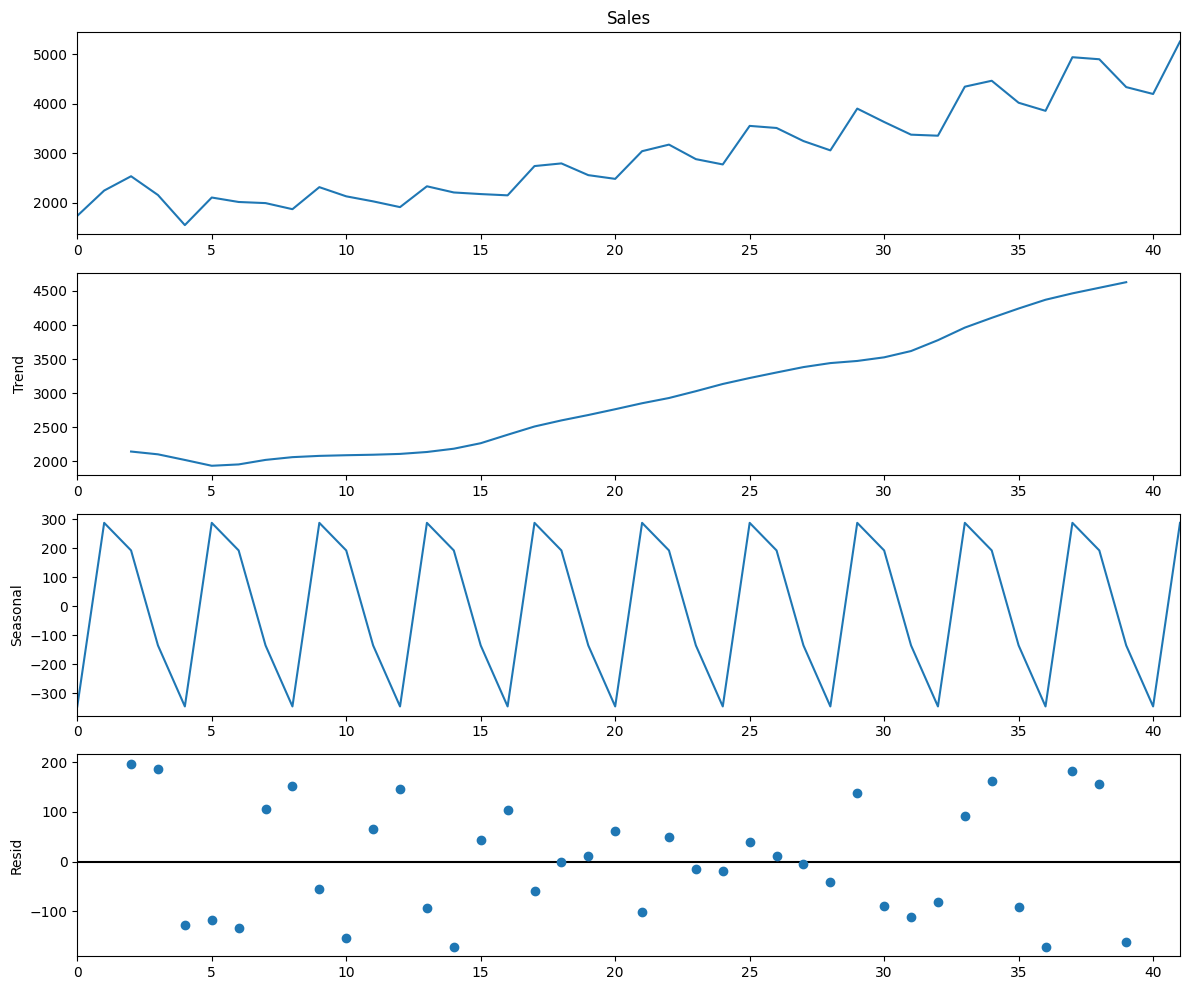

In [143]:
decompose_ts_add = seasonal_decompose(data.Sales,period=4)
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

**Autocorrelation Function (ACF)**

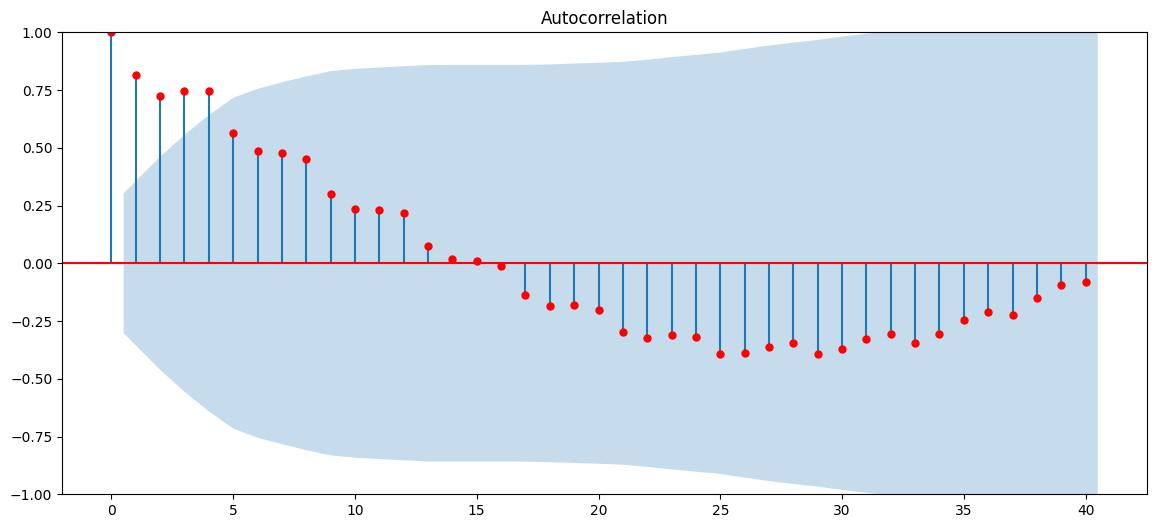

In [144]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_acf(data.Sales,lags=40,color='red')
    plt.show()

**Partial Autocorrelation Function (PACF)**

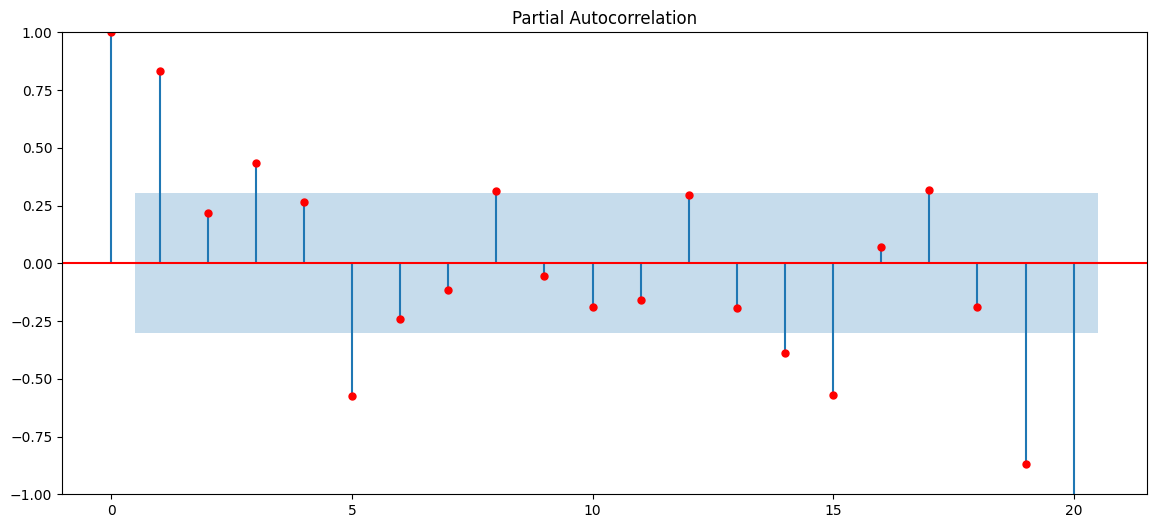

In [145]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_pacf(data.Sales,lags=20,color='red')
    plt.show()

Sampling

Linear interpolation

UpSampling with respect to month 

In [146]:
upsampled_month = data1.drop(['Quarters','Q1','Q2','Q3','Q4'], axis=1)
upsampled_month = upsampled_month.resample('M').mean()
print(upsampled_month.head(13))

                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997
1986-11-30          NaN
1986-12-31          NaN
1987-01-31  1547.818996


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997
1986-11-30  1952.581664
1986-12-31  1750.200330
1987-01-31  1547.818996


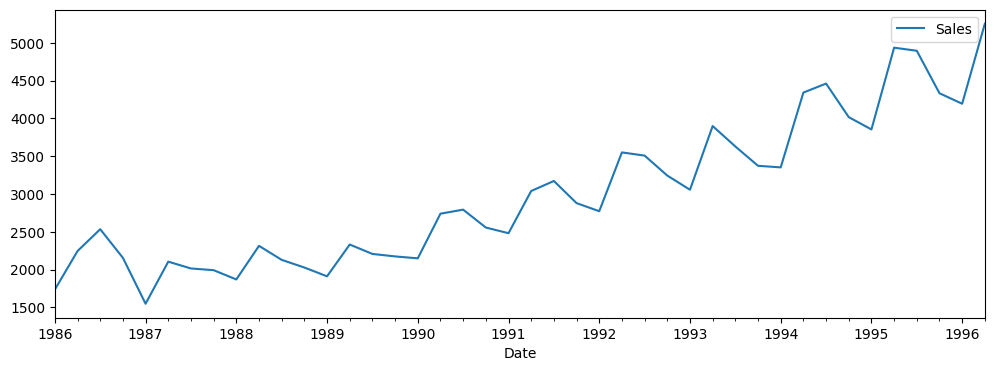

In [147]:
interpolated_month = upsampled_month.interpolate(method='linear')
print(interpolated_month.head(13))
interpolated_month.plot(figsize=(12,4))
plt.show()

In [148]:
interpolated_month

Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
...                 ...
1995-12-31  4240.333333
1996-01-31  4194.000000
1996-02-29  4547.000000
1996-03-31  4900.000000
1996-04-30  5253.000000

[124 rows x 1 columns]

In [149]:
visual = interpolated_month.copy()
visual.reset_index(inplace=True)
visual['date'] = pd.to_datetime(visual['Date'])
visual['year'] = visual['Date'].dt.year
visual['month'] = visual['Date'].dt.month
visual['week'] = visual['Date'].dt.isocalendar().week
visual['quarter'] = visual['Date'].dt.quarter
visual['day_of_week'] = visual['Date'].dt.day_name()
visual.drop('Date', axis =1 , inplace= True)
visual[:2]

Sales       date  year  month  week  quarter day_of_week
0  1734.827000 1986-01-31  1986      1     5        1      Friday
1  1904.871666 1986-02-28  1986      2     9        1      Friday

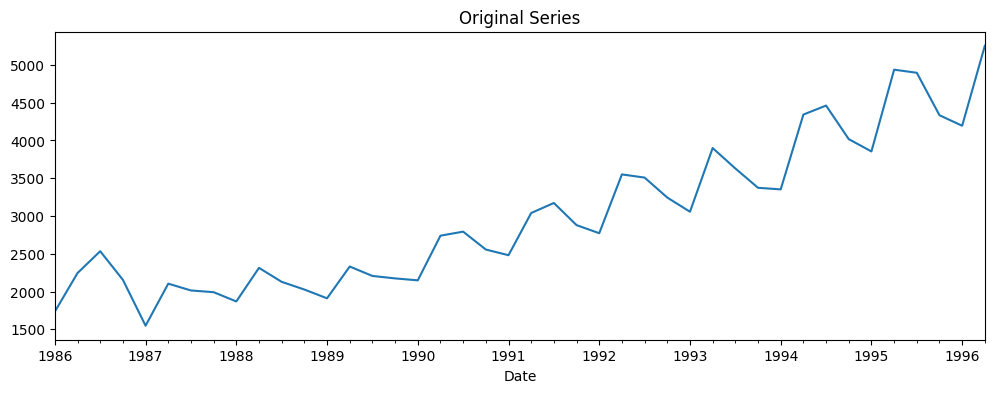

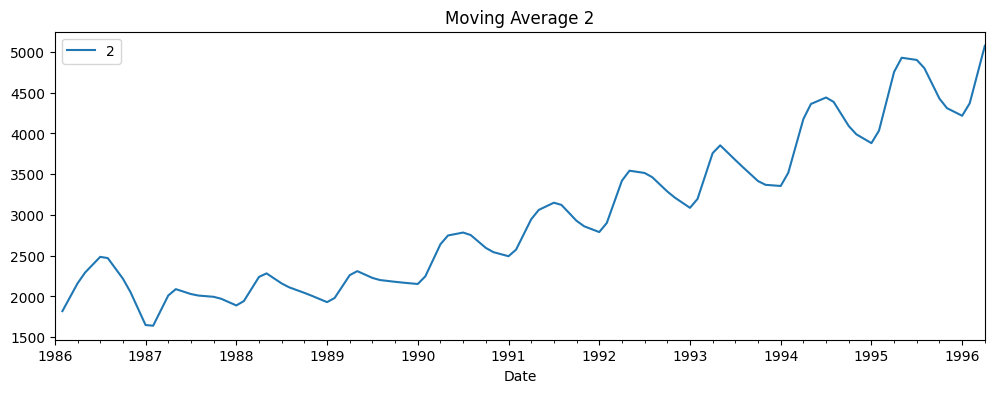

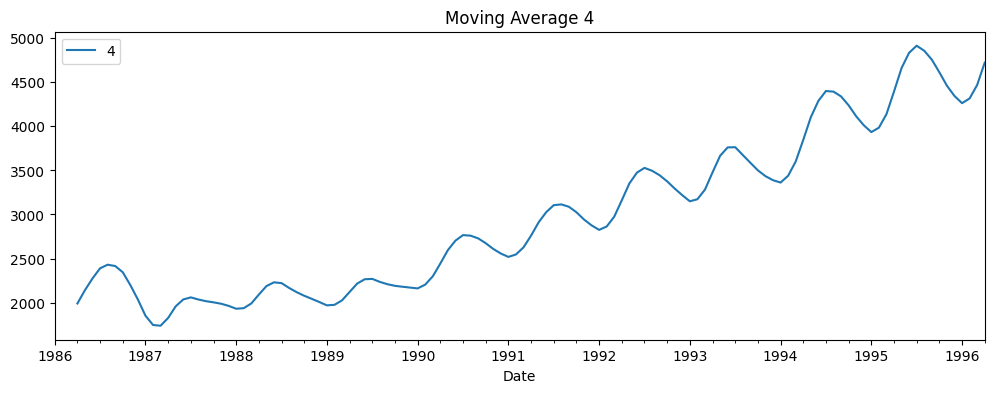

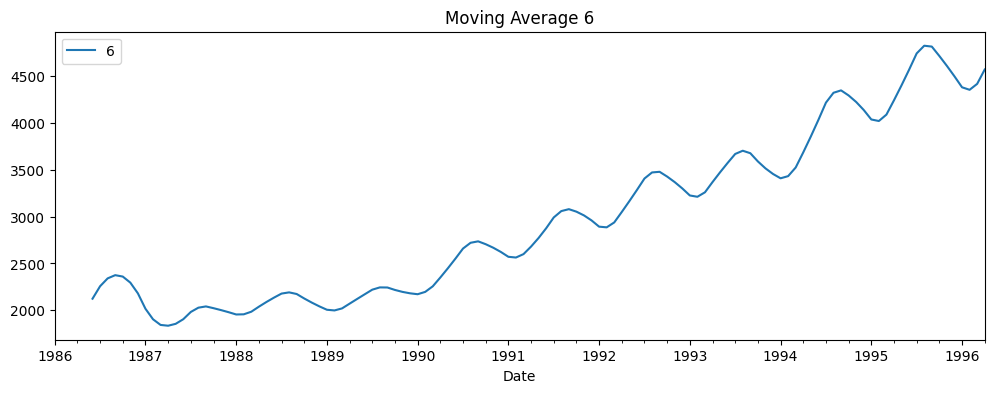

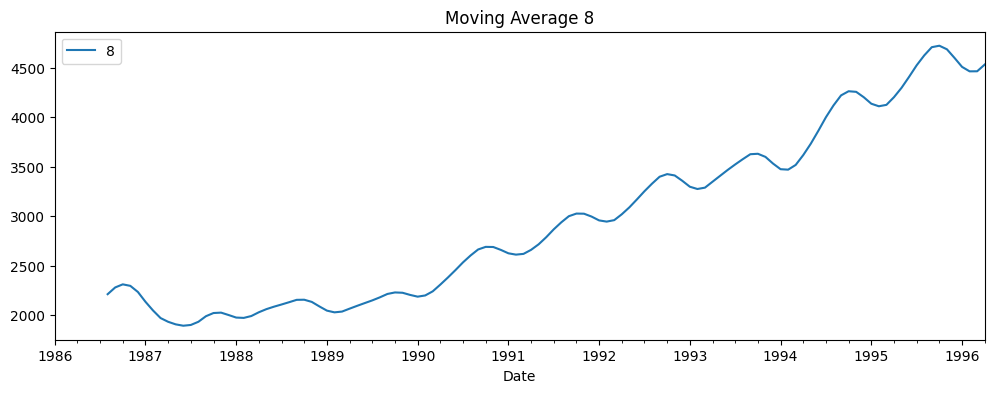

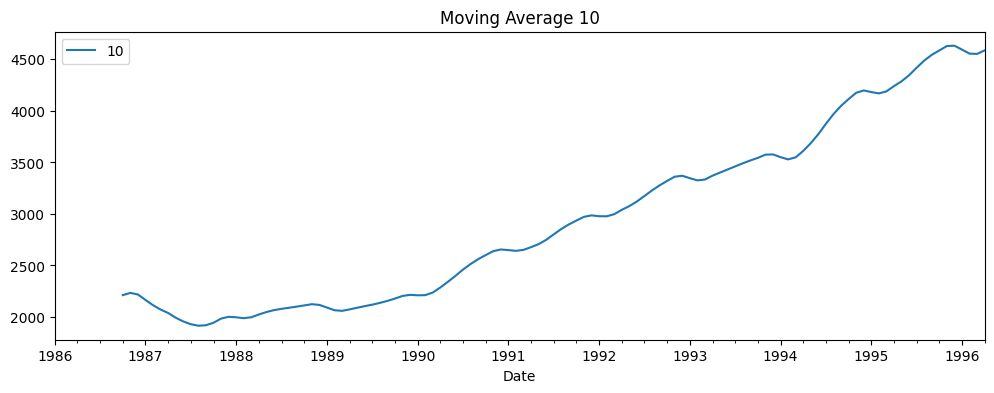

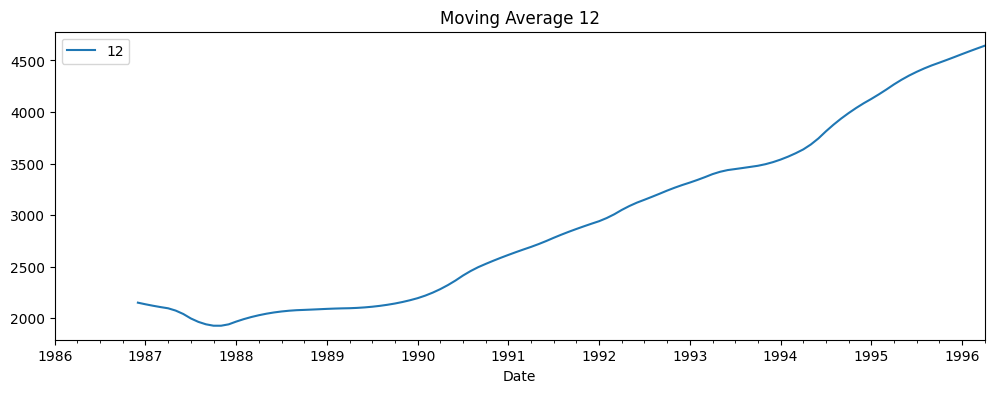

In [150]:
plt.figure(figsize=(12,4))
interpolated_month.Sales.plot(label="org")
plt.title("Original Series")
for i in range(2,13,2):
    plt.figure(figsize=(12,4))
    interpolated_month["Sales"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

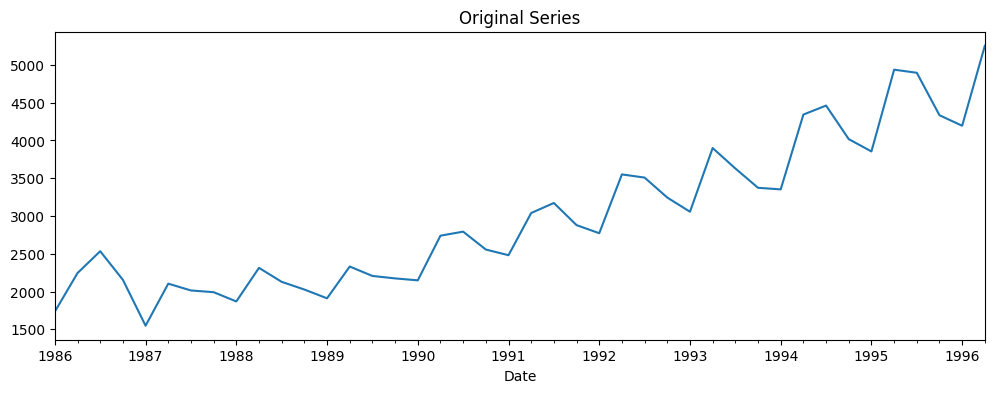

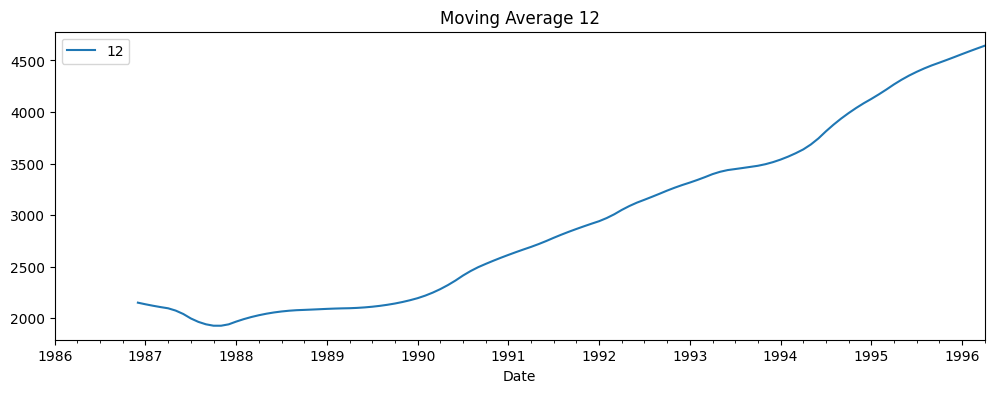

In [151]:
plt.figure(figsize=(12,4))
interpolated_month.Sales.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(12,4))
interpolated_month["Sales"].rolling(12).mean().plot(label=str(12))
plt.title("Moving Average "+str(12))
plt.legend(loc='best')
plt.show()

Time Series Decomposition

1. Seasonality

2. Trend

**Additive Seasonal Decomposition**

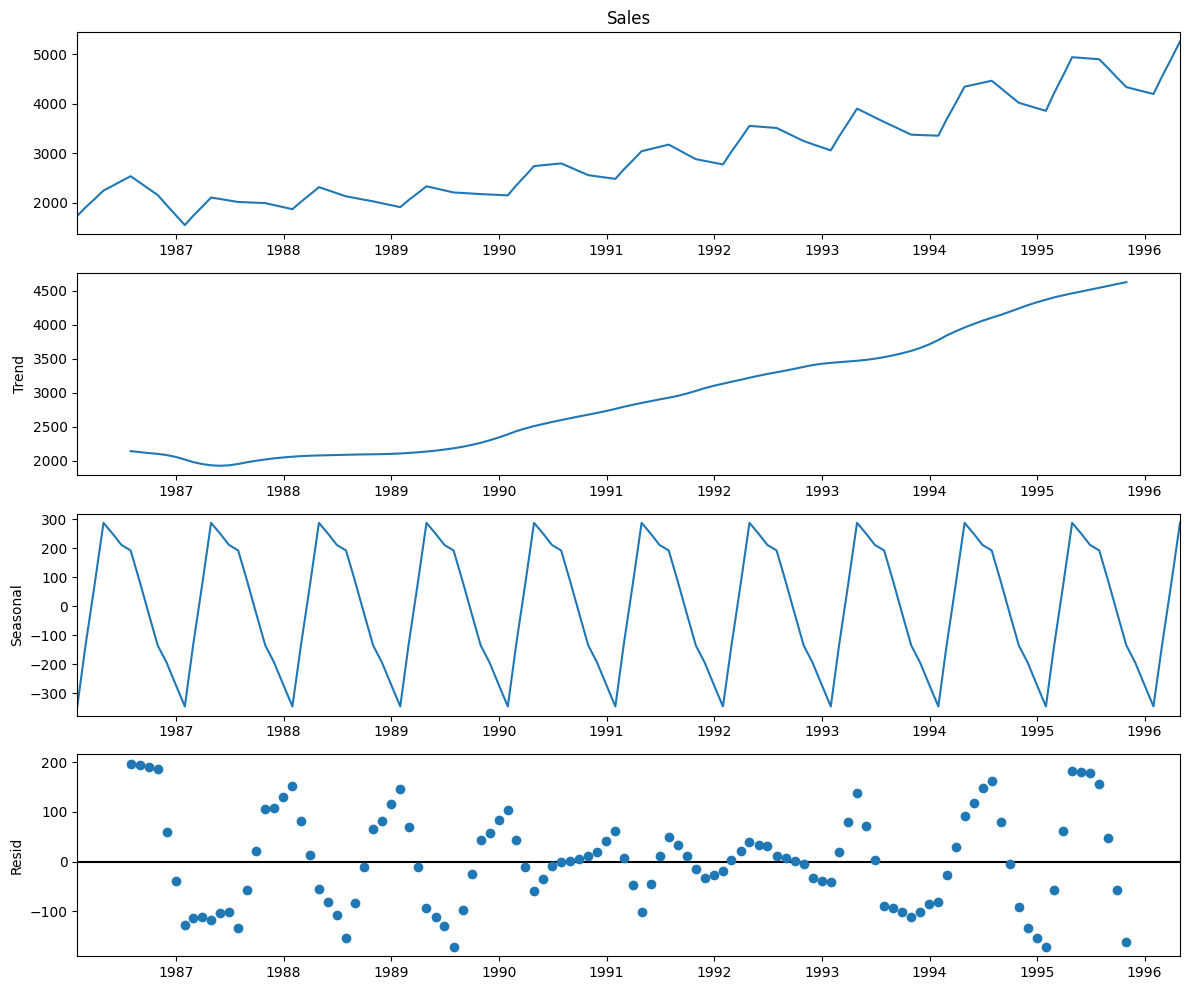

In [152]:
decompose_ts_add = seasonal_decompose(interpolated_month.Sales, period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

**Multiplicative Seasonal Decomposition**

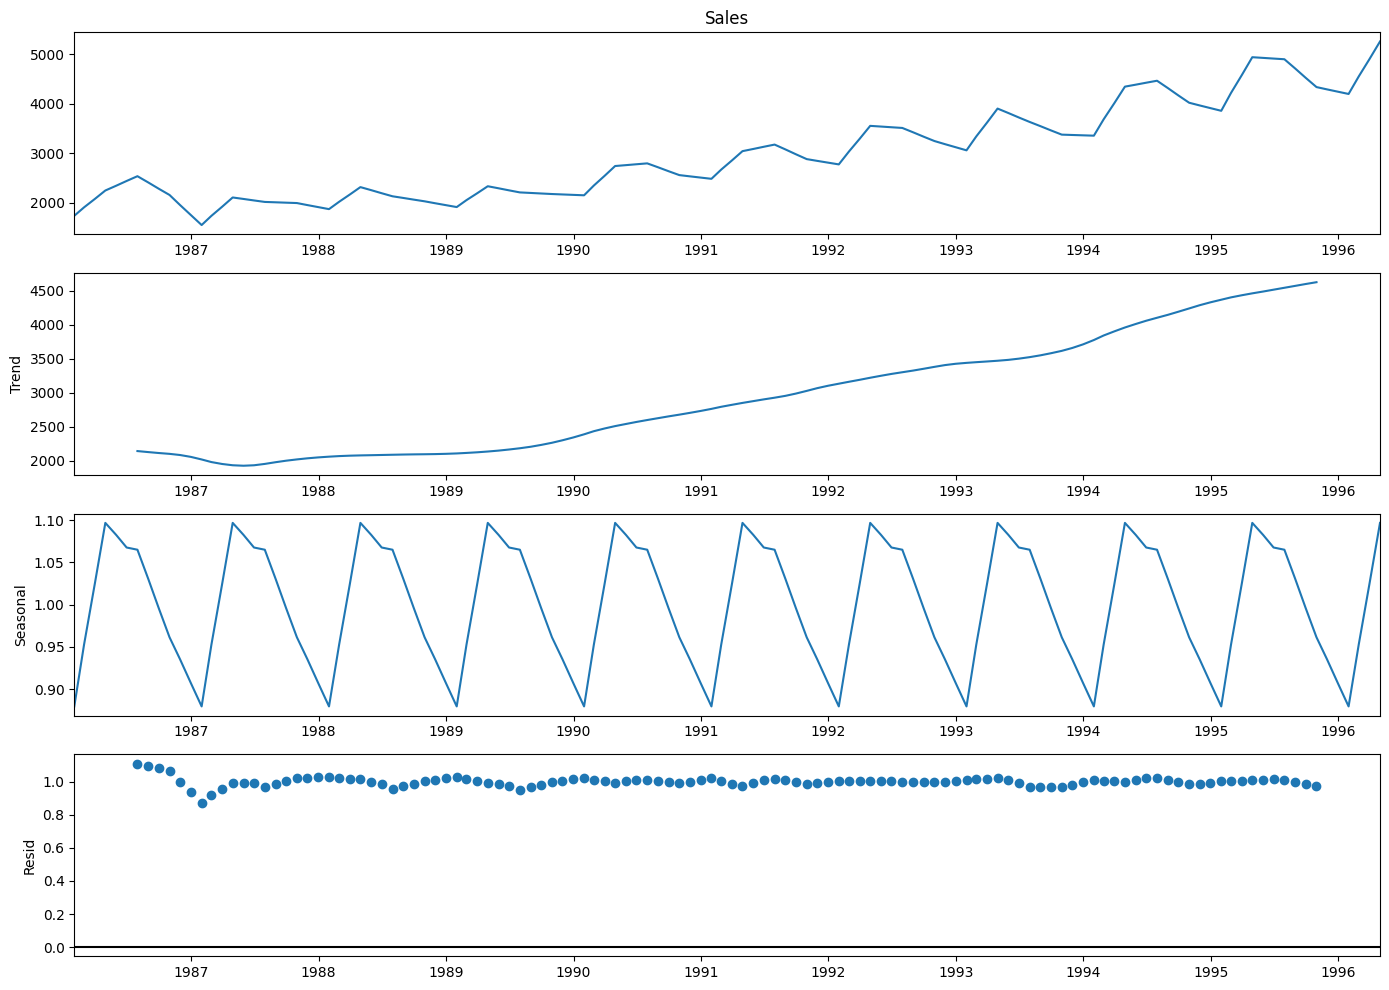

In [153]:
decompose_ts_add = seasonal_decompose(interpolated_month.Sales, period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

**Splitting Train and Test Data**

In [154]:
train_data = interpolated_month[:100]
test_data = interpolated_month[100:]

In [155]:
print('Train :',train_data.index.min(),train_data.index.max(),'\n',
'Test :',test_data.index.min(),test_data.index.max())

Train : 1986-01-31 00:00:00 1994-04-30 00:00:00 
 Test : 1994-05-31 00:00:00 1996-04-30 00:00:00


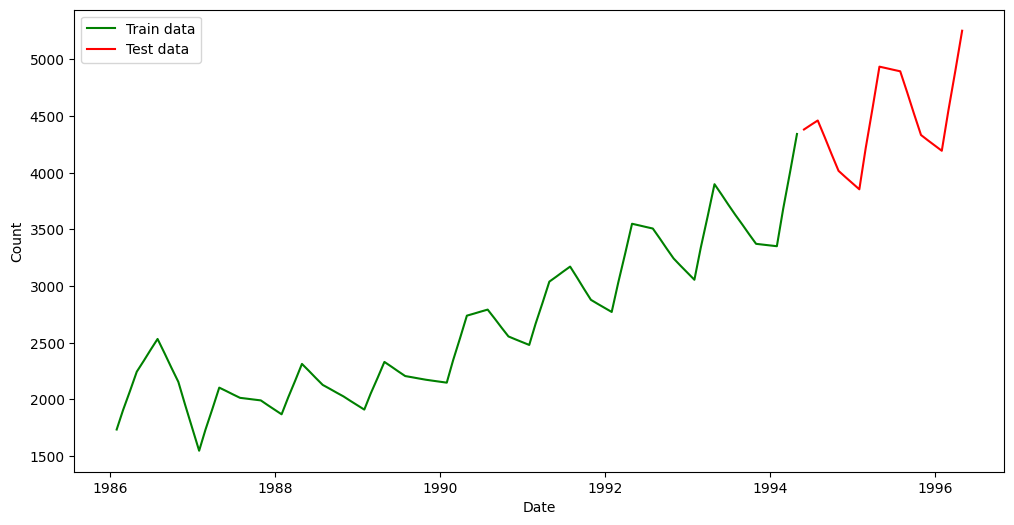

In [156]:
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()
plt.show()

In [157]:
#Evaluation Metric MAPE
def MAPE(pred,org):
  temp=np.abs((pred-org)/org)*100
  return np.mean(temp)

Exponential Methods

Simple Exponential Method

Using Forecast Attribute

In [158]:
ses_model = SimpleExpSmoothing(train_data['Sales']).fit(optimized=True)
test_pred_ses = ses_model.forecast(24)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.Sales))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.Sales)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 6.6197194272254025 
 Train Root Mean Squared Error = 129.3795259055601 
 Test Root Mean Squared Error  = 381.95422355078995


Using Predict Attribute

In [159]:
ses_model = SimpleExpSmoothing(train_data['Sales']).fit(optimized=True)
test_pred_ses = ses_model.predict(start = test_data.index[0],end = test_data.index[-1])
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.Sales))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.Sales)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 6.6197194272254025 
 Train Root Mean Squared Error = 129.3795259055601 
 Test Root Mean Squared Error  = 381.95422355078995


Difference between Predict and Forecast attribute

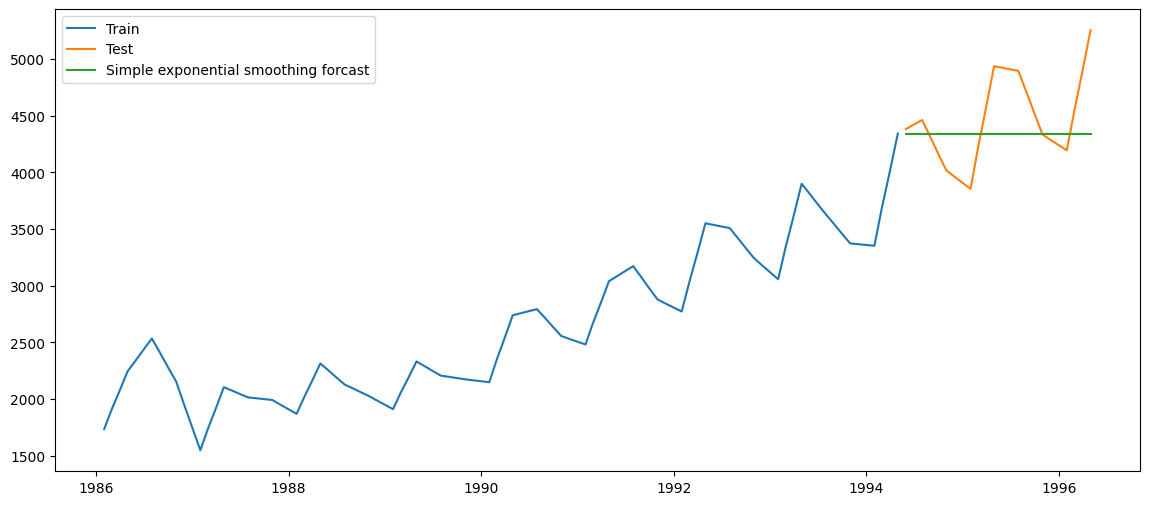

In [160]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

**Holt method**

Captures both Level and Trend

In [161]:
dexp_model  = Holt(train_data).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(24)
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test_data.Sales))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train_data))
mape_dexp = MAPE(test_pred_dexp,test_data.Sales)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_dexp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_dexp))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 89.49462512277057 
 Train Root Mean Squared Error = 106.0491827859655 
 Test Root Mean Squared Error  = 4549.907950839355


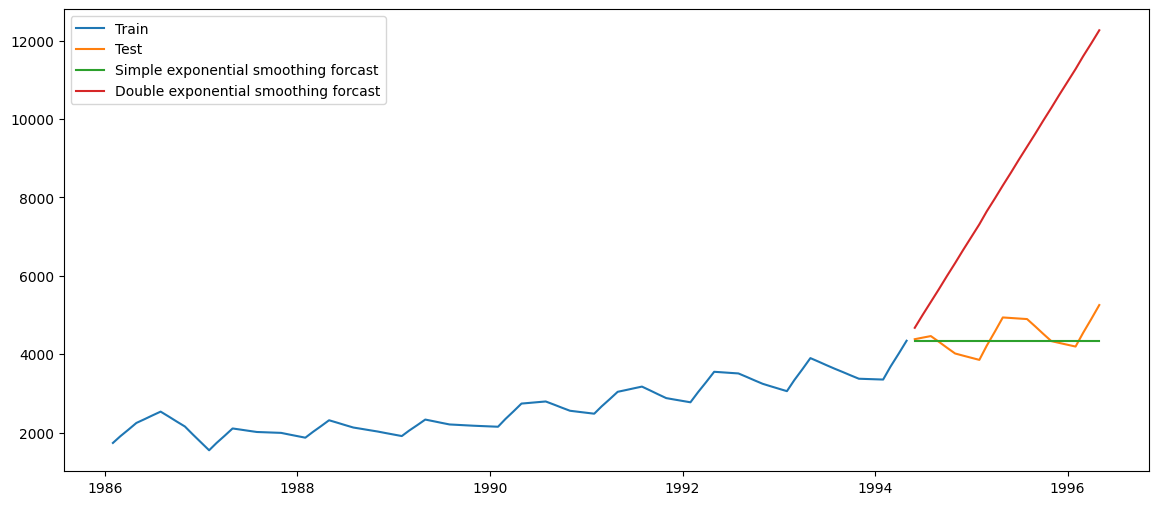

In [162]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)

Captures Level, Trend and Seasonality.

In [163]:
texp_add_model  = ExponentialSmoothing(train_data,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad_texp = texp_add_model.forecast(24)
train_pred_ad_texp = texp_add_model.fittedvalues
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp,test_data.Sales))
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp,train_data))
mape_ad_texp = MAPE(test_pred_ad_texp,test_data.Sales)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_texp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ad_texp))

Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error   = 35.69571274324909 
 Train Root Mean Squared Error = 44.2653652251861 
 Test Root Mean Squared Error  = 1828.4767720554398


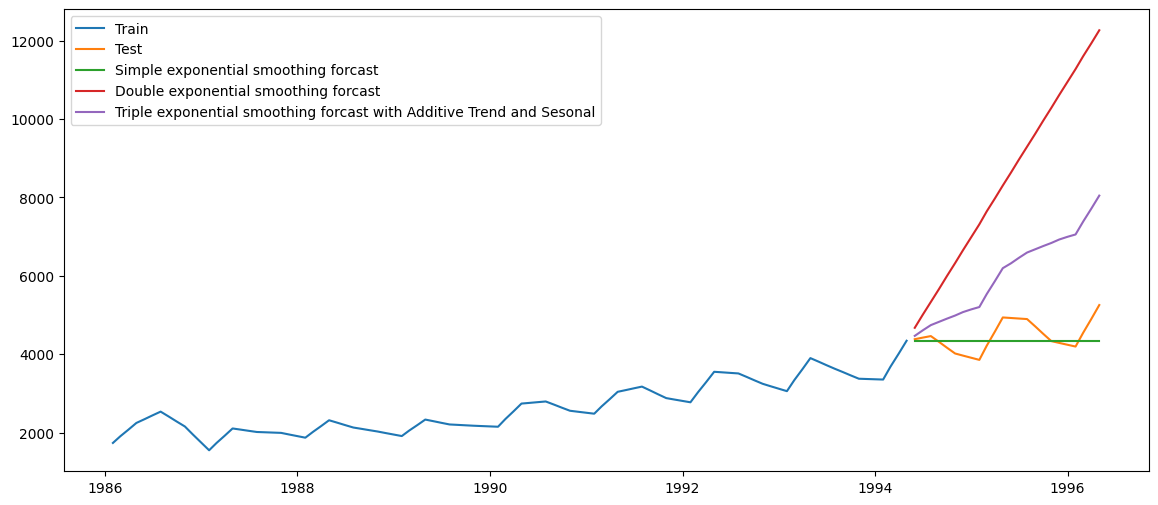

In [164]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

**Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)**

In [165]:
texp_mul_ad_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(24)
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,test_data.Sales))
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,train_data))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,test_data.Sales)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mul_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_texp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mul_ad_texp))

Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error   = 1.487268775553493 
 Train Root Mean Squared Error = 50.223974444654 
 Test Root Mean Squared Error  = 78.73325826552858


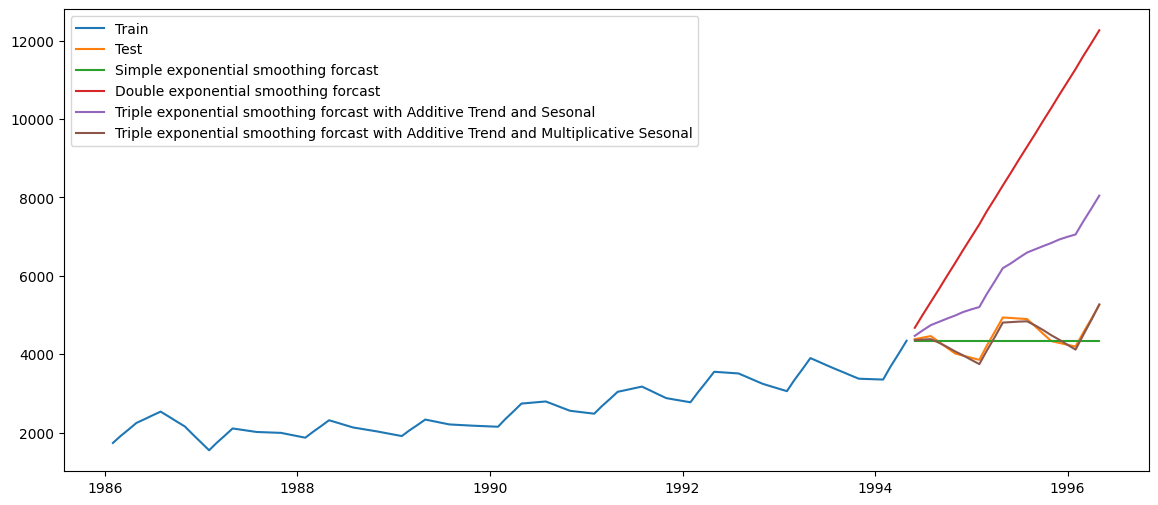

In [166]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()

**Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)**

In [169]:
texp_ad_mul_model  = ExponentialSmoothing(train_data,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(24)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_data.Sales))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_data))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_data.Sales)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error   = 5.168784154878948 
 Train Root Mean Squared Error = 165.78104360617877 
 Test Root Mean Squared Error  = 270.08479145849486


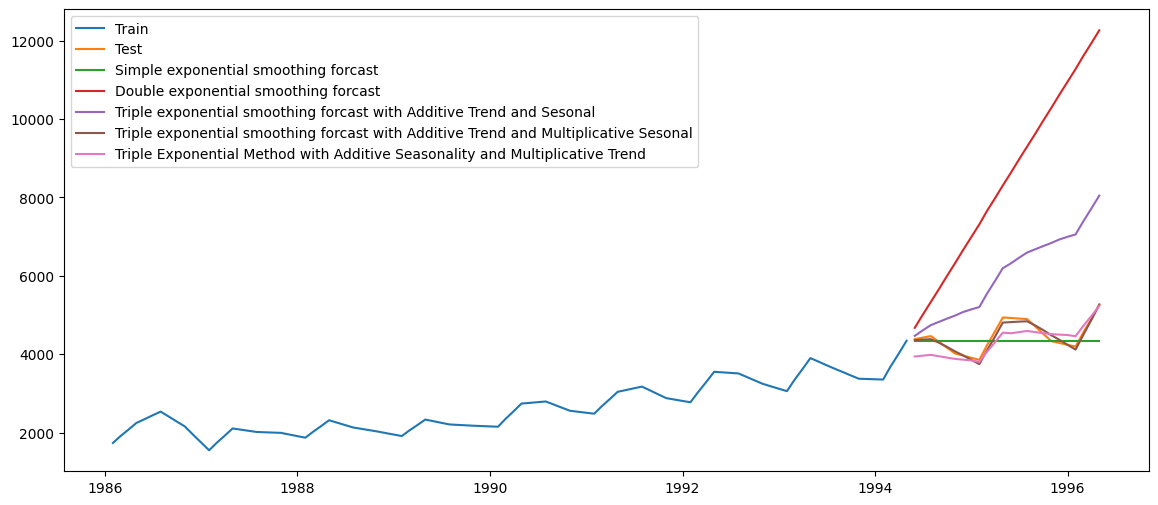

In [170]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()

**Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)**

In [171]:
texp_mul_model  = ExponentialSmoothing(train_data,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(24)
train_pred_mul_texp  = texp_mul_model.fittedvalues
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test_data.Sales))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train_data))
mape_mul_texp  = MAPE(test_pred_mul_texp,test_data.Sales)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_mul_texp ))

Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error   = 1.8078233252851952 
 Train Root Mean Squared Error = 49.43910507382248 
 Test Root Mean Squared Error  = 101.65134880354205


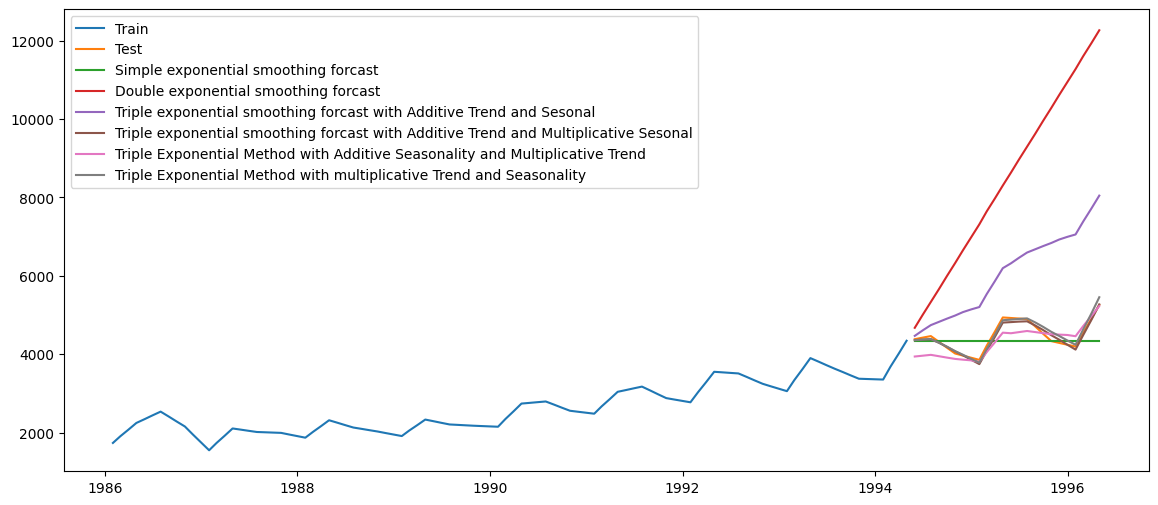

In [172]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_texp, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

**Comparing the results**

In [173]:
Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_Add","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Mul"]),
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_dexp,train_rmse_ad_texp,train_rmse_mul_ad_texp,train_rmse_ad_mul_texp,train_rmse_mul_texp]),
        "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp]),
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

Models  Train_RMSE  Test_MAPE(%)  Test_RMSE_Values
0  Triple_Exp_Mul_Add   50.223974      1.487269         78.733258
1      Triple_Exp_Mul   49.439105      1.807823        101.651349
2  Triple_Exp_Add_Mul  165.781044      5.168784        270.084791
3          Simple_Exp  129.379526      6.619719        381.954224
4      Triple_Exp_Add   44.265365     35.695713       1828.476772
5          Double_Exp  106.049183     89.494625       4549.907951

**Visualizing Models Performance**

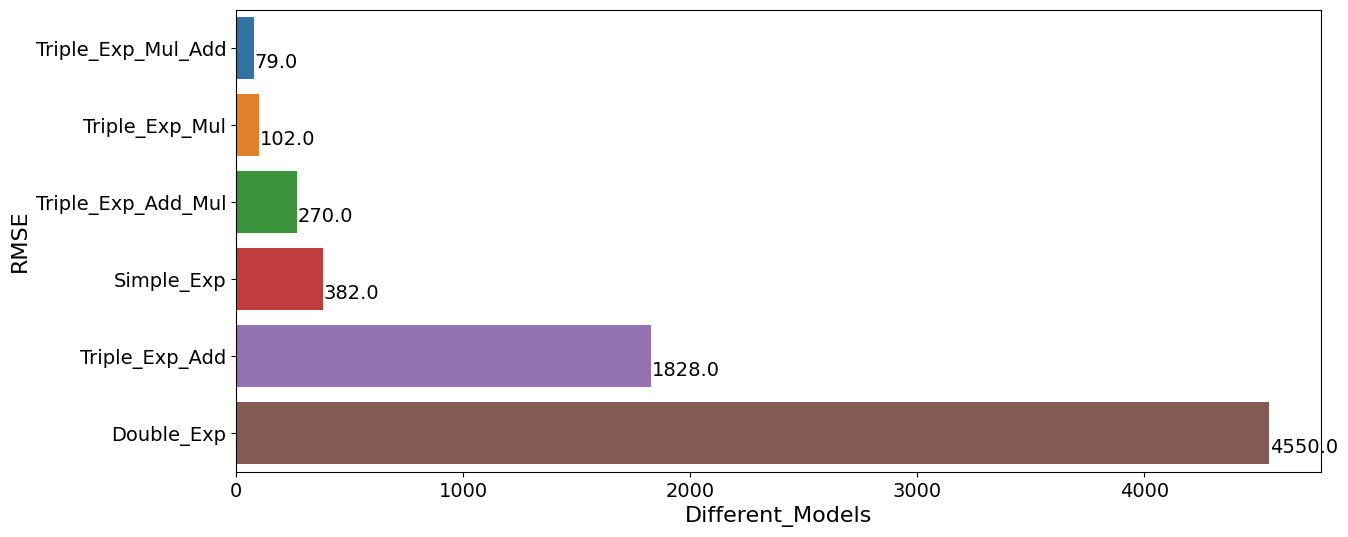

In [174]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='Test_RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 14)
plt.show()

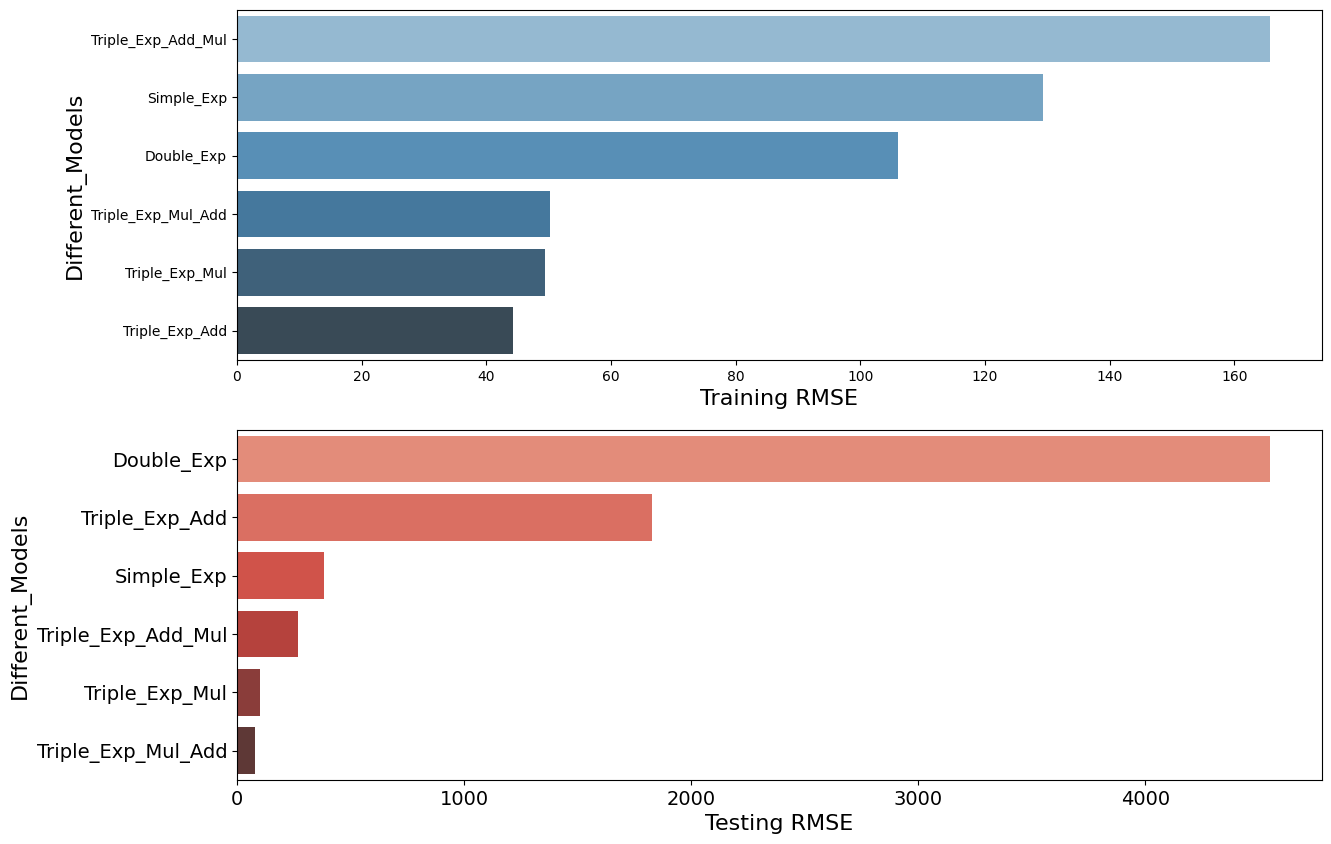

In [175]:
f, axes = plt.subplots(2,1, figsize=(14,10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

train_rmse = table_evaluation.sort_values(by=['Train_RMSE'], ascending=False)

sns.barplot(x='Train_RMSE', y='Models', data = train_rmse, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training RMSE', size=16)
axes[0].set_ylabel('Different_Models', size=16)

test_rmse = table_evaluation.sort_values(by=['Test_RMSE_Values'], ascending=False)

sns.barplot(x='Test_RMSE_Values', y='Models', data = test_rmse, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Testing RMSE', size=16)
axes[1].set_ylabel('Different_Models', size=16)

plt.show()

Autoregressive Integrated Moving Averages (ARIMA)

Stationary vs Non-stationary Time Series

Test of Stationarity

In [176]:
#As we have quarterly data the window size for moving average is equal to 4
def test_stationarity(timeseries):
    
    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=4).mean()
    movingSTD = timeseries.rolling(window=4).std()
    
    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Augmented Dicky Fuller Test

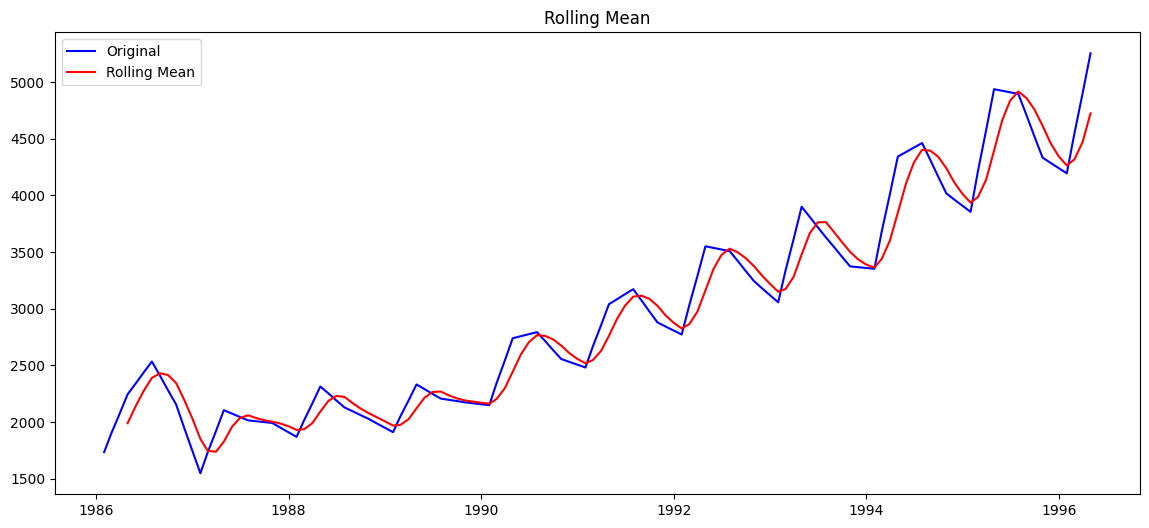

Results of Dickey Fuller Test:
Test Statistic                   0.572599
p-value                          0.986920
#Lags Used                      10.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


In [177]:
plt.figure(figsize=(14,6))
sales=pd.DataFrame()
sales['Sales']=interpolated_month[['Sales']]
test_stationarity(sales)

In [178]:
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
adf_test(sales.Sales)

Fail to reject the null hypothesis
Data is non-stationary


Feature Scaling (Transformations)

1. Square Root Transform

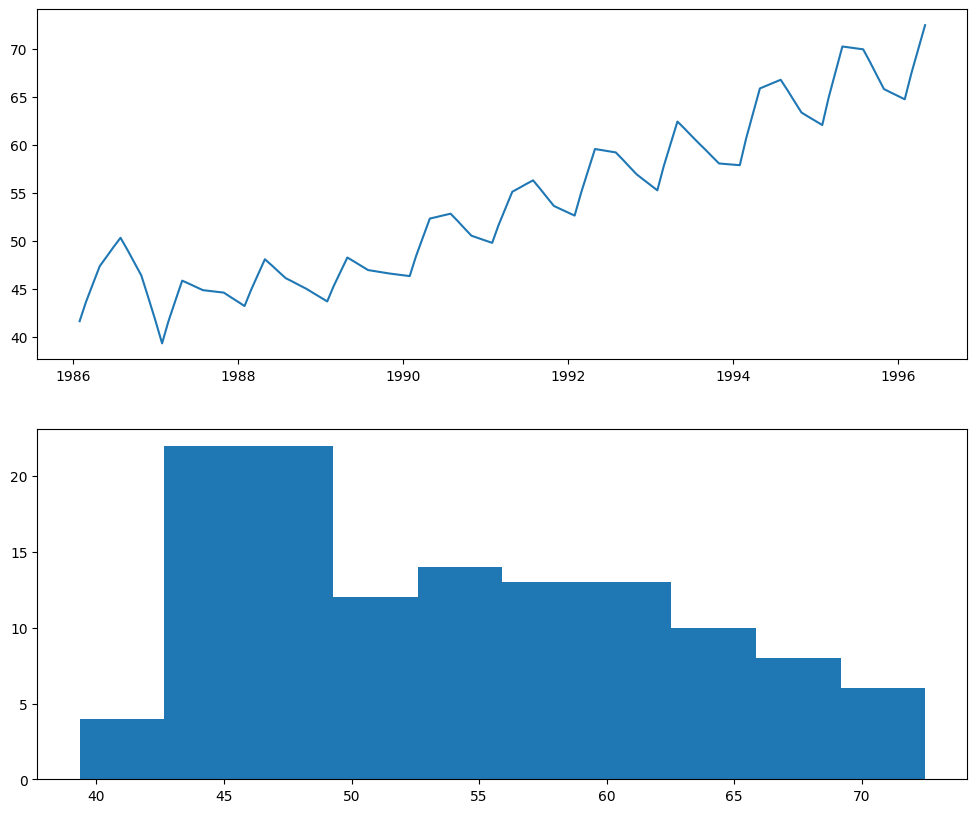

In [179]:
square_root = pd.DataFrame()
square_root = interpolated_month[['Sales']]
square_root['Sales'] = np.sqrt(square_root.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Sales'])

# Histogram
plt.subplot(212)
plt.hist(square_root['Sales'])
plt.show()

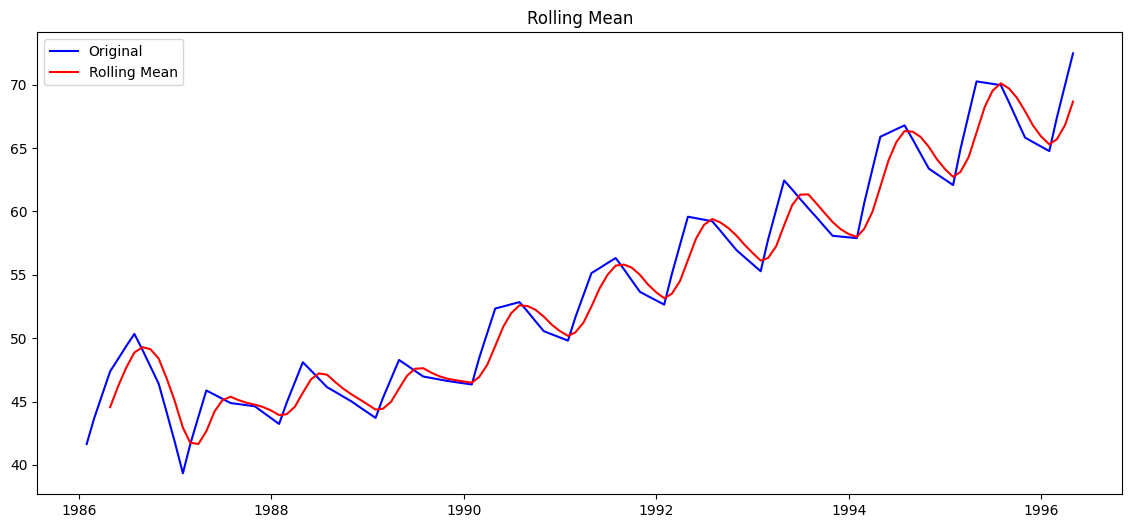

Results of Dickey Fuller Test:
Test Statistic                   0.728012
p-value                          0.990381
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [180]:
plt.figure(figsize=(14,6))
test_stationarity(square_root)

In [181]:
adf_test(square_root.Sales)

Fail to reject the null hypothesis
Data is non-stationary


2. Log Transform

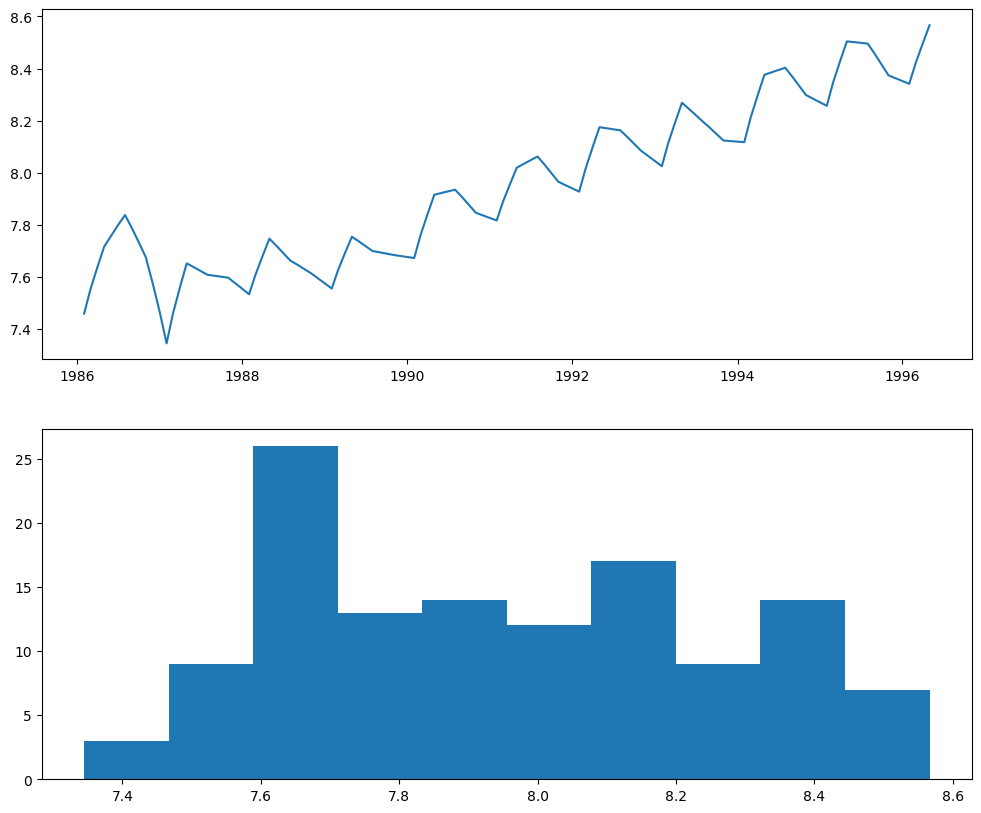

In [182]:
log = pd.DataFrame()
log = interpolated_month[['Sales']]
log['Sales'] = np.log(log.Sales)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Sales'])

# Histogram
plt.subplot(212)
plt.hist(log['Sales'])
plt.show()

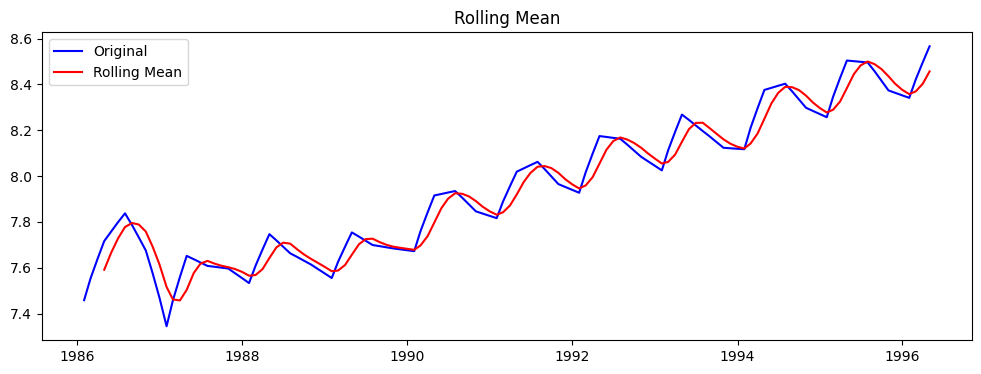

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [183]:
plt.figure(figsize=(12,4))
test_stationarity(log)

In [184]:

adf_test(log.Sales)

Fail to reject the null hypothesis
Data is non-stationary


3. Converting Non-Stationary Time Series into Stationary

Sales
Date                
1986-01-31  7.458663
1986-02-28  7.552170
1986-03-31  7.637676
1986-04-30  7.716443
1986-05-31  7.758437

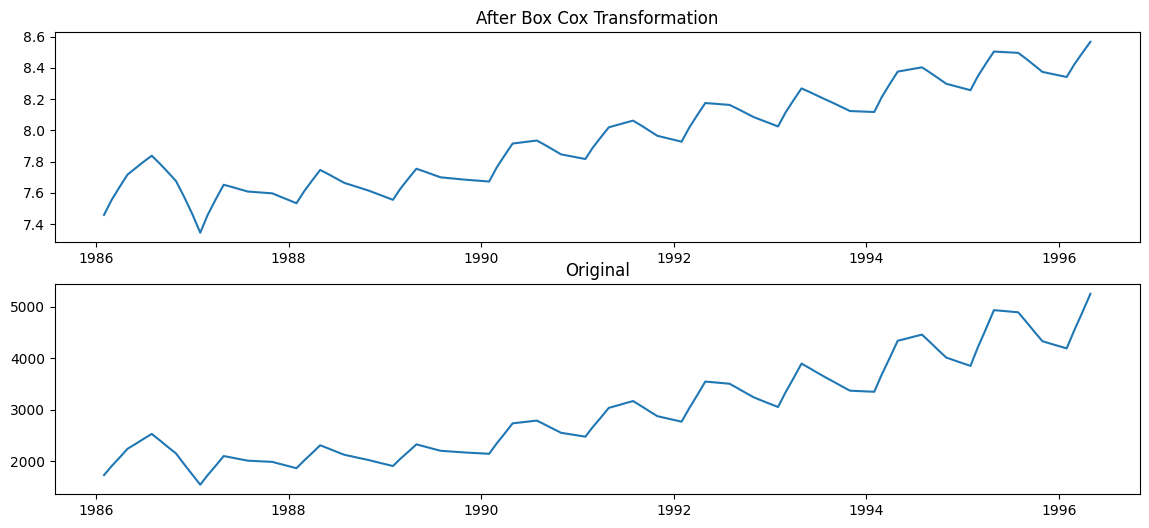

In [185]:
data_boxcox = pd.DataFrame()
data_boxcox['Sales'] = pd.Series(boxcox(interpolated_month['Sales'], lmbda=0), interpolated_month.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(interpolated_month, label='original')
axis[1].set_title('Original')
plt.show()

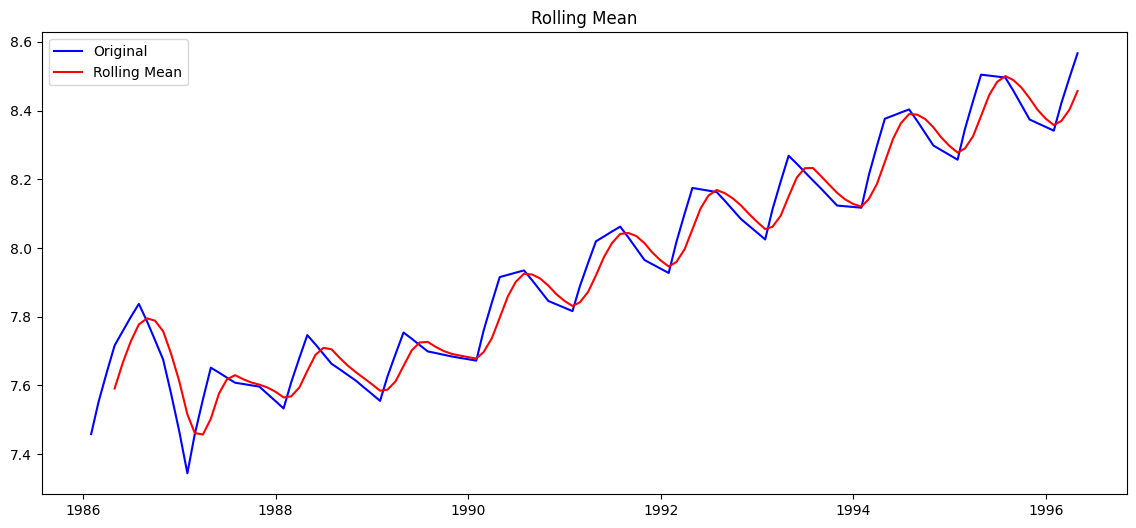

Results of Dickey Fuller Test:
Test Statistic                   0.451508
p-value                          0.983322
#Lags Used                      13.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [186]:
plt.figure(figsize=(14,6))
test_stationarity(data_boxcox)

Differencing of the Box-Cox Transformation

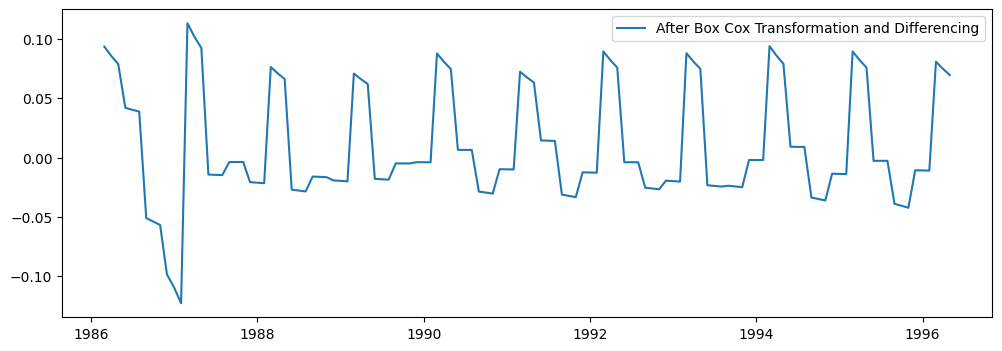

In [198]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

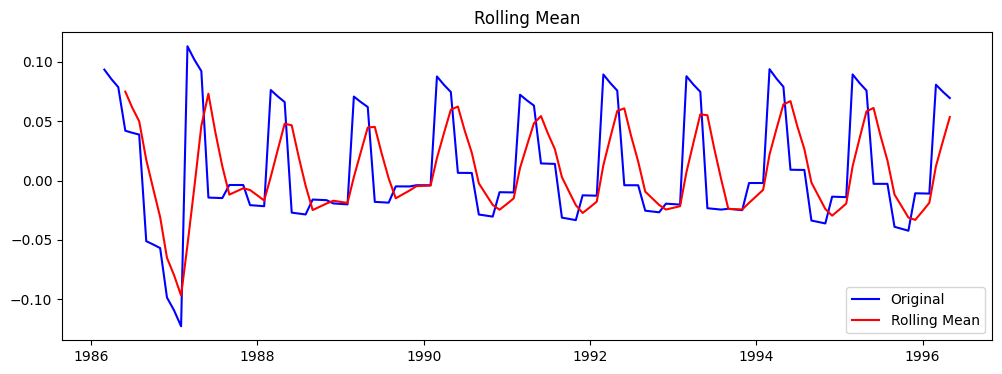

Results of Dickey Fuller Test:
Test Statistic                  -3.030060
p-value                          0.032181
#Lags Used                      12.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64


In [199]:
plt.figure(figsize=(12,4))
test_stationarity(data_boxcox_diff)

In [200]:
adf_test(data_boxcox_diff.Sales)

Reject the null hypothesis
Data is stationary


Building The Time Series Forecasting with Optimal Value using ARIMA

In [201]:
train_data_boxcox = data_boxcox[:100]
test_data_boxcox = data_boxcox[100:]
train_data_boxcox_diff = data_boxcox_diff[:99]
test_data_boxcox_diff = data_boxcox_diff[99:]

In [202]:
#Finally, Our Series is now stationary for AR Forecasting
#Building The Time Series Forecasting with Optimal Value using ARIMA
def evaluate_arima_model(X, arima_order):

# Prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

# Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
# Calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [203]:
# Evaluate parameters
p_values = range(0,5)
d_values = range(0,5)
q_values = range(0,5)
evaluate_models(train_data_boxcox_diff.Sales, p_values, d_values, q_values)

Best ARIMA(3, 0, 2) RMSE=0.028


Inverse transformation of the Box-Cox Differencing

In [204]:
model = ARIMA(train_data_boxcox_diff, order=(3, 0, 2))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()

# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.Sales[0])

# Now doing the reverse transformation 
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

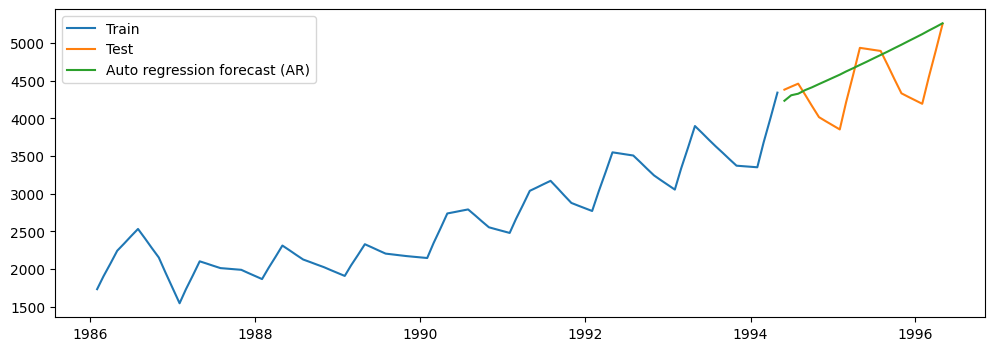

In [205]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')
plt.show()

Model Evaluation

Root Mean Squared Error(RMSE)

In [206]:
rmse_arima = np.sqrt(mean_squared_error(test_data.Sales, y_hat_ar['arima_forecast'][test_data.index.min():])).round(2)
rmse_arima

455.39

MAPE (Mean Absolute Percent Error)

In [207]:
mape_arima = round(np.mean(np.abs((test_data.Sales - y_hat_ar['arima_forecast'][test_data.index.min():])/test_data.Sales)*100),2)
mape_arima

8.57

Observation 
the Ar Model is best but compared to Holtes model,Holtes model is very good

**Analysing the Residuals**


In [208]:
model_residual = model_fit.resid
model_residual.mean()

0.00022566856589238094

In [209]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


No autocorrelation between residuals

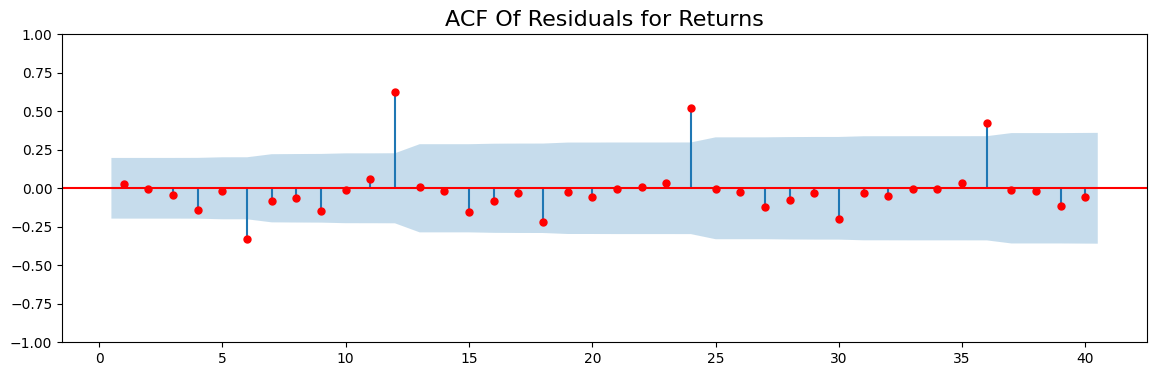

In [210]:
plt.rcParams["figure.figsize"] = (14,4)
plot_acf(model_residual, zero = False, lags = 40,color='red')
plt.title("ACF Of Residuals for Returns",size=16)
plt.show()

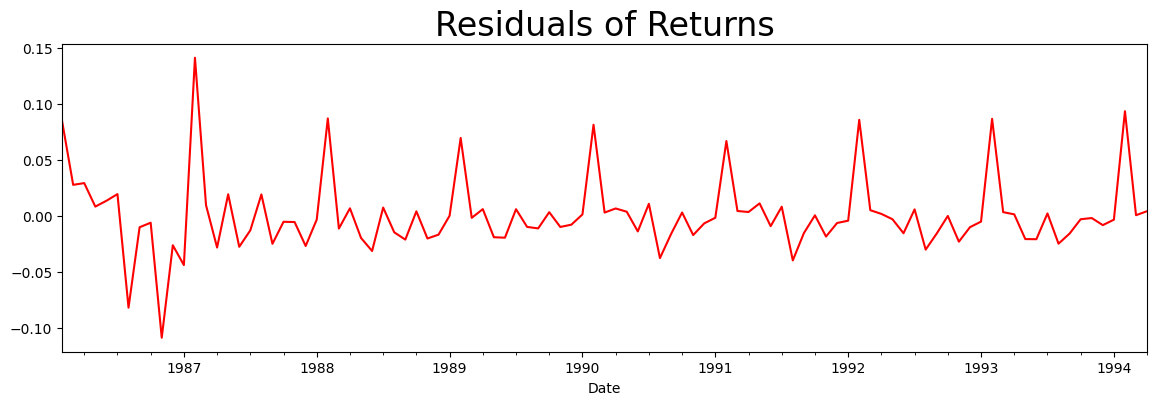

In [211]:
#Residuals must be random
model_residual.plot(figsize=(14,4),color='red')
plt.title("Residuals of Returns", size=24)
plt.show()

Seasonal Auto Regressive Integrated Moving Average (SARIMA)

We are only passing the Box Cox because the ARIMAX will perform the differencing internally

In [212]:
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
y_hat_sarima = data_boxcox_diff.copy()

Inverse Transformation of the Differencing Box-Cox Transformation

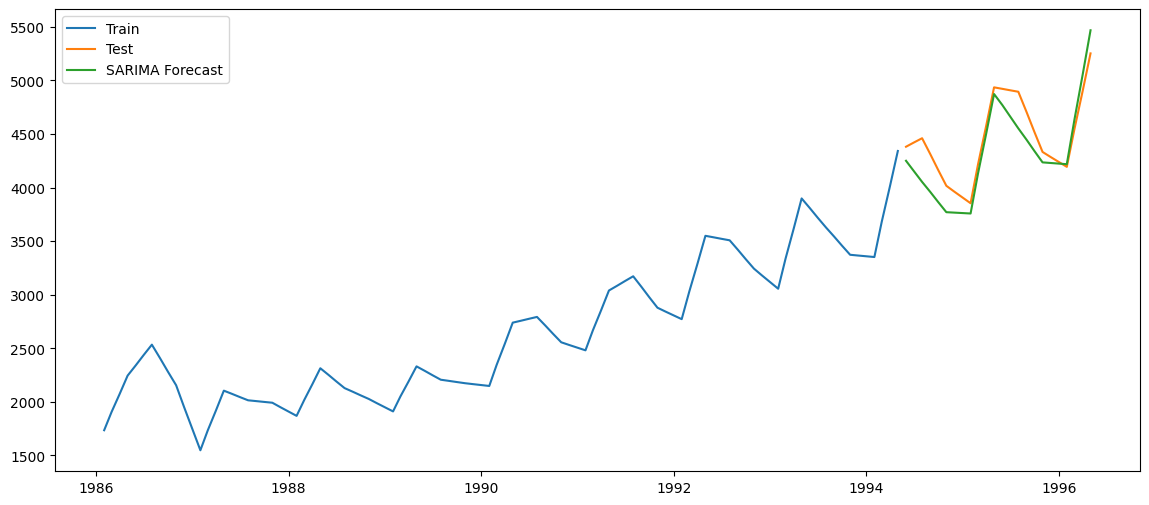

In [213]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
plt.figure(figsize=(14,6))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data, label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()


**Model Evaluation**

RMSE (Root Mean Squared Error)

In [214]:
rmse_sarima = np.sqrt(mean_squared_error(test_data, y_hat_sarima['sarima_forecast'][test_data.index.min():])).round(2)
rmse_sarima

204.64

MAPE (Mean Absolute Percent Error)

In [215]:
mape_sarima = round(np.mean(np.abs((test_data.Sales - y_hat_sarima['sarima_forecast'][test_data.index.min():])/test_data.Sales)*100),2)
mape_sarima

3.91

Analysing the Residuals

In [216]:
model_residual = model_fit.resid
model_residual.mean()

0.03703274203999538

In [217]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


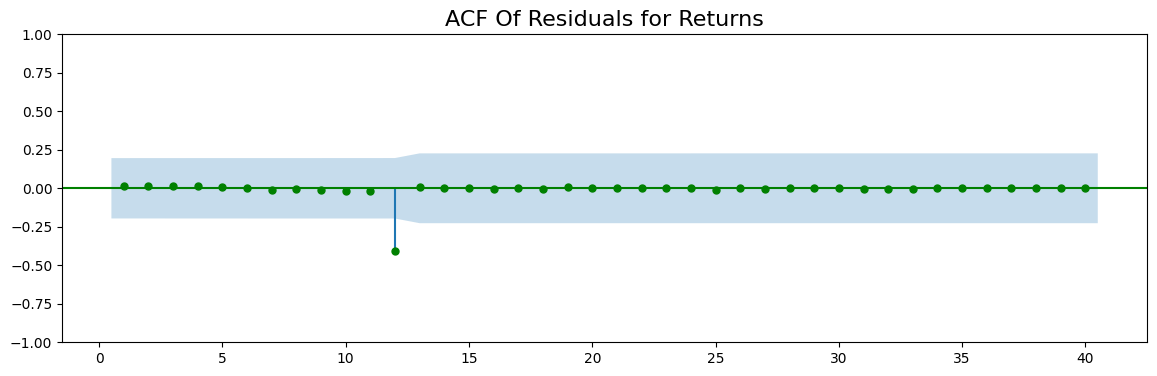

In [219]:
#No autocorrelation between residuals
plot_acf(model_residual, zero = False, lags = 40,color='green')
plt.title("ACF Of Residuals for Returns",size=16)
plt.show()

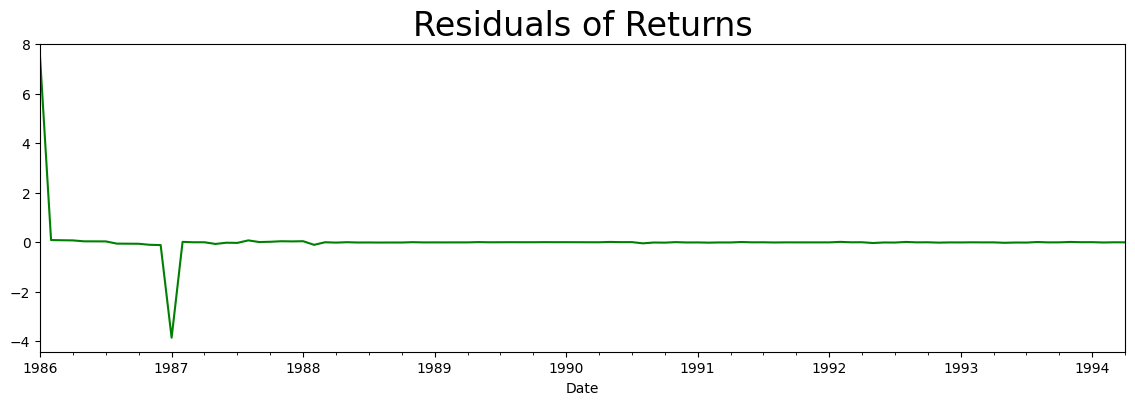

In [221]:
#Residuals must be random
model_residual.plot(figsize=(14,4),color='green')
plt.title("Residuals of Returns", size=24)
plt.show()

Compareing the results

In [222]:
Evaluation = {"Models":pd.Series(["Simple_Exponential","Double_Exponential","Triple_Exp_Additive","Triple_Exp_Mul_Add","Triple_Exp_Add_Mul","Triple_Exp_Multiplicative","ARIMA","SARIMA"]),
        "MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp,mape_arima,mape_sarima]),\
        "RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp,rmse_arima,rmse_sarima])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
table_evaluation

Models    MAPE(%)  RMSE_Values
0         Triple_Exp_Mul_Add   1.487269    78.733258
1  Triple_Exp_Multiplicative   1.807823   101.651349
2                     SARIMA   3.910000   204.640000
3         Triple_Exp_Add_Mul   5.168784   270.084791
4         Simple_Exponential   6.619719   381.954224
5                      ARIMA   8.570000   455.390000
6        Triple_Exp_Additive  35.695713  1828.476772
7         Double_Exponential  89.494625  4549.907951

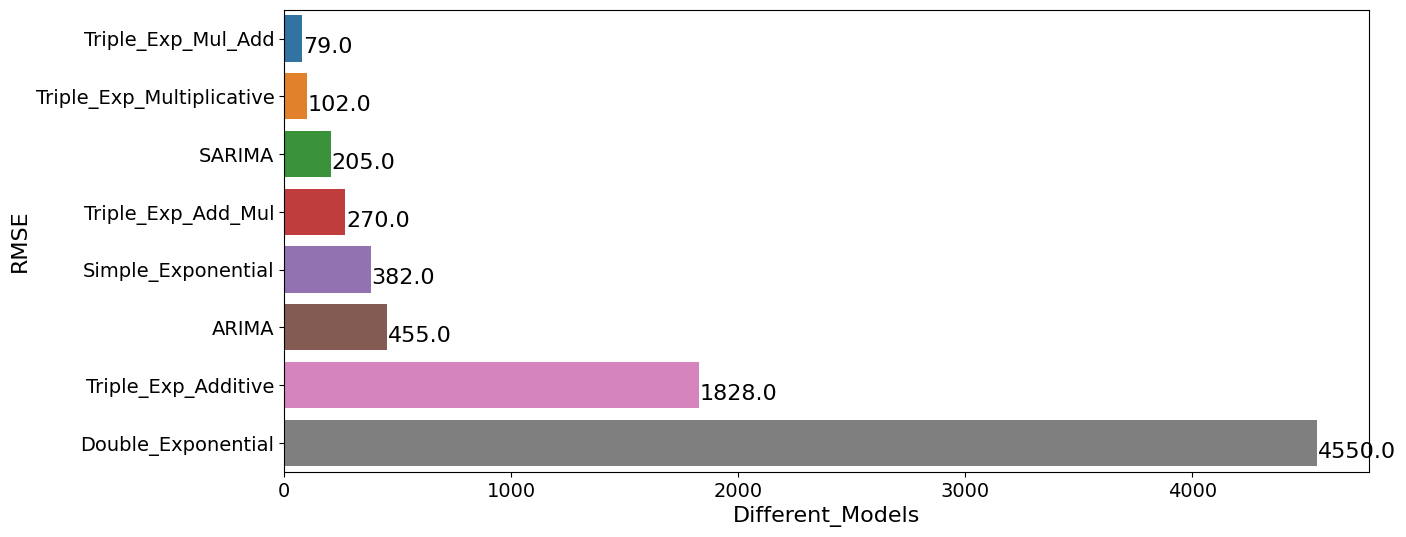

In [223]:
f, axe = plt.subplots(1,1, figsize=(14,6))
sns.barplot(x='RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(table_evaluation.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 16)

plt.show()

In [224]:
#Creating Dummy Variables of the Categorical Feature Month of Date Time feature
interpolated_month.reset_index(inplace=True)
interpolated_month['t'] = np.arange(1,len(interpolated_month)+1)
interpolated_month['t_squared'] = np.square(interpolated_month.t)
interpolated_month["month"] = interpolated_month.Date.dt.strftime("%b") # month extraction
interpolated_month["year"] = interpolated_month.Date.dt.strftime("%Y") # year extraction
months = pd.get_dummies(interpolated_month['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
cocacola = pd.concat([interpolated_month,months],axis=1)
cocacola['log_sales'] = np.log(cocacola['Sales'])
cocacola

Date        Sales    t  t_squared month  year  Jan  Feb  Mar  Apr  \
0   1986-01-31  1734.827000    1          1   Jan  1986    1    0    0    0   
1   1986-02-28  1904.871666    2          4   Feb  1986    0    1    0    0   
2   1986-03-31  2074.916332    3          9   Mar  1986    0    0    1    0   
3   1986-04-30  2244.960999    4         16   Apr  1986    0    0    0    1   
4   1986-05-31  2341.242330    5         25   May  1986    0    0    0    0   
..         ...          ...  ...        ...   ...   ...  ...  ...  ...  ...   
119 1995-12-31  4240.333333  120      14400   Dec  1995    0    0    0    0   
120 1996-01-31  4194.000000  121      14641   Jan  1996    1    0    0    0   
121 1996-02-29  4547.000000  122      14884   Feb  1996    0    1    0    0   
122 1996-03-31  4900.000000  123      15129   Mar  1996    0    0    1    0   
123 1996-04-30  5253.000000  124      15376   Apr  1996    0    0    0    1   

     May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  log_sales  
0      0    0    0    0    0    0    0    0   7.458663  
1      0    0    0    0    0    0    0    0   7.552170  
2      0    0    0    0    0    0    0    0   7.637676  
3      0    0    0    0    0    0    0    0   7.716443  
4      1    0    0    0    0    0    0    0   7.758437  
..   ...  ...  ...  ...  ...  ...  ...  ...        ...  
119    0    0    0    0    0    0    0    1   8.352397  
120    0    0    0    0    0    0    0    0   8.341410  
121    0    0    0    0    0    0    0    0   8.422223  
122    0    0    0    0    0    0    0    0   8.496990  
123    0    0    0    0    0    0    0    0   8.566555  

[124 rows x 19 columns]

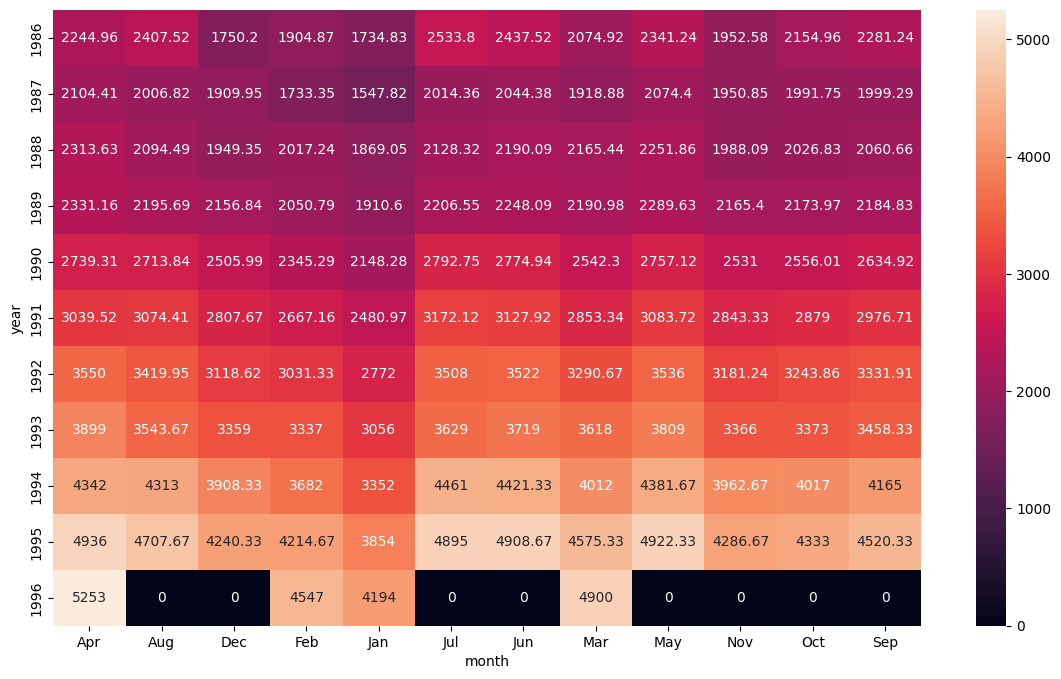

In [225]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=cocacola,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.show()

Splitting data into Train and Test

In [226]:
size = 100

train_data = cocacola.iloc[:size]
test_data = cocacola.iloc[size:]

In [228]:
train_data

Date        Sales    t  t_squared month  year  Jan  Feb  Mar  Apr  \
0  1986-01-31  1734.827000    1          1   Jan  1986    1    0    0    0   
1  1986-02-28  1904.871666    2          4   Feb  1986    0    1    0    0   
2  1986-03-31  2074.916332    3          9   Mar  1986    0    0    1    0   
3  1986-04-30  2244.960999    4         16   Apr  1986    0    0    0    1   
4  1986-05-31  2341.242330    5         25   May  1986    0    0    0    0   
..        ...          ...  ...        ...   ...   ...  ...  ...  ...  ...   
95 1993-12-31  3359.000000   96       9216   Dec  1993    0    0    0    0   
96 1994-01-31  3352.000000   97       9409   Jan  1994    1    0    0    0   
97 1994-02-28  3682.000000   98       9604   Feb  1994    0    1    0    0   
98 1994-03-31  4012.000000   99       9801   Mar  1994    0    0    1    0   
99 1994-04-30  4342.000000  100      10000   Apr  1994    0    0    0    1   

    May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  log_sales  
0     0    0    0    0    0    0    0    0   7.458663  
1     0    0    0    0    0    0    0    0   7.552170  
2     0    0    0    0    0    0    0    0   7.637676  
3     0    0    0    0    0    0    0    0   7.716443  
4     1    0    0    0    0    0    0    0   7.758437  
..  ...  ...  ...  ...  ...  ...  ...  ...        ...  
95    0    0    0    0    0    0    0    1   8.119399  
96    0    0    0    0    0    0    0    0   8.117312  
97    0    0    0    0    0    0    0    0   8.211211  
98    0    0    0    0    0    0    0    0   8.297045  
99    0    0    0    0    0    0    0    0   8.376090  

[100 rows x 19 columns]

In [229]:
test_data

Date        Sales    t  t_squared month  year  Jan  Feb  Mar  Apr  \
100 1994-05-31  4381.666667  101      10201   May  1994    0    0    0    0   
101 1994-06-30  4421.333333  102      10404   Jun  1994    0    0    0    0   
102 1994-07-31  4461.000000  103      10609   Jul  1994    0    0    0    0   
103 1994-08-31  4313.000000  104      10816   Aug  1994    0    0    0    0   
104 1994-09-30  4165.000000  105      11025   Sep  1994    0    0    0    0   
105 1994-10-31  4017.000000  106      11236   Oct  1994    0    0    0    0   
106 1994-11-30  3962.666667  107      11449   Nov  1994    0    0    0    0   
107 1994-12-31  3908.333333  108      11664   Dec  1994    0    0    0    0   
108 1995-01-31  3854.000000  109      11881   Jan  1995    1    0    0    0   
109 1995-02-28  4214.666667  110      12100   Feb  1995    0    1    0    0   
110 1995-03-31  4575.333333  111      12321   Mar  1995    0    0    1    0   
111 1995-04-30  4936.000000  112      12544   Apr  1995    0    0    0    1   
112 1995-05-31  4922.333333  113      12769   May  1995    0    0    0    0   
113 1995-06-30  4908.666667  114      12996   Jun  1995    0    0    0    0   
114 1995-07-31  4895.000000  115      13225   Jul  1995    0    0    0    0   
115 1995-08-31  4707.666667  116      13456   Aug  1995    0    0    0    0   
116 1995-09-30  4520.333333  117      13689   Sep  1995    0    0    0    0   
117 1995-10-31  4333.000000  118      13924   Oct  1995    0    0    0    0   
118 1995-11-30  4286.666667  119      14161   Nov  1995    0    0    0    0   
119 1995-12-31  4240.333333  120      14400   Dec  1995    0    0    0    0   
120 1996-01-31  4194.000000  121      14641   Jan  1996    1    0    0    0   
121 1996-02-29  4547.000000  122      14884   Feb  1996    0    1    0    0   
122 1996-03-31  4900.000000  123      15129   Mar  1996    0    0    1    0   
123 1996-04-30  5253.000000  124      15376   Apr  1996    0    0    0    1   

     May  Jun  Jul  Aug  Sep  Oct  Nov  Dec  log_sales  
100    1    0    0    0    0    0    0    0   8.385184  
101    0    1    0    0    0    0    0    0   8.394197  
102    0    0    1    0    0    0    0    0   8.403128  
103    0    0    0    1    0    0    0    0   8.369389  
104    0    0    0    0    1    0    0    0   8.334472  
105    0    0    0    0    0    1    0    0   8.298291  
106    0    0    0    0    0    0    1    0   8.284672  
107    0    0    0    0    0    0    0    1   8.270866  
108    0    0    0    0    0    0    0    0   8.256867  
109    0    0    0    0    0    0    0    0   8.346326  
110    0    0    0    0    0    0    0    0   8.428435  
111    0    0    0    0    0    0    0    0   8.504311  
112    1    0    0    0    0    0    0    0   8.501538  
113    0    1    0    0    0    0    0    0   8.498758  
114    0    0    1    0    0    0    0    0   8.495970  
115    0    0    0    1    0    0    0    0   8.456948  
116    0    0    0    0    1    0    0    0   8.416341  
117    0    0    0    0    0    1    0    0   8.374015  
118    0    0    0    0    0    0    1    0   8.363265  
119    0    0    0    0    0    0    0    1   8.352397  
120    0    0    0    0    0    0    0    0   8.341410  
121    0    0    0    0    0    0    0    0   8.422223  
122    0    0    0    0    0    0    0    0   8.496990  
123    0    0    0    0    0    0    0    0   8.566555

Building Ordinary Square Model

In [230]:
#Linear Model
linear_model = smf.ols('Sales~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_linear))**2))
rmse_linear

686.8740863668942

In [231]:
#2. Exponential Model
exp = smf.ols('log_sales~t',data=train_data).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test_data['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

530.326802509923

In [232]:
#3. Quadratic Mode
quad = smf.ols('Sales~t+t_squared',data=train_data).fit()
pred_quad = pd.Series(quad.predict(test_data[["t","t_squared"]]))
rmse_quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_quad))**2))
rmse_quad

371.29418344986675

In [233]:
#4. Additive seasonality
add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1837.7879723483793

In [234]:
#5. Additive Seasonality Quadratic
add_sea_quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

225.8049881036695

In [235]:
#6. Multiplicative Seasonality
mul_sea = smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_mult_sea = pd.Series(mul_sea.predict(test_data))
rmse_mult_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

1904.7944171920315

In [236]:
#7. Multiplicative Additive Seasonality
mul_add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train_data).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test_data))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

396.41978173823406

In [238]:
data2 = {"Models":pd.Series(["RMSE_Linear","RMSE_Exp","RMSE_Quad","RMSE_Add_Sea","RMSE_Add_Sea_Quad","RMSE_Mult_Sea","RMSE_Mult_Add_Sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse=pd.DataFrame(data2)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

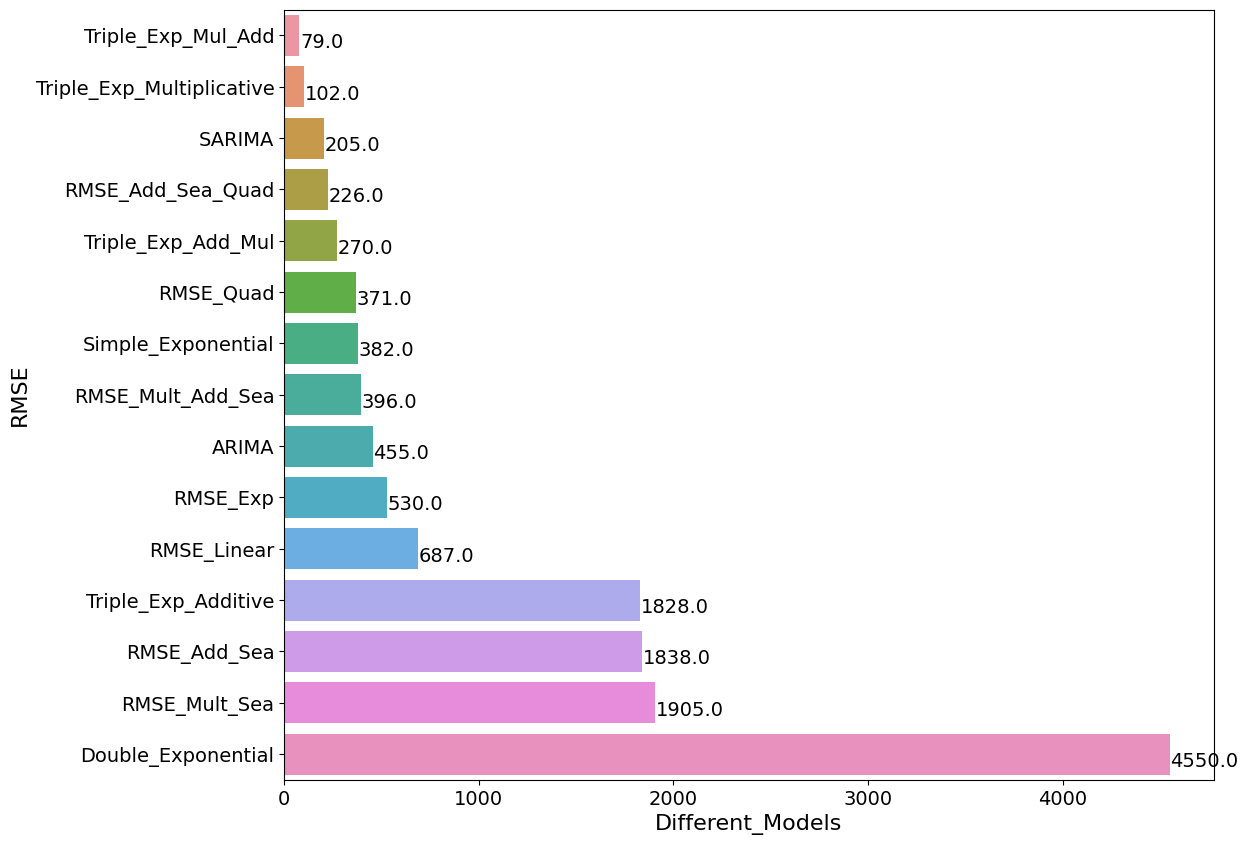

In [239]:
e = table_rmse.append(table_evaluation)
e.drop('MAPE(%)', axis=1, inplace=True)
e.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
f, axe = plt.subplots(1,1, figsize=(12,10))
sns.barplot(x='RMSE_Values', y='Models', data=e, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

for i, v in enumerate(np.round(e.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v), fontsize= 14)

plt.show()

**Conclusion :**

Triple Exponential Method with Multiplicative Seasonality and Additive Trend

The best model we have got so far with the lowest RMSE and lowest MAPE.